**Aude GUERAND & Juan José MAYORGA**


For this project, we are using "project_0"\
Please find the ckeck-list [here](https://docs.google.com/spreadsheets/d/14lgtUQMrSnYBQGThBh5C1Pp9uH3IAY4YaNqNMktZu3U/edit?usp=sharing), it contains the error found and a possible explanation to them.

\
For an easy naviguation, we recommand use to use **the summary** of this notebook. We created groups of columns for us to have a better organisation.
\
\
**Remarks:**
- The 4 hardest are 'xml_auth_token', 'profile_json', 'x35_bank_branch' and 'credit_card_score'
- 'platform_android' and 'country' don't contain any error
- we haven't found any error for 'bank_balance' as well




> Finally, regarding metrics, you are expected to produce a numerical value quantifying the problem. This could be, for example, a function that counts missing values or a filter that counts the number of incorrect records.



If you need to install some librairies:

In [ ]:
#pip install python-Levenshtein

In [ ]:
#pip install fuzzywuzzy

In [ ]:
#pip install wordcloud

In [ ]:
#pip install nltk

In [ ]:
#pip install gender-guesser

All required libraries to execute this notebook smoothly:

In [ ]:
import pandas as pd
import numpy as np

import random
import string
import re
from datetime import datetime
import json

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from wordcloud import WordCloud

from collections import Counter
from nltk.corpus import stopwords
import gender_guesser.detector as gender

from fuzzywuzzy import process, fuzz
import Levenshtein

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load the dataset as df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Data_cleaning/project_0.csv")
df.head(3)

prefix lastname firstname firstname_mother firstname_father  \
0    Mx.       Li     Kevin            Cathy           Thomas   
1    Mx.    Mccoy     Peter           Sherry           Arthur   
2   Mrs.    /anks   Jasmine            Diana            Bryan   

                                         description  \
0  Not mean home prove behavior. Have ago learn t...   
1  Air baby concern trade five together. Activity...   
2  Energy decide first civil time subject. Positi...   

                                             inquiry         dob  \
0  Us stay street ball later again writer step. E...  1924-09-28   
1  Follow argue hand maybe. Feel box real present...  2010-01-24   
2  Heavy go break. Eight treatment speech story e...  1990-01-25   

  account_creation_date last_transaction_date  ...         city    zip  \
0            1977-02-29            2019-09-08  ...  Lake Angela  47771   
1            2000-07-28            2020-01-31  ...  Sabrinastad   9054   
2            1970-02-29            2004-06-25  ...  Caseborough  13489   

            country customer_code  \
0          Mongolia          27.0   
1  Marshall Islands          27.0   
2        Mauritania          27.0   

                                        customer_uid android_platform  \
0  613651c1554848e2782874f6c5c3cb52a61b6039985e2d...    Android 2.3.1   
1  f94516aaa42d888501789bc6c84b172c40ce35eb66aaed...      Android 1.6   
2  84d840c65f750c8a13007d8e3b635a54c7d3988eacb628...    Android 4.1.2   

                                          user_agent customer_segment_code  \
0  Opera/9.82.(Windows NT 10.0; aa-DJ) Presto/2.9...                  11.0   
1  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_8 ...                  13.0   
2  Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_6 like ...                   8.0   

  customer_market_code customer_fico_score  
0               6625.0                 NaN  
1             371554.0                18.0  
2             188374.0                18.0  

[3 rows x 44 columns]

### Global vizualisation on the Dataset

In [ ]:
df.describe()

salary  first_salary  taxable_income  transaction_amount  \
count  1.000000e+04  1.000000e+04    10000.000000        10000.000000   
mean   5.938129e+05 -7.024942e+05    11802.781900          901.462971   
std    3.150363e+06  3.841482e+06     7987.598194          521.309633   
min    5.000000e+03 -5.841357e+07   -22967.000000            1.000000   
25%    1.013475e+04  4.060250e+03     7313.000000          446.000000   
50%    1.525000e+04  9.280500e+03    12602.500000          904.000000   
75%    2.057850e+04  1.474250e+04    17775.500000         1354.000000   
max    4.082127e+07  2.000000e+04    22996.000000         1800.000000   

       credit_card_score  credit_card_number        weight        height  \
count       10000.000000        1.000000e+04  10000.000000  10000.000000   
mean           47.638042        5.014866e+15     66.497706    178.488517   
std            18.611491        2.897062e+15     15.928098     38.569704   
min             0.000000        3.290921e+11      0.011886    132.694728   
25%            36.955105        2.496133e+15     65.907179    163.796345   
50%            48.914849        5.062516e+15     69.665681    170.719064   
75%            60.206651        7.511558e+15     73.176805    178.084633   
max           100.000000        1.000000e+16     88.274626    412.660209   

          shoe_size  bank_balance           zip  customer_code  \
count  10000.000000  10000.000000  10000.000000         9490.0   
mean      41.988899   1502.881700  50542.605300           27.0   
std        1.923071    579.866671  28783.622391            0.0   
min       33.373966    500.000000    538.000000           27.0   
25%       40.732380   1006.750000  25320.750000           27.0   
50%       42.000000   1501.500000  50926.500000           27.0   
75%       43.239445   2004.000000  75846.250000           27.0   
max       50.502759   2500.000000  99938.000000           27.0   

       customer_segment_code  customer_market_code  customer_fico_score  
count            8985.000000           8794.000000          8598.000000  
mean               14.855648         267008.048783            18.714352  
std                 5.769463         242154.556557             1.140397  
min                 5.000000              0.000000            16.000000  
25%                10.000000          46176.000000            18.000000  
50%                15.000000         196178.500000            19.000000  
75%                20.000000         456851.000000            20.000000  
max                25.000000         800000.000000            20.000000

In [ ]:
df.columns

Index(['prefix', 'lastname', 'firstname', 'firstname_mother',
       'firstname_father', 'description', 'inquiry', 'dob',
       'account_creation_date', 'last_transaction_date',
       'account_resiliation_date', 'first_contact_date', 'last_contact_date',
       'latlon_home', 'latlon_work', 'x35_bank_branch', 'email_work',
       'email_personnal', 'email_sso', 'email_vpn', 'xml_authent_token',
       'profile_json', 'cia_info_json', 'salary', 'first_salary',
       'taxable_income', 'transaction_amount', 'credit_card_score',
       'credit_card_number', 'weight', 'height', 'shoe_size', 'bank_balance',
       'address', 'city', 'zip', 'country', 'customer_code', 'customer_uid',
       'android_platform', 'user_agent', 'customer_segment_code',
       'customer_market_code', 'customer_fico_score'],
      dtype='object')

In [ ]:
#look at the type of the columns
df.dtypes

prefix                       object
lastname                     object
firstname                    object
firstname_mother             object
firstname_father             object
description                  object
inquiry                      object
dob                          object
account_creation_date        object
last_transaction_date        object
account_resiliation_date     object
first_contact_date           object
last_contact_date            object
latlon_home                  object
latlon_work                  object
x35_bank_branch              object
email_work                   object
email_personnal              object
email_sso                    object
email_vpn                    object
xml_authent_token            object
profile_json                 object
cia_info_json                object
salary                      float64
first_salary                float64
taxable_income                int64
transaction_amount          float64
credit_card_score           

**Checking the missingness of the values**

In [ ]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values.head(10)

customer_fico_score      1402
customer_market_code     1206
customer_segment_code    1015
customer_code             510
firstname_father           87
bank_balance                0
taxable_income              0
transaction_amount          0
credit_card_score           0
credit_card_number          0
dtype: int64

In [ ]:
#look at unique values for all categorical colunm

In [ ]:
columns = []
most_frequent_values = []
frequencies= []
for column in df.columns:
  counts = df[column].value_counts()
  if not counts.empty:
      most_frequent = counts.index[0]
      frequency = counts.iloc[0]
  else:
       most_frequent = pd.NA
       frequency = 0
  columns.append(column)
  most_frequent_values.append(most_frequent)
  frequencies.append(frequency)

most_frequent_df = pd.DataFrame({'Column': columns, 'Most Frequent Value': most_frequent_values,'Frequency': frequencies})

display(most_frequent_df)

Column  \
0                     prefix   
1                   lastname   
2                  firstname   
3           firstname_mother   
4           firstname_father   
5                description   
6                    inquiry   
7                        dob   
8      account_creation_date   
9      last_transaction_date   
10  account_resiliation_date   
11        first_contact_date   
12         last_contact_date   
13               latlon_home   
14               latlon_work   
15           x35_bank_branch   
16                email_work   
17           email_personnal   
18                 email_sso   
19                 email_vpn   
20         xml_authent_token   
21              profile_json   
22             cia_info_json   
23                    salary   
24              first_salary   
25            taxable_income   
26        transaction_amount   
27         credit_card_score   
28        credit_card_number   
29                    weight   
30                    height   
31                 shoe_size   
32              bank_balance   
33                   address   
34                      city   
35                       zip   
36                   country   
37             customer_code   
38              customer_uid   
39          android_platform   
40                user_agent   
41     customer_segment_code   
42      customer_market_code   
43       customer_fico_score   

                                  Most Frequent Value  Frequency  
0                                                 Mr.       2841  
1                                               Smith        217  
2                                             Michael        251  
3                                            Jennifer        265  
4                                             Michael        419  
5   Not mean home prove behavior. Have ago learn t...          1  
6   Us stay street ball later again writer step. E...          1  
7                                          2017-05-19          4  
8                                          1990-02-29        202  
9                                 1970-01-01 00:00:00        476  
10                                         1975-11-19          6  
11                                         2022-03-20          5  
12                                         2006-05-31          5  
13                                            (90, 0)        503  
14                              (-27.26765, 79.60243)        499  
15     (Decimal('-32.6879485'), Decimal('64.934060'))          1  
16                                   gward@ramsey.com          2  
17                                 ksmith@example.com          5  
18                               croberts@example.net          4  
19                                   nsmith@yahoo.com          5  
20  <?xml version="1.0" encoding="utf-8"?>\n<remem...          1  
21  {'job': 'Intelligence analyst', 'company': 'Pa...          1  
22  [{"name": "Melissa Coleman", "residency": "222...          1  
23                                            16888.0          5  
24                                             5112.0          5  
25                                              17512          5  
26                                             1441.0         14  
27                                                0.0          8  
28                                    354535427535588          1  
29                                          74.944188          1  
30                                         151.700955          1  
31                                               42.0        487  
32                                               1787         15  
33                   PSC 0211, Box 4159\nAPO AP 54411          1  
34                                         Lake James         11  
35                                               8788          3  
36                                              Korea         87  
37                                 

## 'Name' columns

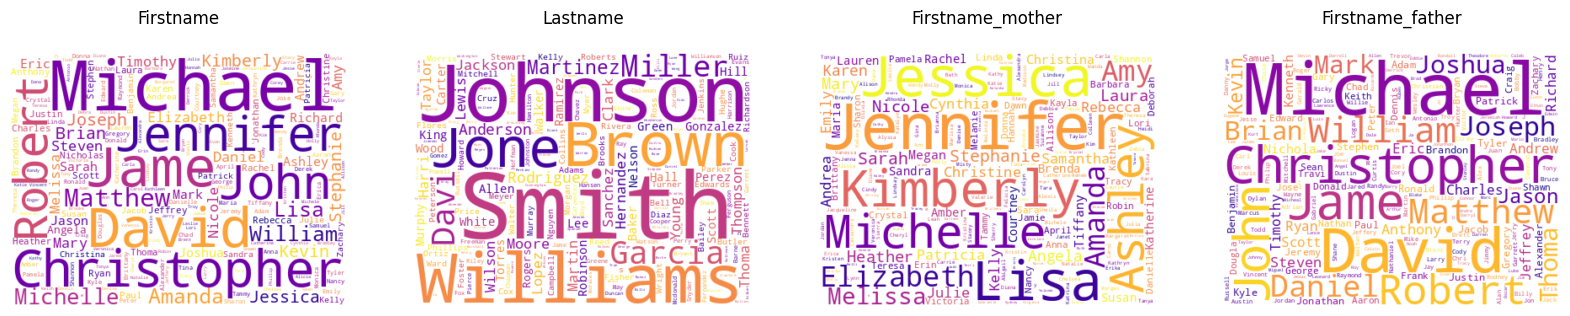

In [ ]:
# Create WordCloud
columns = ['firstname', 'lastname', 'firstname_mother', 'firstname_father']
fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))

for i, col in enumerate(columns):
    # Filter out non-string values
    text = ' '.join(str(name) for name in df[col] if isinstance(name, str))
    wordcloud = WordCloud(width=400, height=300, background_color='white', colormap='plasma').generate(text)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(col.capitalize() + '\n')
    axes[i].axis('off')

plt.show()

### Lastname

In [ ]:
lastname_values = df['lastname'].value_counts()
lastname_values

lastname
Smith        217
Johnson      184
Williams     142
Brown        125
Jones         94
            ... 
Mcg?ire        1
Dougherty      1
Townse;d       1
{ones          1
*ercado        1
Name: count, Length: 1493, dtype: int64

It looks like some letters have been replaced by non alphabetic characters, let's extract them:

In [ ]:
incorrect_lastnames = df[~df['lastname'].str.match(r'^[a-zA-Z]+$', na=False)]['lastname']
print(incorrect_lastnames)

2          /anks
49          Tr/n
75          @ios
79      #arrison
87         Prat?
          ...   
9910     Jackso`
9937      @raham
9953       B`own
9964      C+rtis
9968     *ercado
Name: lastname, Length: 510, dtype: object


To fix the issue, we use a function that will replace the incorrect names by the closest match (using the correct names in our df) using Levenshtein distance.

In [ ]:
def find_correct(incorrect_names, df, column):
    min_distance = float('inf')
    closest_name = None

    for correct_name in df[column]:
        if correct_name not in incorrect_names:
            distance = sum(Levenshtein.distance(incorrect_name, correct_name) for incorrect_name in incorrect_names)
            if distance < min_distance:
                min_distance = distance
                closest_name = correct_name

    if closest_name is not None and min_distance <= 2 * len(incorrect_names):
        return closest_name
    else:
        return incorrect_names[0]

In [ ]:
df.loc[df['lastname'].isin(incorrect_lastnames), 'lastname'] = df.loc[df['lastname'].isin(incorrect_lastnames), 'lastname'].apply(
    lambda x: find_correct([x], df, 'lastname'))

We can now check if there is any remaining incorrect names:

In [ ]:
remaining_incorrect = df[~df['lastname'].str.match(r'^[a-zA-Z]+$', na=False)]['lastname']
remaining_incorrect

2410      Eng>ish
2904         L$ng
4947      Kauf]an
8135    Robe.tson
8139        Case+
8388     Campbe:l
Name: lastname, dtype: object

As we can see, 6 of them didn't get a close match. \
Actually by running the same function on the column it is fixing all the remaning names, exept for one that we decided to replace manually.

In [ ]:
df.loc[df['lastname'].isin(incorrect_lastnames), 'lastname'] = df.loc[df['lastname'].isin(incorrect_lastnames), 'lastname'].apply(
    lambda x: find_correct([x], df, 'lastname'))

In [ ]:
remaining_incorrect = df[~df['lastname'].str.match(r'^[a-zA-Z]+$', na=False)]['lastname']
remaining_incorrect

4947    Kauf]an
Name: lastname, dtype: object

In [ ]:
df['lastname'] = df['lastname'].replace(['Kauf]an'], 'Kauflan')

### Firstname

In [ ]:
firstname_ = df['firstname'].value_counts()

firstname_values = firstname_[firstname_ > 1]
firstname_error = firstname_[firstname_ == 1]

print("\nPotential outliers:")
print(firstname_error)


Potential outliers:
firstname
Michell          1
Patric           1
Kati             1
Cather   ne      1
Ja         ob    1
                ..
Ca         l     1
C       risty    1
Brya             1
Dou     las      1
Al      sha      1
Name: count, Length: 551, dtype: int64


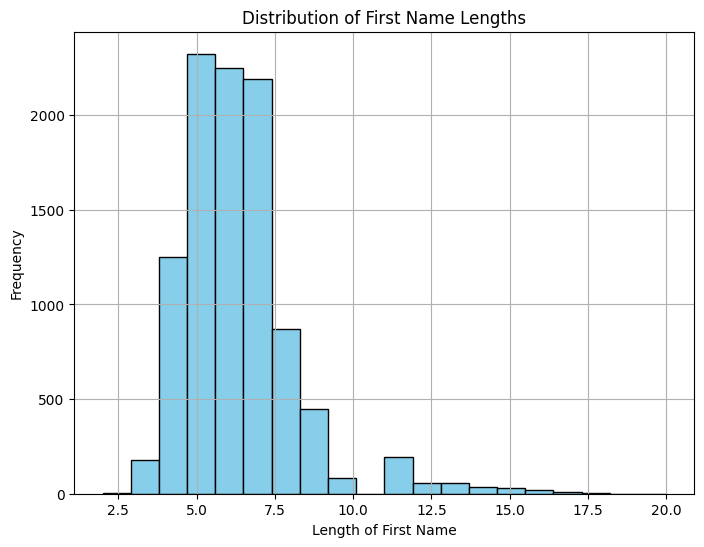

In [ ]:
name_lengths = df['firstname'].str.len()

plt.figure(figsize=(8, 6))
plt.hist(name_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of First Name Lengths')
plt.xlabel('Length of First Name')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# looking for outliers/errors using the length
threshold = name_lengths.mean() + 2 * name_lengths.std() # Adjust the threshold as needed
long_names = df.loc[name_lengths > threshold, 'firstname']

print("Potential 'error' names based on extra lengths:")
print(long_names)

Potential 'error' names based on extra lengths:
6                ennifer
10       Patri         k
20      Ma          issa
64         Jef       rey
98        Jacque     ine
              ...       
9877       Stac        y
9891                alik
9911         Christopher
9952         Al      sha
9976         Nan       y
Name: firstname, Length: 406, dtype: object


From the previous explorations, it's obvious that for some names a letter has been replaced by spaces. Let's extrat theses names:

In [ ]:
names_with_space = df[df['firstname'].str.contains(' ', na=False)]['firstname']

print("Names containing a space:")
print(names_with_space)

Names containing a space:
6                ennifer
10       Patri         k
13              Sh   ron
20      Ma          issa
58            Joh       
              ...       
9891                alik
9907             Re ecca
9930              iffany
9952         Al      sha
9976         Nan       y
Name: firstname, Length: 510, dtype: object


The idea is to reuse the same function as for lastname, so let's replace all the space by a specific character @. \
*We replace to be sure that the lenght previously added by the extra space won't be problem when matching the names*

In [ ]:
def replace_spaces(string):
    result = re.sub(r'\s+', '@', string)
    return result

df.loc[df['firstname'].isin(names_with_space), 'firstname'] = df.loc[df['firstname'].isin(names_with_space), 'firstname'].apply(lambda x: replace_spaces(x))

Now, we can apply the 'find_correct' function to replace by correct names:

In [ ]:
incorrect_firstnames = df[~df['firstname'].str.match(r'^[a-zA-Z]+$', na=False)]['firstname']
incorrect_firstnames.head(3)

6     @ennifer
10     Patri@k
13      Sh@ron
Name: firstname, dtype: object

In [ ]:
df.loc[df['firstname'].isin(incorrect_firstnames), 'firstname'] = df.loc[df['firstname'].isin(incorrect_firstnames), 'firstname'].apply(
    lambda x: find_correct([x], df, 'firstname'))

Let see the result:

In [ ]:
remaining_incorrect_firstname = df[~df['firstname'].str.match(r'^[a-zA-Z]+$', na=False)]['firstname']
remaining_incorrect_firstname

3541      @isty
3602      Je@na
4117       @awn
5316    Jo@elyn
5868      @ason
6429      Kell@
8587       @udy
Name: firstname, dtype: object

Same as for lastname. Let's re-apply the function and correct manually any remaining names after it.

In [ ]:
df.loc[df['firstname'].isin(remaining_incorrect_firstname), 'firstname'] = df.loc[df['firstname'].isin(
    remaining_incorrect_firstname), 'firstname'].apply(lambda x: find_correct([x], df, 'firstname'))

In [ ]:
remaining_incorrect_firstname = df[~df['firstname'].str.match(r'^[a-zA-Z]+$', na=False)]['firstname']
remaining_incorrect_firstname

5316    Jo@elyn
Name: firstname, dtype: object

In [ ]:
df['firstname'] = df['firstname'].replace(['Jo@elyn'], 'Jocelyn')

### Prefix

In [ ]:
prefix_values = df['prefix'].value_counts()
prefix_values

prefix
Mr.      2841
Mx.      2108
Mrs.     1987
Dr.      1286
Miss      528
Ms.       439
Ind.      426
Misc.     385
Name: count, dtype: int64

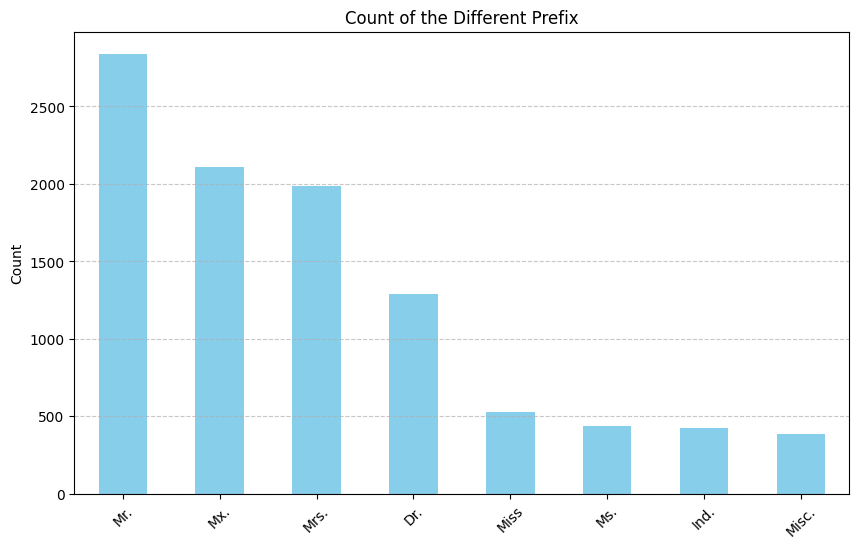

In [ ]:
prefix_values.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Count of the Different Prefix')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#We consider that Miss - Misc and Ms all stand for the same
df['prefix'] = df['prefix'].replace(['Misc.', 'Ms.'], 'Miss')

In [ ]:
updated_prefix = df['prefix'].value_counts()
updated_prefix

prefix
Mr.     2841
Mx.     2108
Mrs.    1987
Miss    1352
Dr.     1286
Ind.     426
Name: count, dtype: int64

Is the problem being name not matching the gender ? \
Let's see

In [ ]:
# Initialize the gender detector
d = gender.Detector()

# Function to detect gender
def detect_gender(firstname):
    return d.get_gender(firstname)

# Function to check for mismatches using predicted gender
def gender_mismatch(prefix, firstname):
    predicted_gender = detect_gender(firstname)
    if prefix == 'Mr.' and predicted_gender in ['female', 'mostly_female']:
        return True
    elif prefix in ['Miss', 'Mrs.'] and predicted_gender in ['male', 'mostly_male']:
        return True
    return False

# Create lists to store mismatch information
mismatch_prefixes = []

# Iterate through the dataframe to find mismatches
for index, row in df.iterrows():
    if gender_mismatch(row['prefix'], row['firstname']):
        mismatch_prefixes.append(row['prefix'])

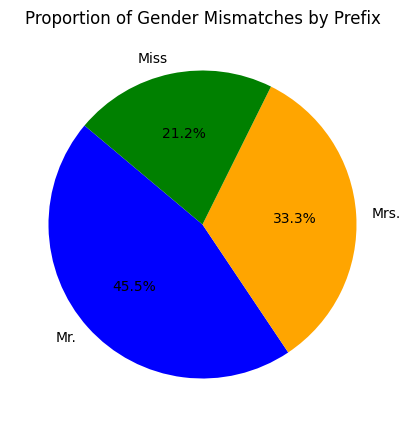

In [ ]:
# Count the mismatches by prefix
mismatch_counts = pd.Series(mismatch_prefixes).value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
mismatch_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red'])
plt.title('Proportion of Gender Mismatches by Prefix')
plt.ylabel('')  # Hide the y-label
plt.show()

As we can see, we have some surprising gender according to the name ('Rebecca' being 'Mr' for example). To fix this issue, we decided to replace the prefix with 'Ind' as we don't want to re-assign a gender to a 'client' if it was indeed not a mistake but a choice. Putting 'Ind' we allow to be more politely correct for those case.

In [ ]:
# Function to reassign mismatched prefixes to 'Ind'
def reassign_to_ind(prefix, firstname):
    if gender_mismatch(prefix, firstname):
        return 'Ind'
    return prefix

In [ ]:
df['prefix'] = df.apply(lambda row: reassign_to_ind(row['prefix'], row['firstname']), axis=1)

In [ ]:
print(df[['firstname', 'prefix']].head())

  firstname prefix
0     Kevin    Mx.
1     Peter    Mx.
2   Jasmine   Mrs.
3     Tommy    Ind
4     Tonya   Mrs.


### Mother name

In [ ]:
moms = df['firstname_mother'].value_counts()
moms

firstname_mother
Jennifer    265
Jessica     194
Lisa        191
Kimberly    164
Ashley      144
           ... 
Victo​ia      1
Bri​tney      1
Hea​her       1
Je​sica       1
​velyn        1
Name: count, Length: 782, dtype: int64

In [ ]:
moms_error = moms[moms == 1]
moms_error

#Ã random letter is missing, but basing ourself on the freqency isn't the best.
#Anyway as I don't see any better option for now we will use it ofr now.

firstname_mother
Tay​or      1
J​lie       1
Ter​sa      1
Daniell​    1
Sh​lby      1
           ..
Victo​ia    1
Bri​tney    1
Hea​her     1
Je​sica     1
​velyn      1
Name: count, Length: 342, dtype: int64

We can try to use FuzzyWuzzy to solve our problem:

In [ ]:
def fix_names(df, column_name, similarity_threshold=80, frequency_threshold=2):
    unique_names = df[column_name].unique()
    name_counts = df[column_name].value_counts()
    name_mapping = {}


    for name in unique_names:
        if pd.isna(name) or name_counts[name] >= frequency_threshold:
            continue
        if not name_mapping:  # Initialize with the first name if empty
            name_mapping[name] = name
            continue

        # Fuzzy matching to find the closest match in the mapping
        match = process.extractOne(name, name_mapping.keys(), scorer=fuzz.token_sort_ratio)
        if match:
            matched_name, similarity = match
            if similarity > similarity_threshold:
                name_mapping[name] = name_mapping[matched_name]
            else:
                name_mapping[name] = name
        else:
            name_mapping[name] = name

    # Apply
    df[column_name] = df[column_name].apply(lambda x: name_mapping.get(x, x))

    return df

In [ ]:
df = fix_names(df, 'firstname_mother', similarity_threshold=80, frequency_threshold=2)

Let see if this code was working/efficient:

In [ ]:
moms_error = moms[moms == 1]
moms_error

firstname_mother
Tay​or      1
J​lie       1
Ter​sa      1
Daniell​    1
Sh​lby      1
           ..
Victo​ia    1
Bri​tney    1
Hea​her     1
Je​sica     1
​velyn      1
Name: count, Length: 342, dtype: int64

We went from 342 to 246. There is some improvement but maybe we could have some better result. \
Surprisingly, lowering the treshold wasn't changing anything.

### Father name

In [ ]:
dads = df['firstname_father'].value_counts()
dads

firstname_father
Michael        419
David          292
Christopher    282
John           274
James          272
              ... 
Rya              1
Adri             1
Nichola          1
Za               1
Benja            1
Name: count, Length: 504, dtype: int64

The issue with this column appears to be related to the truncation of certain names, as we can guess from the less frequent occurrence.

In [ ]:
df['firstname_father'].isnull().sum()

87

We also have some null values, let's start by replacing those with the most frequent father name in our dataset.

In [ ]:
most_frequent_fathername = df['firstname_father'].mode()[0]
df['firstname_father'] = df['firstname_father'].fillna(most_frequent_fathername)

Now we can proceed to the identification, and correction of the truncated names. We'll keep row 2474 as a way to show the result.

In [ ]:
df.iloc[2474]['firstname_father']

'Za'

In [ ]:
# List of exceptions, as for us it can be names
exceptions = ['John', 'Jose', 'Frank', 'Carl', 'Marc', 'Josh', 'Jeff', 'Jim', 'Fred', 'Alex','Tom','Bob','Luc']

# Function to identify potentially truncated names, excluding exceptions
def identify_truncated_names(df, column, exceptions):
    unique_names = df[column].unique()
    unique_names = [name for name in unique_names if isinstance(name, str)]  # Ensure only strings
    truncated_names = []
    for name in unique_names:
        if name in exceptions:
            continue
        for other_name in unique_names:
            if name != other_name and other_name.startswith(name):
                truncated_names.append(name)
                break
    return truncated_names

truncated_names = identify_truncated_names(df, 'firstname_father', exceptions)
print("Truncated names identified:", truncated_names)

Truncated names identified: ['Robert', 'Jus', 'Ter', 'Steve', 'Jack', 'Jon', 'Robe', 'Brando', 'M', 'Brand', 'Wi', 'Samu', 'R', 'Dougla', 'Andre', 'Dani', 'Mat', 'Jer', 'Dw', 'Ker', 'Jord', 'Ad', 'S', 'Osca', 'Cha', 'A', 'Nathan', 'Fr', 'Mich', 'Gle', 'Glen', 'Tro', 'Br', 'Christ', 'Gr', 'Tho', 'Ral', 'C', 'Er', 'Cor', 'Brad', 'Ke', 'Ga', 'Grego', 'D', 'Ja', 'Gabri', 'Den', 'Don', 'Joe', 'Gre', 'J', 'T', 'Dan', 'Stev', 'Chris', 'Mar', 'Step', 'Travi', 'Patri', 'Thoma', 'Ty', 'G', 'Patric', 'Jonat', 'Dav', 'Se', 'Bill', 'Jonatha', 'Devi', 'Kevi', 'Ma', 'Ray', 'Re', 'Jes', 'Richar', 'Ro', 'Ch', 'Cra', 'Willia', 'Kev', 'Richa', 'Just', 'Nic', 'Gabrie', 'Max', 'Crai', 'Hun', 'Jo', 'Sa', 'Z', 'Jaso', 'Micha', 'Za', 'Danie', 'Tim', 'Nichola', 'Adri', 'Al', 'B', 'Jame', 'Rya', 'Con', 'Ste', 'Josep', 'Mi', 'Bran', 'Derric', 'Kenn', 'Miche', 'Da', 'Davi', 'De', 'Joshu', 'E', 'Ri', 'Nichol', 'Michae', 'Kyl', 'Matthe', 'Spenc', 'Sha', 'Denn', 'Jas', 'Francis', 'Ky', 'Willi', 'Ant', 'Keit', 'Greg'

In [ ]:
def correct_truncated_names(df, column, truncated_names):
    name_map = {}
    unique_names = df[column].unique()

    for truncated_name in truncated_names:
        potential_matches = [name for name in unique_names if name.startswith(truncated_name) and len(name) > len(truncated_name)]
        if potential_matches:
            # Get the longest matching name
            correct_name = max(potential_matches, key=len)
            name_map[truncated_name] = correct_name

    df[column] = df[column].replace(name_map)
    return df

correct_truncated_names(df, 'firstname_father', truncated_names)

prefix lastname   firstname firstname_mother firstname_father  \
0       Mx.       Li       Kevin            Cathy           Thomas   
1       Mx.    Mccoy       Peter           Sherry           Arthur   
2      Mrs.    Banks     Jasmine            Diana            Bryan   
3       Ind   Miller       Tommy          Destiny             Adam   
4      Mrs.  Elliott       Tonya           Brenda          Michael   
...     ...      ...         ...              ...              ...   
9995   Miss   Garcia       Tonya          Cynthia            Peter   
9996    Mx.    Jones  Alexandria            Karen            Frank   
9997    Dr.   Foster      Sandra          Allison           Elijah   
9998    Ind   Parker     Brandon          Allison            David   
9999   Mrs.  Goodwin      Connie             Dana           Jeremy   

                                            description  \
0     Not mean home prove behavior. Have ago learn t...   
1     Air baby concern trade five together. Activity...   
2     Energy decide first civil time subject. Positi...   
3     Likely peace drive to tax. Result religious ex...   
4     Property democratic set figure civil listen. H...   
...                                                 ...   
9995  Play Mrs impact debate budget. Arrive hand us ...   
9996  Much recent culture but education. Likely deca...   
9997  Water yourself admit situation no cost. Rock m...   
9998  Court open difficult administration choice. Me...   
9999  You statement technology prevent industry also...   

                                                inquiry         dob  \
0     Us stay street ball later again writer step. E...  1924-09-28   
1     Follow argue hand maybe. Feel box real present...  2010-01-24   
2     Heavy go break. Eight treatment speech story e...  1990-01-25   
3     Tax with too develop drug already. Soon cold s...  1930-02-12   
4     Beautiful analysis area energy. Reveal base vo...  1981-01-04   
...                                                 ...         ...   
9995  Very interest seek model. Development believe ...  1942-11-22   
9996  Week follow hotel high successful. Care drop s...  1980-10-27   
9997  Appear accept like contain fly quality. Daught...  1981-12-27   
9998  Outside letter seat grow. End alone listen pre...  1983-03-01   
9999  Expect approach sell site. Action year relate ...  1981-06-11   

     account_creation_date last_transaction_date  ...            city    zip  \
0               1977-02-29            2019-09-08  ...     Lake Angela  47771   
1               2000-07-28            2020-01-31  ...     Sabrinastad   9054   
2               1970-02-29            2004-06-25  ...     Caseborough  13489   
3               1976-09-09            2013-09-23  ...    Michelleview  46094   
4               2020-02-19            1998-09-29  ...  New Amandafurt  79490   
...                    ...                   ...  ...             ...    ...   
9995            1972-09-06            1988-02-04  ...    North Ashley  74384   
9996            1995-02-29            2013-11-07  ...       Greenport  14884   
9997            1970-02-29            1993-07-29  ...  Port Kevintown  38143   
9998            1980-04-13   1970-01-01 00:00:00  ...       Lake Tony  82548   
9999            2013-02-29            1992-05-08  ...     North Linda  52284   

                                           country customer_code  \
0                                         Mongolia          27.0   
1                                 Marshall Islands          27.0   
2                                       Mauritania          27.0   
3                                  Solomon Islands          27.0   
4                                       Guadeloupe          27.0   
...                                            ...           ...   
9995  South Georgia and the South Sandwich Islands          27.0   
9996                                  Cook Islands          27.0   
9997                         

The final result:

In [ ]:
df.iloc[2474]['firstname_father']

'Zachary'

## 'Date' columns

### DOB

The error with this column is that the some dates are incorrect. For example, some dates show a year superior than 2024, or a month superior than 12 or a day superior to 31. Let's visualize the occurencies of this problem.

In [ ]:
display(df['dob'].head(140))
#remark value 137

0      1924-09-28
1      2010-01-24
2      1990-01-25
3      1930-02-12
4      1981-01-04
          ...    
135    1980-06-12
136    1944-09-13
137    1936-03-62
138    1969-10-12
139    2015-08-18
Name: dob, Length: 140, dtype: object

In [ ]:
df[['year', 'month', 'day']] = df['dob'].str.extract(r'(\d{4})[-/](\d{2})[-/](\d{2})')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['day'] = pd.to_numeric(df['day'], errors='coerce')

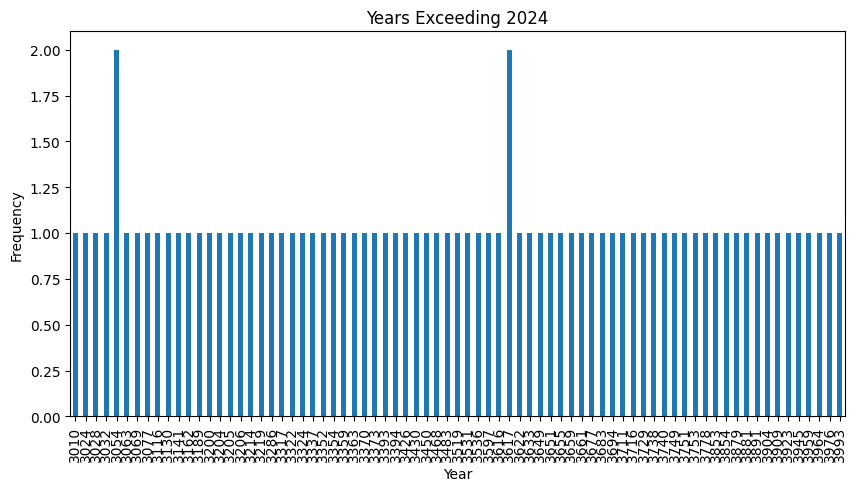

In [ ]:
years_exceeding = df['year'][df['year'] > 2024].value_counts()


plt.figure(figsize=(10, 5))
years_exceeding.sort_index().plot(kind='bar')
plt.title('Years Exceeding 2024')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

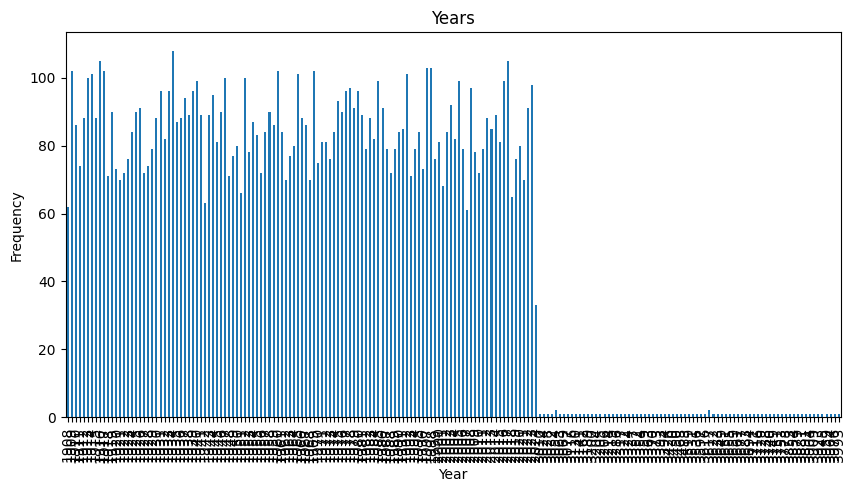

In [ ]:
years = df['year'].value_counts()


plt.figure(figsize=(10, 5))
years.sort_index().plot(kind='bar')
plt.title('Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

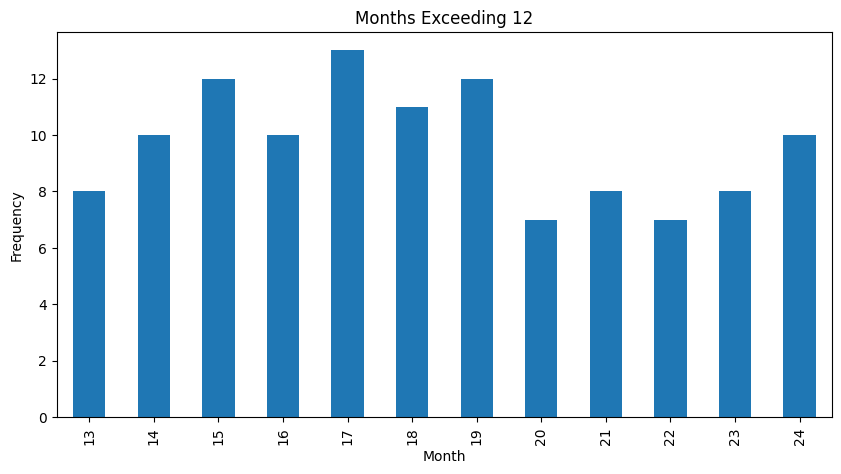

In [ ]:
months_exceeding = df['month'][df['month'] > 12].value_counts()

plt.figure(figsize=(10, 5))
months_exceeding.sort_index().plot(kind='bar')
plt.title('Months Exceeding 12')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

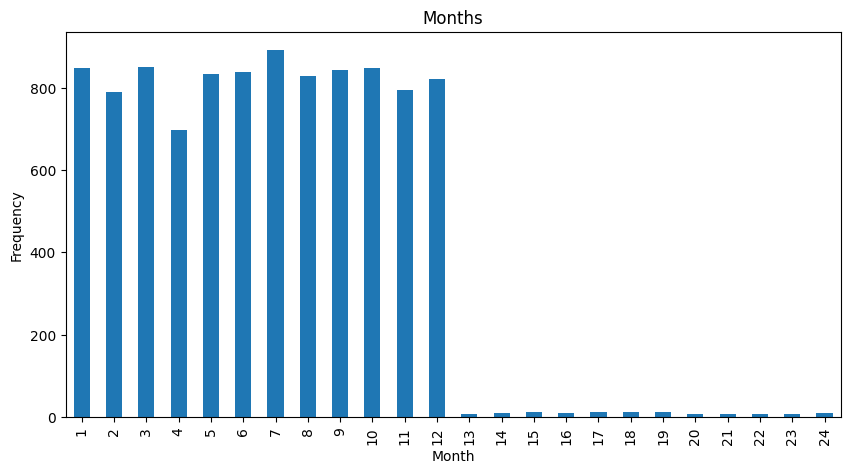

In [ ]:
months = df['month'].value_counts()

plt.figure(figsize=(10, 5))
months.sort_index().plot(kind='bar')
plt.title('Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

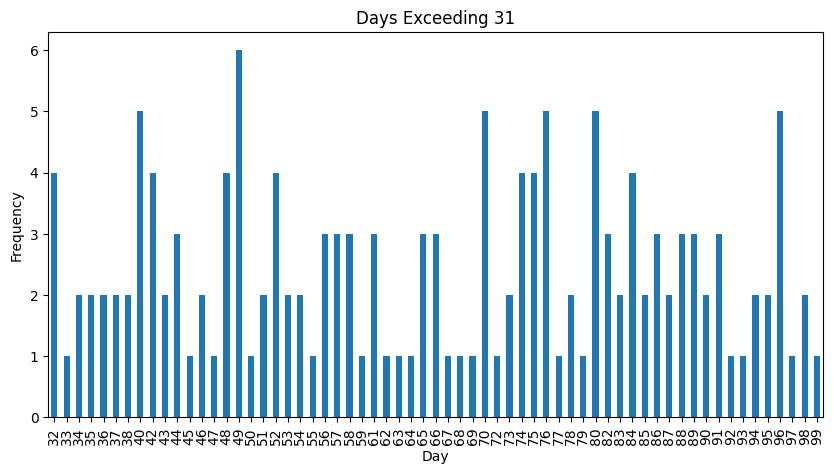

In [ ]:
days_exceeding = df['day'][df['day'] > 31].value_counts()

plt.figure(figsize=(10, 5))
days_exceeding.sort_index().plot(kind='bar')
plt.title('Days Exceeding 31')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

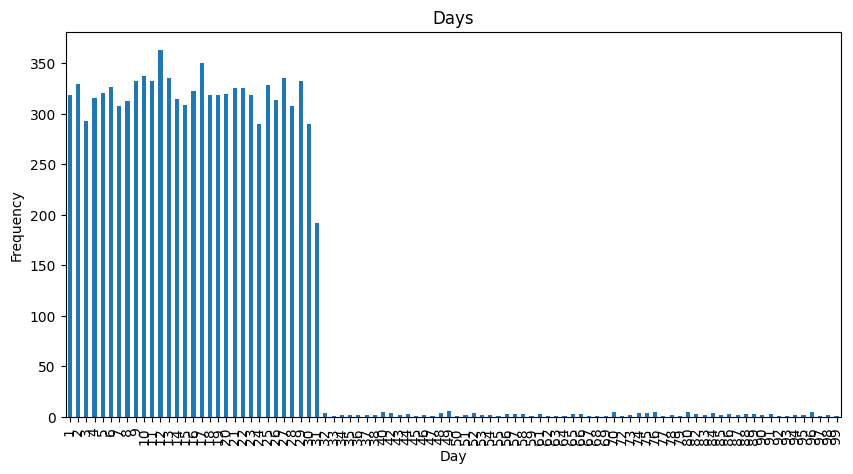

In [ ]:
days = df['day'].value_counts()

plt.figure(figsize=(10, 5))
days.sort_index().plot(kind='bar')
plt.title('Days')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.drop(columns=['year'], inplace= True)
df.drop(columns=['month'], inplace= True)
df.drop(columns=['day'], inplace= True)

We fix the issue by keeping the correct dates and deleting the incorrect ones. The column is now in datetime format.

In [ ]:
def valid_and_correct_date(date):
    try:
        year, month, day = map(int, date.split('-'))
        if month < 1 or month > 12:
            return pd.NaT  # Invalid month
        if day < 1 or day > 31:
            return pd.NaT  # Invalid day
        if year > 2024 or year < 1900:
            return pd.NaT  # Invalid year

        new_date = datetime(year, month, day)
        return new_date
    except ValueError:
        return pd.NaT

df['dob'] = df['dob'].apply(valid_and_correct_date)

df[['dob']].head(140)


dob
0   1924-09-28
1   2010-01-24
2   1990-01-25
3   1930-02-12
4   1981-01-04
..         ...
135 1980-06-12
136 1944-09-13
137        NaT
138 1969-10-12
139 2015-08-18

[140 rows x 1 columns]

In [ ]:
#To fill the NaT values, we fill with random dates, we check if we still have null values.
non_nan_dates = df['dob'].dropna().values

def fill_na_with_random_dates(df, column_name):
    nan_mask = df[column_name].isna()
    num_nans = nan_mask.sum()

    random_dates = np.random.choice(non_nan_dates, size=num_nans, replace=True)

    df.loc[nan_mask, column_name] = random_dates

fill_na_with_random_dates(df, 'dob')
df['dob'].isnull().sum()

0

In [ ]:
df['dob'].head(140)

0     1924-09-28
1     2010-01-24
2     1990-01-25
3     1930-02-12
4     1981-01-04
         ...    
135   1980-06-12
136   1944-09-13
137   1994-08-29
138   1969-10-12
139   2015-08-18
Name: dob, Length: 140, dtype: datetime64[ns]

Now that the dates are fixed lets check the distribution of years, months and days.

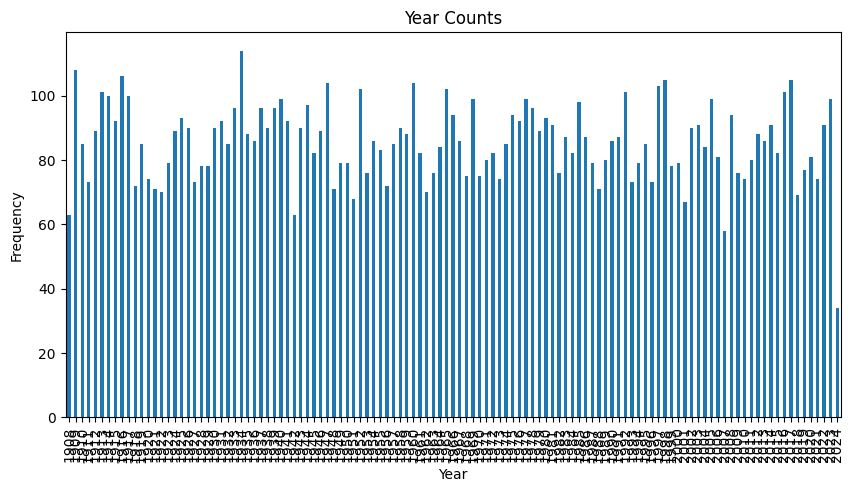

In [ ]:
year_counts = df['dob'].dt.year.value_counts()

plt.figure(figsize=(10, 5))
year_counts.sort_index().plot(kind='bar')
plt.title('Year Counts')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

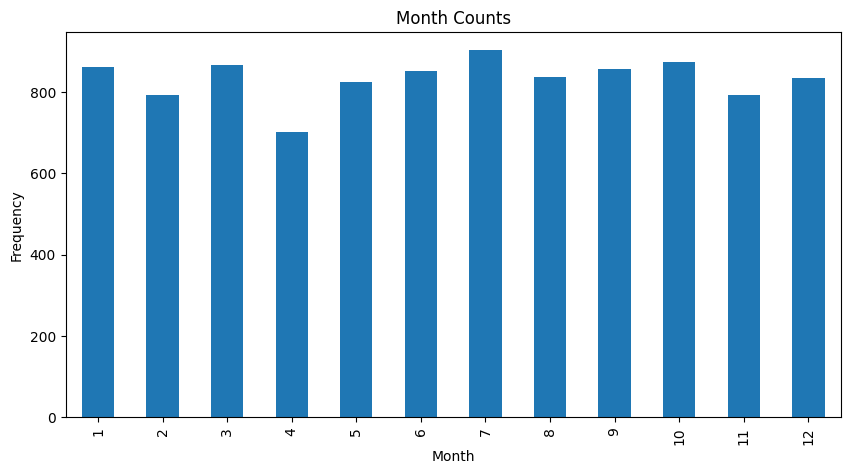

In [ ]:
month_counts = df['dob'].dt.month.value_counts()

plt.figure(figsize=(10, 5))
month_counts.sort_index().plot(kind='bar')
plt.title('Month Counts')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

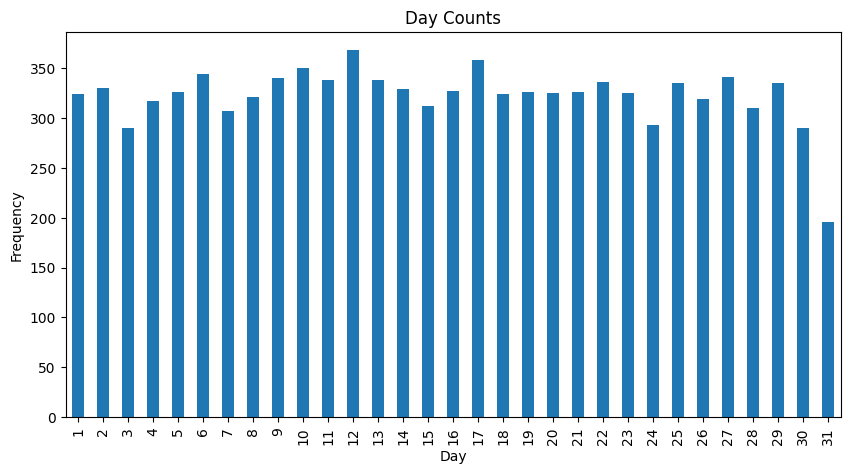

In [ ]:
day_counts = df['dob'].dt.day.value_counts()

plt.figure(figsize=(10, 5))
day_counts.sort_index().plot(kind='bar')
plt.title('Day Counts')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#For clarity purposes, we rename the column to Date of Birth
df.rename(columns={'dob': 'Date_of_Birth'}, inplace=True)

The column is now in datetime format, the incorrect dates where transformed to Null values

In [ ]:
df['Date_of_Birth'].head(140)

0     1924-09-28
1     2010-01-24
2     1990-01-25
3     1930-02-12
4     1981-01-04
         ...    
135   1980-06-12
136   1944-09-13
137   1994-08-29
138   1969-10-12
139   2015-08-18
Name: Date_of_Birth, Length: 140, dtype: datetime64[ns]

### Account Creation Date

In [ ]:
df['account_creation_date']

0       1977-02-29
1       2000-07-28
2       1970-02-29
3       1976-09-09
4       2020-02-19
           ...    
9995    1972-09-06
9996    1995-02-29
9997    1970-02-29
9998    1980-04-13
9999    2013-02-29
Name: account_creation_date, Length: 10000, dtype: object

In [ ]:
df['account_creation_date'].value_counts()

account_creation_date
1990-02-29    202
1999-02-29    195
2013-02-29    195
1997-02-29    193
1985-02-29    193
             ... 
1972-02-06      1
1988-10-07      1
1998-10-16      1
1980-07-04      1
2016-05-06      1
Name: count, Length: 2084, dtype: int64

After having a look into the column, we can see that there are a lot of inexistent dates regarding the month of February, as there is shown the 29th of this month in non-leap years like the first most frequent values.

In [ ]:
def check_invalid_feb29(date_str):
    if pd.isna(date_str):
        return False
    year, month, day = date_str.split('-')
    if month == '02' and day == '29':
        year = int(year)
        return not (year % 4 == 0 and (year % 100 != 0 or year % 400 == 0))
    return False

df['invalid_feb29'] = df['account_creation_date'].apply(check_invalid_feb29)


invalid_feb29_entries = df[df['invalid_feb29']]
invalid_feb29_entries[['account_creation_date']]

account_creation_date
0               1977-02-29
2               1970-02-29
5               1978-02-29
7               2003-02-29
8               2005-02-29
...                    ...
9993            2003-02-29
9994            2009-02-29
9996            1995-02-29
9997            1970-02-29
9999            2013-02-29

[7409 rows x 1 columns]

We create a new column to handle the invalid dates. As it is shown, there are 7409 rows that contain invalid dates

<ipython-input-77-ee51fbfc0e47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invalid_feb29_entries['year'] = invalid_feb29_entries['account_creation_date'].apply(lambda x: x.split('-')[0])


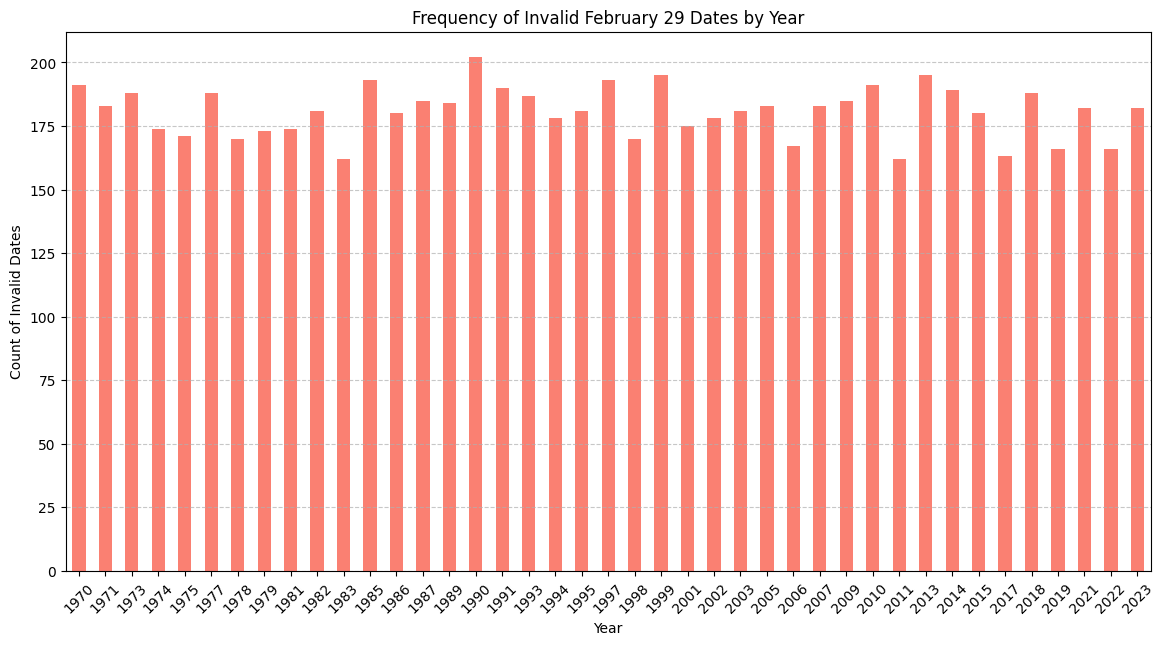

In [ ]:
invalid_feb29_entries['year'] = invalid_feb29_entries['account_creation_date'].apply(lambda x: x.split('-')[0])


yearly_counts = invalid_feb29_entries['year'].value_counts().sort_index()


plt.figure(figsize=(14, 7))
yearly_counts.plot(kind='bar', color='salmon')
plt.title('Frequency of Invalid February 29 Dates by Year')
plt.xlabel('Year')
plt.ylabel('Count of Invalid Dates')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This graph shows all the non-leap years that have the date 02-29 and the number of ocurrencies.

To solve the issue, we took the invalid dates and for simplicity terms, we changed them to yyyy-02-28.

In [ ]:
df.loc[invalid_feb29_entries.index, 'account_creation_date'] = df.loc[invalid_feb29_entries.index, 'account_creation_date'].apply(
    lambda x: x[:5] + '03-01' if x.endswith('02-29') else x
)

df['account_creation_date'] = pd.to_datetime(df['account_creation_date'], errors='coerce')

df.loc[invalid_feb29_entries.index, ['account_creation_date']].head()

account_creation_date
0            1977-03-01
2            1970-03-01
5            1978-03-01
7            2003-03-01
8            2005-03-01

In [ ]:
df.drop(columns=['invalid_feb29'], inplace=True)
df['account_creation_date']

0      1977-03-01
1      2000-07-28
2      1970-03-01
3      1976-09-09
4      2020-02-19
          ...    
9995   1972-09-06
9996   1995-03-01
9997   1970-03-01
9998   1980-04-13
9999   2013-03-01
Name: account_creation_date, Length: 10000, dtype: datetime64[ns]

### Last transaction Date

In [ ]:
df['last_transaction_date']

0                2019-09-08
1                2020-01-31
2                2004-06-25
3                2013-09-23
4                1998-09-29
               ...         
9995             1988-02-04
9996             2013-11-07
9997             1993-07-29
9998    1970-01-01 00:00:00
9999             1992-05-08
Name: last_transaction_date, Length: 10000, dtype: object

In [ ]:
df['last_transaction_date'].value_counts()

last_transaction_date
1970-01-01 00:00:00    476
1998-12-11               5
1972-09-06               5
1984-04-03               5
2006-10-13               5
                      ... 
2010-05-03               1
1989-01-31               1
1980-01-05               1
1979-01-21               1
1993-07-29               1
Name: count, Length: 7570, dtype: int64

The problem with this column is that many of the columns contain the start epoch date 1970-01-01, which means they are empty values.

Text(0, 0.5, 'Frequency')

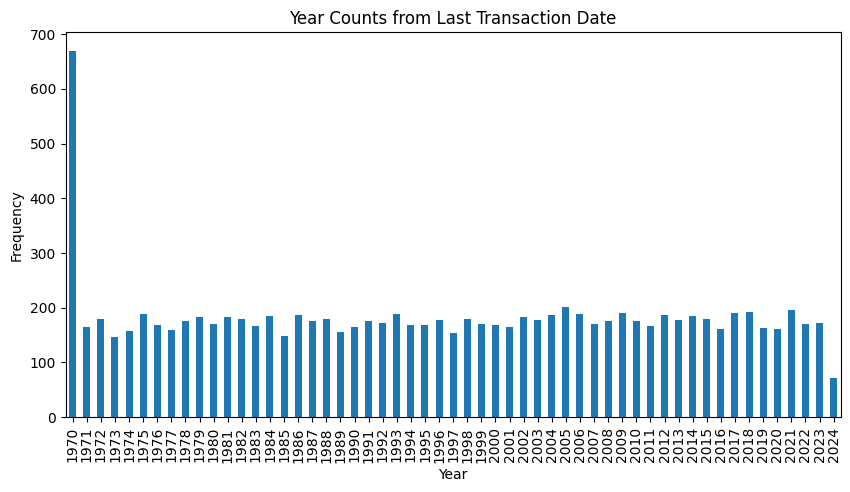

In [ ]:
df['year'] = df['last_transaction_date'].str.extract(r'(\d{4})')

year_counts = df['year'].value_counts()

plt.figure(figsize=(10, 5))
year_counts.sort_index().plot(kind='bar')
plt.title('Year Counts from Last Transaction Date')
plt.xlabel('Year')
plt.ylabel('Frequency')

In [ ]:
df.drop(columns=['year'],inplace=True)

We first convert the column to datetime and remove the incorrect dates

In [ ]:
df['last_transaction_date'] = pd.to_datetime(df['last_transaction_date'], errors='coerce')
df['last_transaction_date']

0      2019-09-08
1      2020-01-31
2      2004-06-25
3      2013-09-23
4      1998-09-29
          ...    
9995   1988-02-04
9996   2013-11-07
9997   1993-07-29
9998          NaT
9999   1992-05-08
Name: last_transaction_date, Length: 10000, dtype: datetime64[ns]

Now we replace the NaT values with random dates among the distribution.

In [ ]:
non_nan_dates = df['last_transaction_date'].dropna().values

def fill_na_with_random_dates(df, column_name):
    nan_mask = df[column_name].isna()
    num_nans = nan_mask.sum()

    random_dates = np.random.choice(non_nan_dates, size=num_nans, replace=True)

    df.loc[nan_mask, column_name] = random_dates

fill_na_with_random_dates(df, 'last_transaction_date')
df['last_transaction_date']

0      2019-09-08
1      2020-01-31
2      2004-06-25
3      2013-09-23
4      1998-09-29
          ...    
9995   1988-02-04
9996   2013-11-07
9997   1993-07-29
9998   1974-08-17
9999   1992-05-08
Name: last_transaction_date, Length: 10000, dtype: datetime64[ns]

In [ ]:
df['last_transaction_date'].value_counts()

last_transaction_date
2006-10-13    6
1972-09-06    6
1993-01-27    6
2015-03-02    5
1984-04-03    5
             ..
1995-06-16    1
1998-01-09    1
1985-07-07    1
1973-05-17    1
1993-07-29    1
Name: count, Length: 7569, dtype: int64

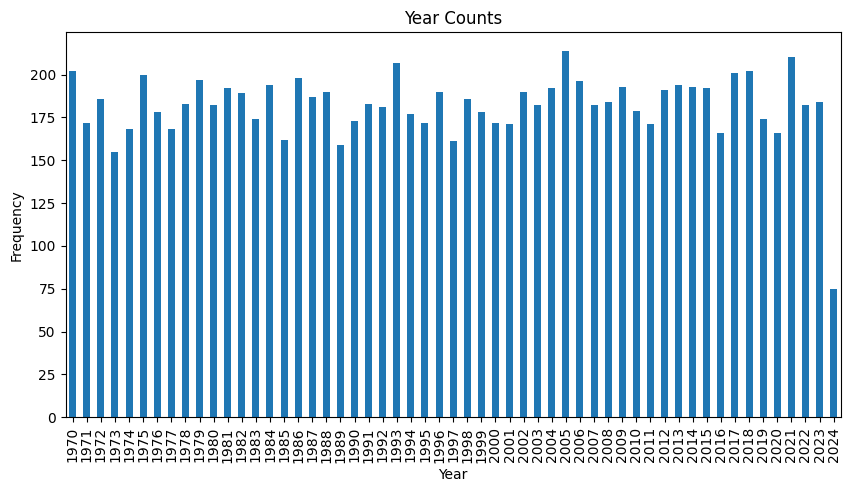

In [ ]:
year_counts = df['last_transaction_date'].dt.year.value_counts()

plt.figure(figsize=(10, 5))
year_counts.sort_index().plot(kind='bar')
plt.title('Year Counts')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

### Account resiliation date

In [ ]:
df['account_resiliation_date']

0       2021-07-06
1       1980-08-16
2       2004-05-15
3       1996-04-18
4       1975-02-13
           ...    
9995    2016-10-21
9996    1990-07-13
9997    1978-12-14
9998    2014-11-01
9999    1982-01-28
Name: account_resiliation_date, Length: 10000, dtype: object

In [ ]:
df['account_resiliation_date'].value_counts()

account_resiliation_date
1975-11-19    6
2012-11-19    6
1900-07-04    6
1988-09-27    5
1900-11-18    5
             ..
2021-02-12    1
2005-12-20    1
2004-06-25    1
1986-07-26    1
1978-12-14    1
Name: count, Length: 7786, dtype: int64

In [ ]:
df['account_resiliation_date']= pd.to_datetime(df['account_resiliation_date'], errors='coerce')

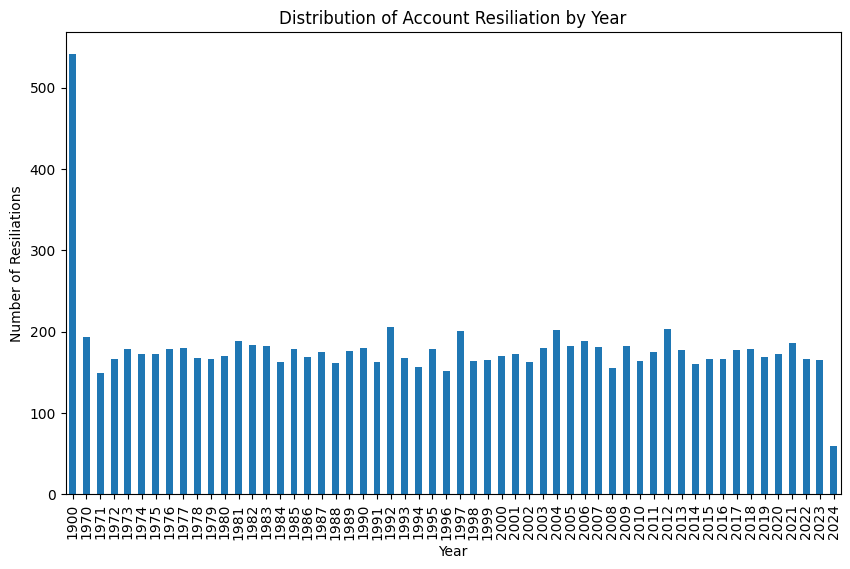

In [ ]:
df['resiliation_year'] = df['account_resiliation_date'].dt.year
year_counts = df['resiliation_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Distribution of Account Resiliation by Year')
plt.xlabel('Year')
plt.ylabel('Number of Resiliations')
plt.show()

The issue here is that there are missing years, so they take the year of 1900.
To solve this, we take those years and replace them with random years among the distribution.

In [ ]:
outlier_indices = df['account_resiliation_date'].dt.year == 1900
valid_years = df[(df['account_resiliation_date'].dt.year != 1900) & (df['account_resiliation_date'].notna())]['account_resiliation_date'].dt.year


sampled_years = valid_years.sample(n=outlier_indices.sum(), replace=True).values

In [ ]:
def replace_year(date, new_year):
    return datetime(year=new_year, month=date.month, day=date.day)


df.loc[outlier_indices, 'account_resiliation_date'] = [
    replace_year(date, new_year) for date, new_year in zip(df.loc[outlier_indices, 'account_resiliation_date'], sampled_years)
]

We plot the distribution to check the results. Now we have a more balanced and adeuqate distribution of the dates.

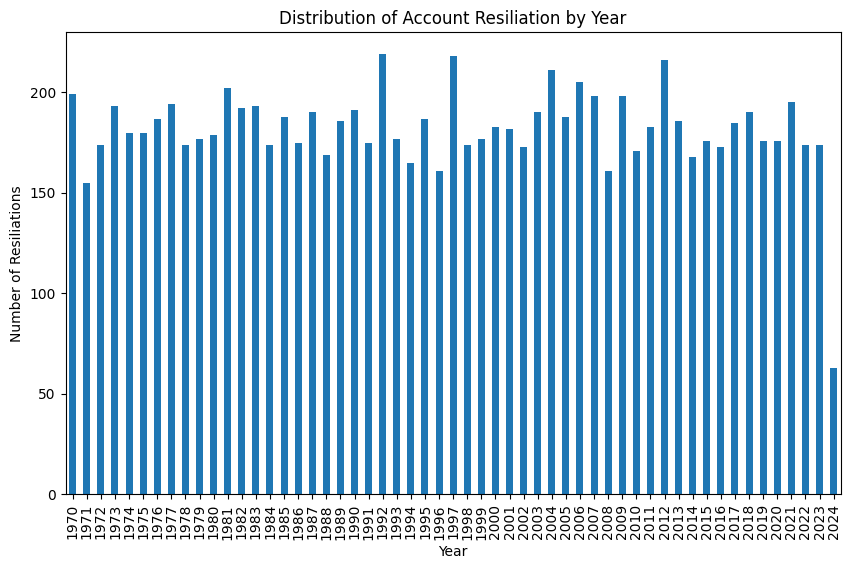

In [ ]:
df['resiliation_year'] = df['account_resiliation_date'].dt.year
year_counts = df['resiliation_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Distribution of Account Resiliation by Year')
plt.xlabel('Year')
plt.ylabel('Number of Resiliations')
plt.show()

In [ ]:
df.drop(columns=['resiliation_year'], inplace=True)

### First Contact Date

In [ ]:
df['first_contact_date']

0       2010-07-19
1       1986-06-28
2       1985-06-21
3       2019-09-08
4       19-10-1985
           ...    
9995    2020-12-28
9996    2021-09-29
9997    1995-12-14
9998    1990-12-19
9999    2010-04-25
Name: first_contact_date, Length: 10000, dtype: object

There are some dates that are in the incorrect format as they are in dd-mm-yyyy but they should be in yyyy-mm-dd.

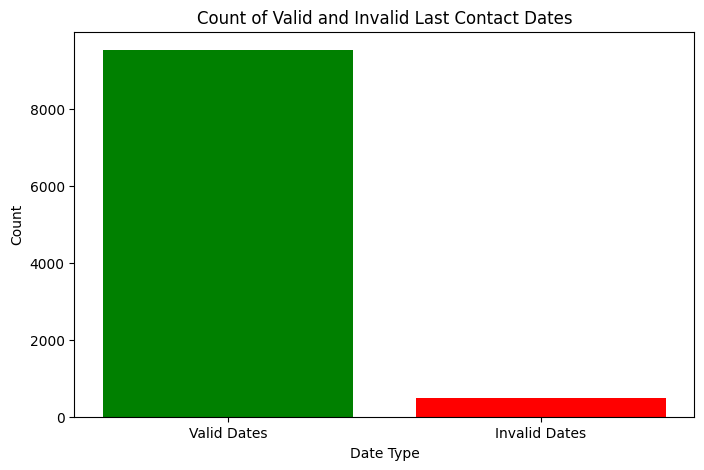

In [ ]:
def is_valid_date(date_str):
    pattern = re.compile(r'^\d{4}-\d{2}-\d{2}$')
    return bool(pattern.match(date_str))

# Apply the function to create a new column identifying valid dates
df['is_valid_date_fc'] = df['first_contact_date'].apply(is_valid_date)

# Count the number of valid and invalid dates
valid_dates_count = df['is_valid_date_fc'].sum()
invalid_dates_count = (~df['is_valid_date_fc']).sum()

# Create a bar plot to visualize the counts of valid and invalid dates
labels = ['Valid Dates', 'Invalid Dates']
counts = [valid_dates_count, invalid_dates_count]

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['green', 'red'])
plt.title('Count of Valid and Invalid Last Contact Dates')
plt.xlabel('Date Type')
plt.ylabel('Count')
plt.show()

Lets take a look at those samples

In [ ]:
def detect_wrong_format_fc(date_str):
    if pd.isna(date_str) or not re.match(r'^\d{2}-\d{2}-\d{4}$', date_str):
        return pd.NA  # Return a missing value if the format is correct or the entry is NaN
    else:
        return date_str

In [ ]:
df['incorrect_date_format_fc'] = df['first_contact_date'].apply(detect_wrong_format_fc)
df['incorrect_date_format_fc'].value_counts()

incorrect_date_format_fc
17-08-1979    2
21-06-2020    2
05-01-1992    2
14-10-1988    2
01-01-2017    2
             ..
23-07-1980    1
31-03-1984    1
12-02-1983    1
17-11-1974    1
18-06-1979    1
Name: count, Length: 478, dtype: int64

There are 478 incorrect formated dates so lets fix them using regex. When all the dates are formated correctly, the column can be converted to datetime format.

In [ ]:
def correct_date_format_fc(date_str):
    if pd.isna(date_str) or not re.match(r'^\d{2}-\d{2}-\d{4}$', date_str):
        return date_str  # Return the date as is if it's in the correct format or NaN
    else:
        day, month, year = date_str.split('-')
        return f"{year}-{month}-{day}"

In [ ]:
df.drop(columns=['incorrect_date_format_fc'], inplace=True)
df.drop(columns=['is_valid_date_fc'],inplace= True)
df['first_contact_date'] = df['first_contact_date'].apply(correct_date_format_fc)
df['first_contact_date'] = pd.to_datetime(df['first_contact_date'], errors='coerce')
df['first_contact_date']

0      2010-07-19
1      1986-06-28
2      1985-06-21
3      2019-09-08
4      1985-10-19
          ...    
9995   2020-12-28
9996   2021-09-29
9997   1995-12-14
9998   1990-12-19
9999   2010-04-25
Name: first_contact_date, Length: 10000, dtype: datetime64[ns]

In [ ]:
df.dtypes

prefix                              object
lastname                            object
firstname                           object
firstname_mother                    object
firstname_father                    object
description                         object
inquiry                             object
Date_of_Birth               datetime64[ns]
account_creation_date       datetime64[ns]
last_transaction_date       datetime64[ns]
account_resiliation_date    datetime64[ns]
first_contact_date          datetime64[ns]
last_contact_date                   object
latlon_home                         object
latlon_work                         object
x35_bank_branch                     object
email_work                          object
email_personnal                     object
email_sso                           object
email_vpn                           object
xml_authent_token                   object
profile_json                        object
cia_info_json                       object
salary     

### Last Contact Date

Similar to the previous column, here we find dome data formatted incorrectly. In this case we have some values in mm/dd/yyyy format so we have to convert them to yyyy-mm-dd.

In [ ]:
df['last_contact_date']

0       1996-05-06
1       1998-10-26
2       1983-06-05
3       2002-09-27
4       03/28/1998
           ...    
9995    1988-09-03
9996    1994-01-23
9997    2013-03-25
9998    1977-05-15
9999    2002-10-05
Name: last_contact_date, Length: 10000, dtype: object

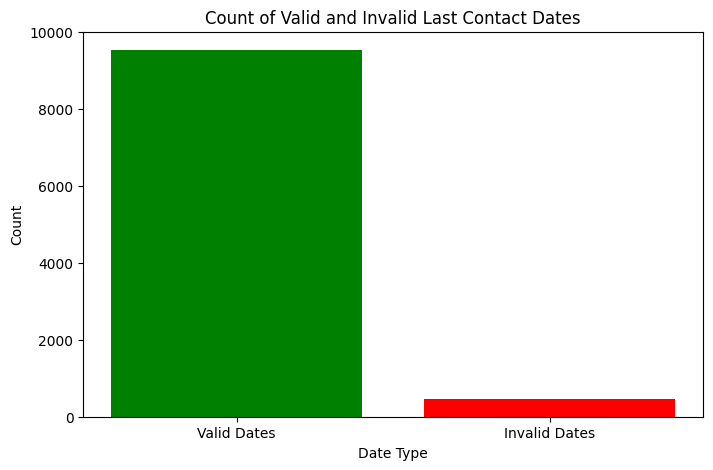

In [ ]:
def is_valid_date(date_str):
    pattern = re.compile(r'^\d{4}-\d{2}-\d{2}$')
    return bool(pattern.match(date_str))

# Apply the function to create a new column identifying valid dates
df['is_valid_date'] = df['last_contact_date'].apply(is_valid_date)

# Count the number of valid and invalid dates
valid_dates_count = df['is_valid_date'].sum()
invalid_dates_count = (~df['is_valid_date']).sum()

# Create a bar plot to visualize the counts of valid and invalid dates
labels = ['Valid Dates', 'Invalid Dates']
counts = [valid_dates_count, invalid_dates_count]

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['green', 'red'])
plt.title('Count of Valid and Invalid Last Contact Dates')
plt.xlabel('Date Type')
plt.ylabel('Count')
plt.show()

In [ ]:
df.drop(columns=['is_valid_date'],inplace = True)

In [ ]:
def detect_wrong_format_lc(date_str):
    if pd.isna(date_str) or not re.match(r'^\d{2}/\d{2}/\d{4}$', date_str):
        return pd.NA
    else:
        return date_str

In [ ]:
df['incorrect_date_format_lc'] = df['last_contact_date'].apply(detect_wrong_format_lc)
df['incorrect_date_format_lc'].value_counts()

incorrect_date_format_lc
04/27/1973    2
10/15/1973    2
01/01/2006    2
12/20/2007    2
04/19/1984    2
             ..
07/30/1973    1
01/20/1972    1
04/15/1977    1
10/03/2012    1
06/06/2015    1
Name: count, Length: 461, dtype: int64

We follow the same approach as for the previous column, we just adjust the function for this type of format.

In [ ]:
def correct_date_format_lc(date_str):
    if pd.isna(date_str) or not re.match(r'^\d{2}/\d{2}/\d{4}$', date_str):
        return date_str
    else:
        month, day, year = date_str.split('/')
        return f"{year}-{month}-{day}"

In [ ]:
df.drop(columns=['incorrect_date_format_lc'], inplace = True)
df['last_contact_date'] = df['last_contact_date'].apply(correct_date_format_lc)
df['last_contact_date'] = pd.to_datetime(df['last_contact_date'], errors = 'coerce')
df['last_contact_date']

0      1996-05-06
1      1998-10-26
2      1983-06-05
3      2002-09-27
4      1998-03-28
          ...    
9995   1988-09-03
9996   1994-01-23
9997   2013-03-25
9998   1977-05-15
9999   2002-10-05
Name: last_contact_date, Length: 10000, dtype: datetime64[ns]

In [ ]:
df.dtypes

prefix                              object
lastname                            object
firstname                           object
firstname_mother                    object
firstname_father                    object
description                         object
inquiry                             object
Date_of_Birth               datetime64[ns]
account_creation_date       datetime64[ns]
last_transaction_date       datetime64[ns]
account_resiliation_date    datetime64[ns]
first_contact_date          datetime64[ns]
last_contact_date           datetime64[ns]
latlon_home                         object
latlon_work                         object
x35_bank_branch                     object
email_work                          object
email_personnal                     object
email_sso                           object
email_vpn                           object
xml_authent_token                   object
profile_json                        object
cia_info_json                       object
salary     

### Extra cleaning based on logic

All the columns are correctly handled individually but there is one problem remaining: Some dates are not in a logical order. For example, for some cases the account creation date is after the last transaction date, which is not logical.

We set up the logical order of the dates by creating new columns to check if they are in the correct order or not.

In [ ]:
df['creation_before_last_trans'] = df['account_creation_date'] < df['last_transaction_date']
df['creation_before_resiliation'] = df['account_creation_date'] < df['account_resiliation_date']
df['first_contact_before_last'] = df['first_contact_date'] <= df['last_contact_date']
df['first_contact_before_resiliation'] = df['first_contact_date'] < df['account_resiliation_date']
df['first_contact_before_creation'] = df['first_contact_date'] <= df['account_creation_date']
df['last_trans_before_resiliation'] = df['last_transaction_date'] <= df['account_resiliation_date']

In [ ]:
#display(df['creation_before_last_trans'],df['creation_before_resiliation'],df['first_contact_before_last'],df['first_contact_before_resiliation'],
        #df['first_contact_before_creation'],df['last_trans_before_resiliation'])

In [ ]:
df['creation_before_last_trans'].value_counts()

creation_before_last_trans
True     5090
False    4910
Name: count, dtype: int64

In [ ]:
df['creation_before_resiliation'].value_counts()

creation_before_resiliation
True     5051
False    4949
Name: count, dtype: int64

In [ ]:
df['first_contact_before_last'].value_counts()

first_contact_before_last
False    5033
True     4967
Name: count, dtype: int64

In [ ]:
df['first_contact_before_resiliation'].value_counts()

first_contact_before_resiliation
False    5007
True     4993
Name: count, dtype: int64

In [ ]:
df['first_contact_before_creation'].value_counts()

first_contact_before_creation
False    5046
True     4954
Name: count, dtype: int64

In [ ]:
df['last_trans_before_resiliation'].value_counts()

last_trans_before_resiliation
False    5007
True     4993
Name: count, dtype: int64

As we do not have any background business information about why the data is in this order, we deliberately change the dates so they follow a logical order.

In [ ]:
mask = ~df['creation_before_last_trans']
df.loc[mask, 'last_transaction_date'] = df.loc[mask, 'account_creation_date'] + pd.Timedelta(days=1)


mask = ~df['creation_before_resiliation']
df.loc[mask, 'account_resiliation_date'] = df.loc[mask, 'account_creation_date'] + pd.Timedelta(days=30)


mask = ~df['first_contact_before_last']
df.loc[mask, 'last_contact_date'] = df.loc[mask, 'first_contact_date']

mask = ~df['first_contact_before_creation']
df.loc[mask, 'first_contact_date'] = df.loc[mask, 'account_creation_date'] - pd.Timedelta(days=1)


mask = ~df['first_contact_before_resiliation'] & df['account_resiliation_date'].notna()
df.loc[mask, 'first_contact_date'] = df.loc[mask, 'account_resiliation_date'] - pd.Timedelta(days=1)

mask = ~df['last_trans_before_resiliation']
df.loc[mask, 'account_resiliation_date'] = df.loc[mask, 'last_transaction_date'] + pd.Timedelta(days=1)

In [ ]:
df['creation_before_last_trans'] = df['account_creation_date'] < df['last_transaction_date']
df['creation_before_resiliation'] = df['account_creation_date'] < df['account_resiliation_date']
df['first_contact_before_last'] = df['first_contact_date'] <= df['last_contact_date']
df['first_contact_before_resiliation'] = df['first_contact_date'] < df['account_resiliation_date']
df['first_contact_before_creation'] = df['first_contact_date'] <= df['account_creation_date']
df['last_trans_before_resiliation'] = df['last_transaction_date'] <= df['account_resiliation_date']

In [ ]:
print(df[['creation_before_last_trans', 'creation_before_resiliation', 'first_contact_before_last',
          'first_contact_before_resiliation', 'first_contact_before_creation', 'last_trans_before_resiliation']].apply(pd.Series.value_counts))

       creation_before_last_trans  creation_before_resiliation  \
False                         NaN                          NaN   
True                      10000.0                      10000.0   

       first_contact_before_last  first_contact_before_resiliation  \
False                       1241                              1215   
True                        8759                              8785   

       first_contact_before_creation  last_trans_before_resiliation  
False                           5007                            NaN  
True                            4993                        10000.0  


We still have some problems with first_contact_before_last, first_contact_before_resiliation and first_contact_before_creation

In [ ]:
mask = df['first_contact_date'] > df['last_contact_date']
df.loc[mask, 'first_contact_date'] = df.loc[mask, 'last_contact_date']

mask = df['first_contact_date'] >= df['account_resiliation_date']
df.loc[mask, 'first_contact_date'] = df.loc[mask, 'account_resiliation_date'] - pd.Timedelta(days=1)

mask = df['first_contact_date'] > df['account_creation_date']
df.loc[mask, 'first_contact_date'] = df.loc[mask, 'account_creation_date']

In [ ]:
df['first_contact_before_last'] = df['first_contact_date'] <= df['last_contact_date']
df['first_contact_before_resiliation'] = df['first_contact_date'] < df['account_resiliation_date']
df['first_contact_before_creation'] = df['first_contact_date'] <= df['account_creation_date']

Now all the dates follow a logical order

In [ ]:
print(df[['creation_before_last_trans', 'creation_before_resiliation', 'first_contact_before_last',
          'first_contact_before_resiliation', 'first_contact_before_creation', 'last_trans_before_resiliation']].apply(pd.Series.value_counts))

      creation_before_last_trans  creation_before_resiliation  \
True                       10000                        10000   

      first_contact_before_last  first_contact_before_resiliation  \
True                      10000                             10000   

      first_contact_before_creation  last_trans_before_resiliation  
True                          10000                          10000  


In [ ]:
#display(df['first_contact_date'],df['account_creation_date'])
df.iloc[3]['first_contact_date']

Timestamp('1976-09-09 00:00:00')

In [ ]:
df.iloc[3]['account_creation_date']

Timestamp('1976-09-09 00:00:00')

In [ ]:
df.drop(columns=['creation_before_last_trans'],inplace=True)
df.drop(columns=['creation_before_resiliation'],inplace=True)
df.drop(columns=['first_contact_before_resiliation'],inplace=True)
df.drop(columns=['first_contact_before_last'],inplace=True)
df.drop(columns=['first_contact_before_creation'],inplace=True)
df.drop(columns=['last_trans_before_resiliation'],inplace=True)

In [ ]:
df.dtypes

prefix                              object
lastname                            object
firstname                           object
firstname_mother                    object
firstname_father                    object
description                         object
inquiry                             object
Date_of_Birth               datetime64[ns]
account_creation_date       datetime64[ns]
last_transaction_date       datetime64[ns]
account_resiliation_date    datetime64[ns]
first_contact_date          datetime64[ns]
last_contact_date           datetime64[ns]
latlon_home                         object
latlon_work                         object
x35_bank_branch                     object
email_work                          object
email_personnal                     object
email_sso                           object
email_vpn                           object
xml_authent_token                   object
profile_json                        object
cia_info_json                       object
salary     

## Emails

In [ ]:
df_email = df[['email_work', 'email_personnal','email_sso','email_vpn']]

Let's check if the emails have a valid format

In [ ]:
#def is_valid_email(email):
    #pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    #return bool(re.match(pattern, email))

In [ ]:
def is_valid_email(email):
    local_part_regex = re.compile(
        r"^(?![-!#$%&'*+/=?^_`{|}~.])"  # Can't start with special characters
        r"[A-Za-z0-9._+-]+"  # Allowed characters in the local part
        r"(?<![!#$%&'*+/=?^_`{|}~.-])$"  # Can't end with special characters
    )
    domain_part_regex = re.compile(
        r"^[A-Za-z0-9-]+"  # Allowed characters in the domain part
        r"(\.[A-Za-z0-9-]+)*"  # Allow periods to separate domain levels
        r"\.[A-Za-z]{2,}$"  # Valid TLD with at least 2 characters at the end
    )
    try:
        local_part, domain_part = email.split('@')
    except ValueError:
        return False
    if len(local_part) > 64 or len(domain_part) > 253 or len(email) > 254:
        return False
    if not local_part_regex.match(local_part) or not domain_part_regex.match(domain_part):
        return False
    if domain_part.startswith('-') or domain_part.endswith('-') or '..' in domain_part:
        return False

    return True

In [ ]:
df_isvalid_emails = df_email.applymap(is_valid_email)
df_isvalid_emails['email_work'].value_counts()

email_work
True     9522
False     478
Name: count, dtype: int64

In [ ]:
df_isvalid_emails['email_personnal'].value_counts()

email_personnal
True     9492
False     508
Name: count, dtype: int64

In [ ]:
df_isvalid_emails['email_sso'].value_counts()

email_sso
True     9513
False     487
Name: count, dtype: int64

In [ ]:
df_isvalid_emails['email_vpn'].value_counts()

email_vpn
True    10000
Name: count, dtype: int64

### Email Work

In [ ]:
df['email_work']

0         bergercaitlin@gonzalez-wallace.com
1                  brianna45@singh-stone.com
2                  jason59@blair-gardner.com
3                      ryansteven@jordan.com
4                 david31@carrillo-ewing.biz
                        ...                 
9995              zacharyjohnson@mccarty.com
9996                  angelabrown@horton.com
9997    melissawilliams@white-cunningham.biz
9998                 sarapreston@flores.info
9999                ross00@ortiz-herring.com
Name: email_work, Length: 10000, dtype: object

In [ ]:
df['email_work'].value_counts()

email_work
gward@ramsey.com                      2
bergercaitlin@gonzalez-wallace.com    1
garciaaaron@beck.biz                  1
thomas44@mitchell-rodriguez.com       1
markmorris@bailey.org                 1
                                     ..
wilsonalyssa@woodward.org             1
katherine29@mitchell.com              1
cynthia50@green.com                   1
fwerner@robles.org                    1
ross00@ortiz-herring.com              1
Name: count, Length: 9999, dtype: int64

We see that we have a repeated email address as a first issue, now lets check if they are all in a valid format.

In [ ]:
df['email_work_valid'] = df['email_work'].apply(is_valid_email)

valid_count = df['email_work_valid'].sum()
invalid_count = len(df) - valid_count
print(f"Valid emails: {valid_count}")
print(f"Invalid emails: {invalid_count}")

invalid_emails = df[~df['email_work_valid']].copy()
print("Invalid Emails:")
print(invalid_emails[['email_work']])

Valid emails: 9522
Invalid emails: 478
Invalid Emails:
                            email_work
13    michael!rooks@bailey-lambert.com
26              johnsonkaren@b!tes.com
38             tonybrown@lee-bowen.c!m
62              k!lewalter@edwards.com
81               lpeters@j!fferson.com
...                                ...
9856         vazquezrobert@!strada.com
9906      zgallegos@clark-atkinson.!om
9938         opoole@!ubio-friedman.biz
9939                kelli!2@martin.com
9994           micha!l82@singleton.com

[478 rows x 1 columns]


<ipython-input-139-47faae5e71bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_counts.index, y=email_counts.values, palette='viridis')


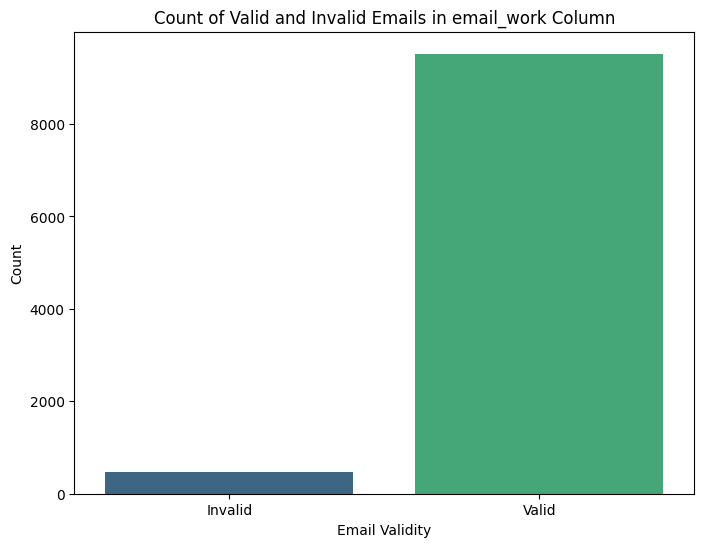

In [ ]:
email_counts = df['email_work_valid'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=email_counts.index, y=email_counts.values, palette='viridis')
plt.title('Count of Valid and Invalid Emails in email_work Column')
plt.xlabel('Email Validity')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Invalid', 'Valid'])
plt.show()

We will first clean the invalid characters that are at the beginning and the end of the address.

In [ ]:
def clean_email(email):
    if email.startswith('!'):
        email = email[1:]
    if email.endswith('!'):
        email = email[:-1]
    return email

df['email_work'] = df['email_work'].apply(clean_email)

In [ ]:
df['email_work_valid'] = df['email_work'].apply(is_valid_email)

valid_count = df['email_work_valid'].sum()
invalid_count = len(df) - valid_count
print(f"Valid emails: {valid_count}")
print(f"Invalid emails: {invalid_count}")

invalid_emails = df[~df['email_work_valid']].copy()
print("Invalid Emails:")
print(invalid_emails[['email_work']])

Valid emails: 9569
Invalid emails: 431
Invalid Emails:
                            email_work
13    michael!rooks@bailey-lambert.com
26              johnsonkaren@b!tes.com
38             tonybrown@lee-bowen.c!m
62              k!lewalter@edwards.com
81               lpeters@j!fferson.com
...                                ...
9856         vazquezrobert@!strada.com
9906      zgallegos@clark-atkinson.!om
9938         opoole@!ubio-friedman.biz
9939                kelli!2@martin.com
9994           micha!l82@singleton.com

[431 rows x 1 columns]


Now we will clean trying to replace ! by the most suitable character. We also want to ensure that everything is correct, so we define functions to ensure that. They will be useful to clean the other columns.

In [ ]:
def correct_tld(tld):
    tld = tld.lower()
    if len(set('com') & set(tld)) >= 2:
        return 'com'
    elif len(set('biz') & set(tld)) >= 2:
        return 'biz'
    elif len(set('info') & set(tld)) >= 3:
        return 'info'
    elif len(set('net') & set(tld)) >= 2:
        return 'net'
    elif len(set('org') & set(tld)) >= 2:
        return 'org'
    return tld

In [ ]:
from fuzzywuzzy import process

replacement_chars = 'abcdefghijklmnopqrstuvwxyz'

def generate_replacements(part):
    replacements = []
    for char in replacement_chars:
        replacements.append(part.replace('!', char))
    return replacements

def correct_email(email):
    local_part, domain_part = email.split('@')

    if '!' in local_part:
        possible_local_replacements = generate_replacements(local_part)
        corrected_local_part = process.extractOne(local_part, possible_local_replacements)[0]
    else:
        corrected_local_part = local_part

    if '!' in domain_part:
        possible_domain_replacements = generate_replacements(domain_part)
        corrected_domain_part = process.extractOne(domain_part, possible_domain_replacements)[0]
    else:
        corrected_domain_part = domain_part

    domain_parts = corrected_domain_part.split('.')
    if len(domain_parts) > 1:
        domain_parts[-1] = correct_tld(domain_parts[-1])
    corrected_domain_part = '.'.join(domain_parts)

    return corrected_local_part + '@' + corrected_domain_part


In [ ]:
df.loc[~df['email_work_valid'], 'email_work'] = df.loc[~df['email_work_valid'], 'email_work'].apply(correct_email)

df['email_work_valid'] = df['email_work'].apply(is_valid_email)

corrected_samples = df.loc[invalid_emails.index, ['email_work']]
print("Corrected Emails:")
print(corrected_samples)

Corrected Emails:
                            email_work
13    michaelarooks@bailey-lambert.com
26              johnsonkaren@bates.com
38             tonybrown@lee-bowen.com
62              kalewalter@edwards.com
81               lpeters@jafferson.com
...                                ...
9856         vazquezrobert@astrada.com
9906      zgallegos@clark-atkinson.com
9938         opoole@aubio-friedman.biz
9939                kellia2@martin.com
9994           michaal82@singleton.com

[431 rows x 1 columns]


In [ ]:
df['email_work_valid'] = df['email_work'].apply(is_valid_email)

valid_count = df['email_work_valid'].sum()
invalid_count = len(df) - valid_count
print(f"Valid emails: {valid_count}")
print(f"Invalid emails: {invalid_count}")

invalid_emails = df[~df['email_work_valid']]
print("Invalid Emails:")
print(invalid_emails[['email_work']])

Valid emails: 10000
Invalid emails: 0
Invalid Emails:
Empty DataFrame
Columns: [email_work]
Index: []


<ipython-input-146-d3faccd7d2fa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_counts.index, y=email_counts.values, palette='viridis')


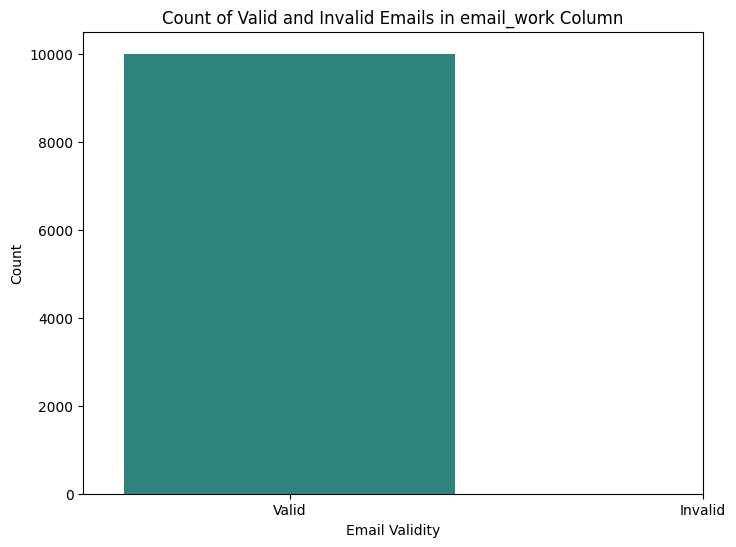

In [ ]:
email_counts = df['email_work_valid'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=email_counts.index, y=email_counts.values, palette='viridis')
plt.title('Count of Valid and Invalid Emails in email_work Column')
plt.xlabel('Email Validity')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Valid', 'Invalid'])
plt.show()

In [ ]:
df.drop(columns=['email_work_valid'], inplace=True)

We finish by getting rid of duplicates.

In [ ]:
df['email_work'] = df['email_work'].where(~df['email_work'].duplicated(), other=pd.NA)
df['email_work'].value_counts()

email_work
bergercaitlin@gonzalez-wallace.com    1
jessicabonilla@hicks.com              1
thomas44@mitchell-rodriguez.com       1
markmorris@bailey.org                 1
igriffith@davis-lee.com               1
                                     ..
wilsonalyssa@woodward.org             1
katherine29@mitchell.com              1
cynthia50@green.com                   1
fwerner@robles.org                    1
ross00@ortiz-herring.com              1
Name: count, Length: 9999, dtype: int64

### Email personal

In [ ]:
df['email_personnal']

0              nkrause@example.org
1              david08@example.net
2          georgecohen@example.org
3        marquezeileen@example.net
4             cwebster@example.com
                   ...            
9995      justinconner@example.net
9996    comptonrichard@example.com
9997            eric44@example.org
9998             amy15@example.com
9999        erictaylor@example.net
Name: email_personnal, Length: 10000, dtype: object

In [ ]:
df['email_personnal'].value_counts()

email_personnal
ksmith@example.com              5
wwilliams@example.com           4
gcampbell@example.org           3
gmiller@example.net             3
ysmith@example.net              3
                               ..
alyssa54@example.org            1
kristen91@example.com           1
peterscatherine@example..org    1
kimberly87@example.com          1
erictaylor@example.net          1
Name: count, Length: 9814, dtype: int64

In [ ]:

df['email_personnal_valid'] = df['email_personnal'].apply(is_valid_email)

valid_count = df['email_personnal_valid'].sum()
invalid_count = len(df) - valid_count
print(f"Valid emails: {valid_count}")
print(f"Invalid emails: {invalid_count}")

invalid_emails = df[~df['email_personnal_valid']].copy()
print("Invalid Emails:")
print(invalid_emails[['email_personnal']])

Valid emails: 9492
Invalid emails: 508
Invalid Emails:
                 email_personnal
21         daniel84@example..org
23        icopeland@example..org
74    branchwilliam@example..net
78     lisaatkinson@example..com
100       richard32@example..com
...                          ...
9953      michael95@example..com
9958  katrinagreene@example..org
9975    garcialinda@example..net
9977     walkerross@example..net
9992      leeandrew@example..org

[508 rows x 1 columns]


We see that the invalid addresses have two dots before the TLD when they should only have one.

<ipython-input-152-2915d19c448e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_counts.index, y=email_counts.values, palette='viridis')


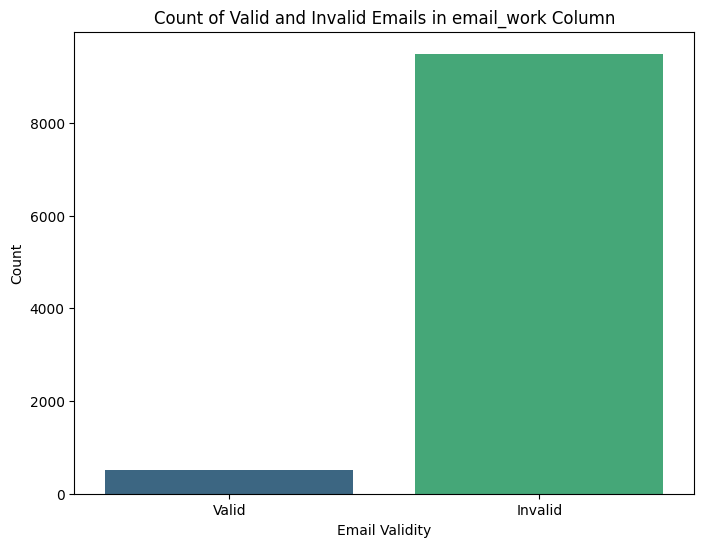

In [ ]:
email_counts = df['email_personnal_valid'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=email_counts.index, y=email_counts.values, palette='viridis')
plt.title('Count of Valid and Invalid Emails in email_work Column')
plt.xlabel('Email Validity')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Valid', 'Invalid'])
plt.show()

In [ ]:
def correct_double_dots(email):
    corrected_email = re.sub(r'\.\.(?=[a-zA-Z]{2,}$)', '.', email)
    return corrected_email

df['email_personnal'] = df['email_personnal'].apply(correct_double_dots)

In [ ]:
corrected_samples = df.loc[invalid_emails.index, ['email_personnal']]
print("Corrected Emails:")
print(corrected_samples)

Corrected Emails:
                email_personnal
21         daniel84@example.org
23        icopeland@example.org
74    branchwilliam@example.net
78     lisaatkinson@example.com
100       richard32@example.com
...                         ...
9953      michael95@example.com
9958  katrinagreene@example.org
9975    garcialinda@example.net
9977     walkerross@example.net
9992      leeandrew@example.org

[508 rows x 1 columns]


In [ ]:
df['email_personnal_valid'] = df['email_personnal'].apply(is_valid_email)
df['email_personnal_valid'].value_counts()

email_personnal_valid
True    10000
Name: count, dtype: int64

In [ ]:
df['email_personnal'] = df['email_personnal'].where(~df['email_personnal'].duplicated(), other=pd.NA)
df['email_personnal'].value_counts()

email_personnal
nkrause@example.org               1
williamsjacqueline@example.com    1
batesalison@example.org           1
timothy57@example.com             1
joshuawilliams@example.net        1
                                 ..
zmunoz@example.org                1
jimenezrandy@example.org          1
bwilliams@example.com             1
wjohnson@example.com              1
erictaylor@example.net            1
Name: count, Length: 9796, dtype: int64

<ipython-input-157-2915d19c448e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_counts.index, y=email_counts.values, palette='viridis')


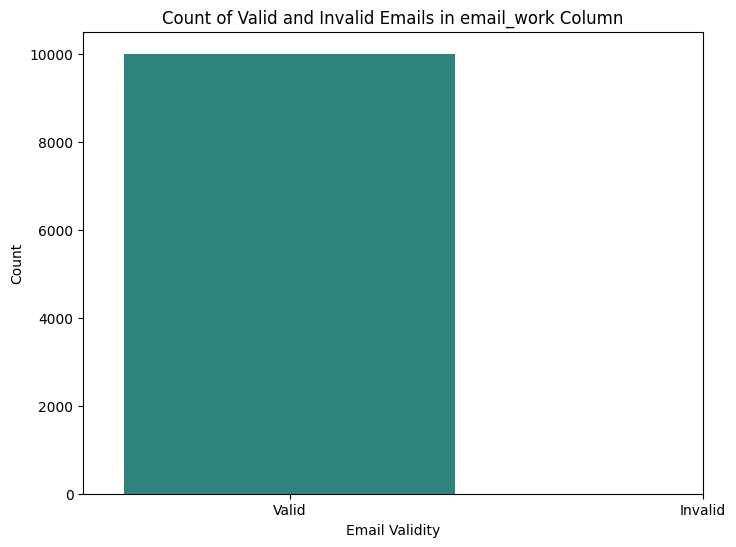

In [ ]:
email_counts = df['email_personnal_valid'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=email_counts.index, y=email_counts.values, palette='viridis')
plt.title('Count of Valid and Invalid Emails in email_work Column')
plt.xlabel('Email Validity')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Valid', 'Invalid'])
plt.show()

In [ ]:
df.drop(columns=['email_personnal_valid'],inplace=True)

### Email sso

In [ ]:
df['email_sso']

0           jessica39@example.org
1          joannolson@example.com
2          brianoneal@example.com
3            adrian09@example.org
4       kristenbowman@example.com
                  ...            
9995    bishopanthony@example.org
9996           adam92@example.net
9997    stevenjohnson@example.net
9998         mkennedy@example.net
9999           blucas@example.org
Name: email_sso, Length: 10000, dtype: object

In [ ]:
df['email_sso'].value_counts()

email_sso
croberts@example.net        4
xbrown@example.com          4
vwilliams@example.org       4
fbrown@example.org          3
lthompson@example.org       3
                           ..
ilopez@example.com          1
nicholskayla@example.com    1
megan77@example.net         1
kirstenvance@example.net    1
blucas@example.org          1
Name: count, Length: 9788, dtype: int64

In [ ]:
df['email_sso_valid'] = df['email_sso'].apply(is_valid_email)

valid_count = df['email_sso_valid'].sum()
invalid_count = len(df) - valid_count
print(f"Valid emails: {valid_count}")
print(f"Invalid emails: {invalid_count}")

invalid_emails = df[~df['email_sso_valid']].copy()
print("Invalid Emails:")
print(invalid_emails[['email_sso']])

Valid emails: 9513
Invalid emails: 487
Invalid Emails:
                         email_sso
10         alexanρra07@example.org
13             eriξa19@example.net
43             tfoster@Ωxample.net
69      suttonr♥ginald@example.org
96       brewerrachael@Κxample.com
...                            ...
9885       kathyj″rvis@example.org
9908    stephaniesmith@example.coΒ
9925      murrayshe×ry@example.net
9930       christina28@exam†le.org
9950  alvarìdosamantha@example.net

[487 rows x 1 columns]


We see that the emails contain invalid characters, using a similar approach as email_work we will clean the column.

<ipython-input-162-9e98203ac7b5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_counts.index, y=email_counts.values, palette='viridis')


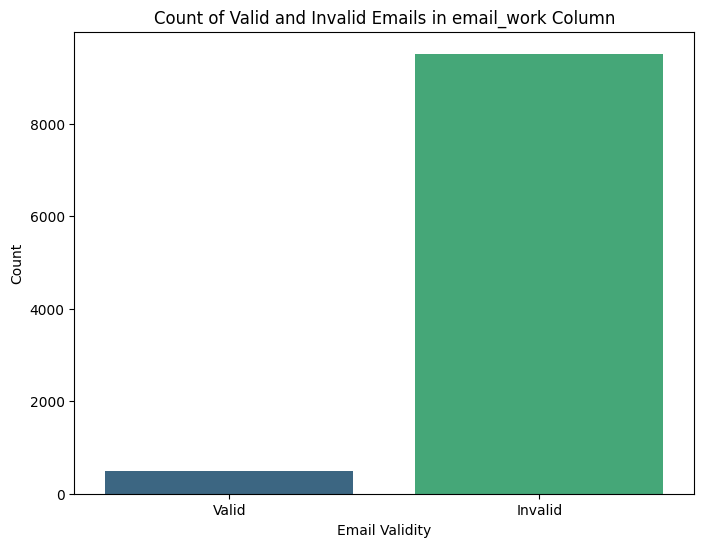

In [ ]:
email_counts = df['email_sso_valid'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=email_counts.index, y=email_counts.values, palette='viridis')
plt.title('Count of Valid and Invalid Emails in email_work Column')
plt.xlabel('Email Validity')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Valid', 'Invalid'])
plt.show()

In [ ]:
replacement_chars = 'abcdefghijklmnopqrstuvwxyz0123456789'

def generate_replacements(part):
    replacements = []
    for char in part:
        if char not in replacement_chars:
            for replacement in replacement_chars:
                replacements.append(part.replace(char, replacement))
    return replacements

# Function to correct the TLD based on specific character patterns
def correct_tld(tld):
    tld = tld.lower()
    if len(set('com') & set(tld)) >= 2:
        return 'com'
    elif len(set('biz') & set(tld)) >= 2:
        return 'biz'
    elif len(set('info') & set(tld)) >= 3:
        return 'info'
    elif len(set('net') & set(tld)) >= 2:
        return 'net'
    elif len(set('org') & set(tld)) >= 2:
        return 'org'
    return tld

# Function to correct email addresses
def correct_email(email):
    try:
        local_part, domain_part = email.split('@')
    except ValueError:
        return email  # Return the original email if splitting fails

    # Correct local part
    corrected_local_part = local_part
    for char in local_part:
        if char not in replacement_chars:
            possible_local_replacements = generate_replacements(corrected_local_part)
            corrected_local_part = process.extractOne(corrected_local_part, possible_local_replacements)[0]

    # Ensure the domain name is always 'example'
    corrected_domain_name = "example"

    # Correct TLD if necessary
    domain_name, tld = domain_part.rsplit('.', 1)
    corrected_tld = correct_tld(tld)
    corrected_domain_part = f"{corrected_domain_name}.{corrected_tld}"

    return corrected_local_part + '@' + corrected_domain_part

In [ ]:
df.loc[~df['email_sso_valid'], 'email_sso'] = df.loc[~df['email_sso_valid'], 'email_sso'].apply(correct_email)

df['email_sso_valid'] = df['email_sso'].apply(is_valid_email)

corrected_samples = df.loc[invalid_emails.index, ['email_sso']]
print("Corrected Emails:")
print(corrected_samples)

Corrected Emails:
                         email_sso
10         alexanara07@example.org
13             eriaa19@example.net
43             tfoster@example.net
69      suttonraginald@example.org
96       brewerrachael@example.com
...                            ...
9885       kathyjarvis@example.org
9908    stephaniesmith@example.com
9925      murraysheary@example.net
9930       christina28@example.org
9950  alvaradosamantha@example.net

[487 rows x 1 columns]


In [ ]:
df['email_sso_valid'] = df['email_sso'].apply(is_valid_email)

valid_count = df['email_sso_valid'].sum()
invalid_count = len(df) - valid_count
print(f"Valid emails: {valid_count}")
print(f"Invalid emails: {invalid_count}")

invalid_emails = df[~df['email_sso_valid']].copy()
print("Invalid Emails:")
print(invalid_emails[['email_sso']])

Valid emails: 10000
Invalid emails: 0
Invalid Emails:
Empty DataFrame
Columns: [email_sso]
Index: []


<ipython-input-166-9e98203ac7b5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_counts.index, y=email_counts.values, palette='viridis')


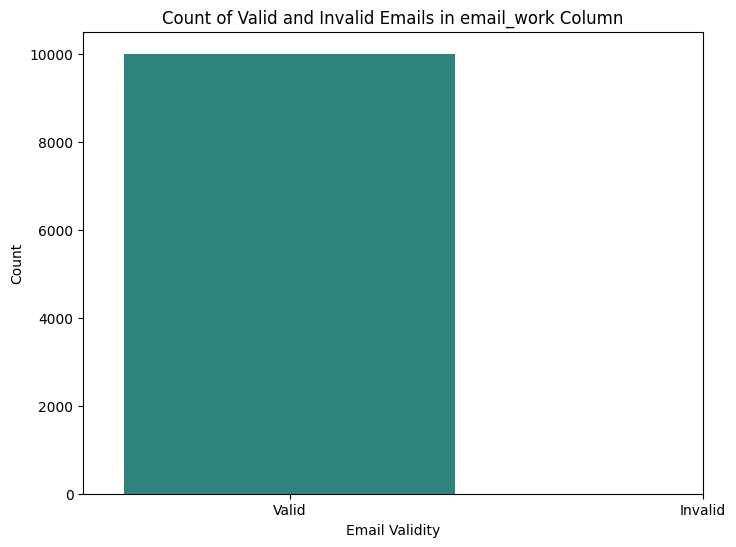

In [ ]:
email_counts = df['email_sso_valid'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=email_counts.index, y=email_counts.values, palette='viridis')
plt.title('Count of Valid and Invalid Emails in email_work Column')
plt.xlabel('Email Validity')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Valid', 'Invalid'])
plt.show()

In [ ]:
df.drop(columns= ['email_sso_valid'],inplace = True)

In [ ]:
df['email_sso'] = df['email_sso'].where(~df['email_sso'].duplicated(), other=pd.NA)
df['email_sso'].value_counts()

email_sso
jessica39@example.org      1
lopeztricia@example.org    1
frank33@example.net        1
juliesantos@example.org    1
robert49@example.net       1
                          ..
rebecca16@example.net      1
oolsen@example.com         1
davidwalsh@example.com     1
rick85@example.net         1
blucas@example.org         1
Name: count, Length: 9772, dtype: int64

### Email vpn

In [ ]:
df['email_vpn']

0                matthew23@gmail.com
1       christopherbrown@hotmail.com
2            ryangutierrez@yahoo.com
3          patrickfisher@hotmail.com
4              elizabeth02@gmail.com
                    ...             
9995      claytonabigail@hotmail.com
9996    calderonkathleen@hotmail.com
9997             michael94@yahoo.com
9998          danielramsey@gmail.com
9999               knguyen@yahoo.com
Name: email_vpn, Length: 10000, dtype: object

In [ ]:
df['email_vpn'].value_counts()

email_vpn
nsmith@yahoo.com              5
ejones@yahoo.com              3
gsmith@gmail.com              3
mharris@gmail.com             3
zjones@gmail.com              3
                             ..
garrettjames@hotmail.com      1
michaelsweeney@gmail.comzh    1
fletcherseth@hotmail.com      1
amysims@gmail.com             1
knguyen@yahoo.com             1
Name: count, Length: 9837, dtype: int64

In [ ]:
df['email_vpn_valid'] = df['email_vpn'].apply(is_valid_email)

valid_count = df['email_vpn_valid'].sum()
invalid_count = len(df) - valid_count
print(f"Valid emails: {valid_count}")
print(f"Invalid emails: {invalid_count}")

Valid emails: 10000
Invalid emails: 0


Apparently all there are not invalid characters but lets check that all the domains are correct.


In [ ]:
def extract_tld(email):
    try:
        return email.split('.')[-1]
    except IndexError:
        return None

# Apply the function to the 'email_vpn' column
df['tld'] = df['email_vpn'].apply(extract_tld)

# Count the occurrences of each TLD
tld_counts = Counter(df['tld'])

# Display the counts
print(tld_counts)

Counter({'com': 9550, 'compc': 4, 'comqs': 4, 'compm': 3, 'comxf': 3, 'comqg': 3, 'comjm': 3, 'comkr': 3, 'comji': 3, 'comyb': 3, 'comyz': 3, 'comvn': 3, 'comft': 3, 'comml': 3, 'comgz': 3, 'comex': 3, 'comol': 3, 'comnz': 3, 'comhn': 3, 'comzh': 3, 'comgh': 3, 'comgf': 3, 'comjq': 3, 'comeh': 2, 'comna': 2, 'comem': 2, 'combm': 2, 'comjv': 2, 'comla': 2, 'comcm': 2, 'combp': 2, 'comxr': 2, 'comuh': 2, 'comzc': 2, 'comne': 2, 'comkq': 2, 'comhw': 2, 'comvu': 2, 'combj': 2, 'comvs': 2, 'comxa': 2, 'comhq': 2, 'comby': 2, 'comfk': 2, 'comuv': 2, 'comvi': 2, 'comqj': 2, 'comeg': 2, 'comrm': 2, 'comcq': 2, 'comdm': 2, 'comge': 2, 'comys': 2, 'comlr': 2, 'comxx': 2, 'comiz': 2, 'comjz': 2, 'comxs': 2, 'combk': 2, 'comey': 2, 'comjf': 2, 'comoh': 2, 'comiv': 2, 'comim': 2, 'comuf': 2, 'comcn': 2, 'comzu': 2, 'comlu': 2, 'comjr': 2, 'comqy': 2, 'comih': 2, 'comcz': 2, 'comoy': 2, 'comqe': 2, 'comzn': 2, 'comsc': 2, 'comrg': 2, 'comgs': 2, 'comhi': 2, 'comfx': 2, 'commu': 2, 'comrz': 2, 'comgk

As we can see we have mistakes with the TLDs. They need to be set up to .com

<ipython-input-173-5a849734edbc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TLD', y='Count', data=tld_counts_df, palette='viridis')


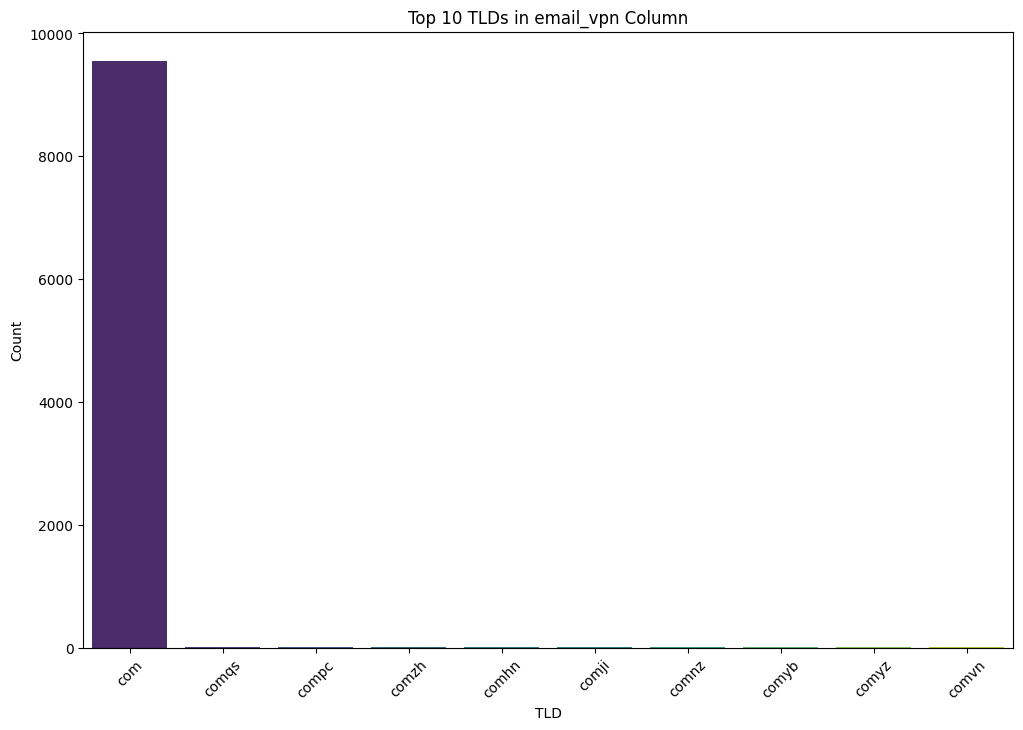

In [ ]:
tld_counts_df = pd.DataFrame(tld_counts.items(), columns=['TLD', 'Count']).sort_values(by='Count', ascending=False).head(10)

# Plot the top 10 TLD counts
plt.figure(figsize=(12, 8))
sns.barplot(x='TLD', y='Count', data=tld_counts_df, palette='viridis')
plt.title('Top 10 TLDs in email_vpn Column')
plt.xlabel('TLD')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def correct_tld_to_com(email):
    try:
        local_part, domain_part = email.split('@')
        domain_parts = domain_part.split('.')
        domain_parts[-1] = 'com'
        corrected_domain = '.'.join(domain_parts)
        return local_part + '@' + corrected_domain
    except ValueError:
        return email

df['email_vpn'] = df['email_vpn'].apply(correct_tld_to_com)

In [ ]:
df['tld'] = df['email_vpn'].apply(extract_tld)
tld_counts = Counter(df['tld'])

# Display the counts
print(tld_counts)

Counter({'com': 10000})


<ipython-input-176-5a849734edbc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TLD', y='Count', data=tld_counts_df, palette='viridis')


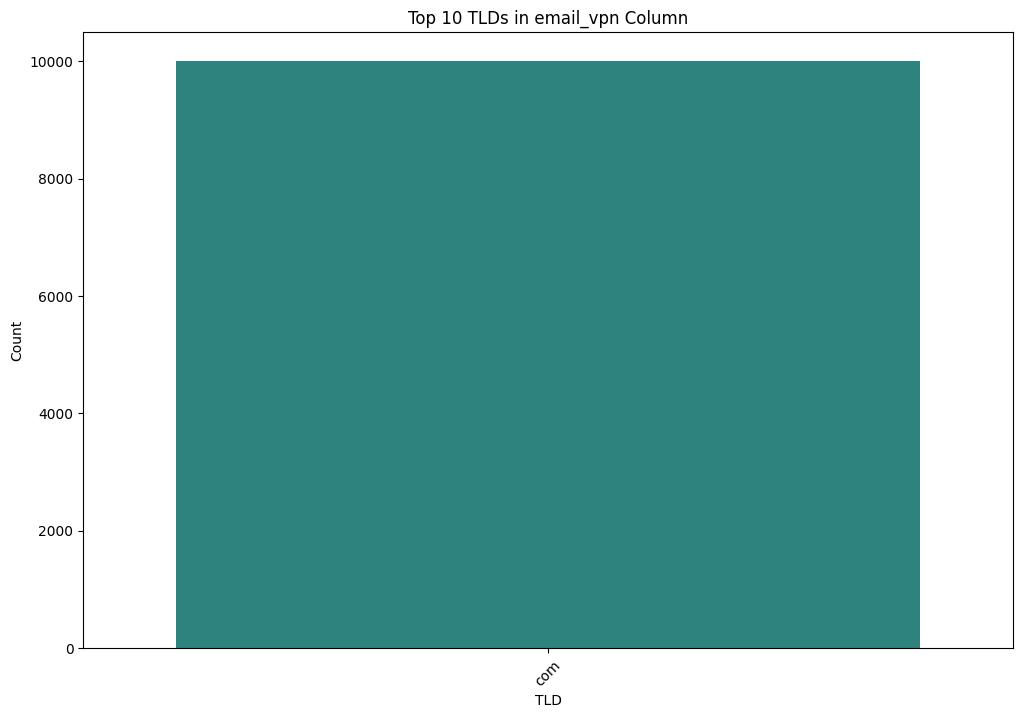

In [ ]:
tld_counts_df = pd.DataFrame(tld_counts.items(), columns=['TLD', 'Count']).sort_values(by='Count', ascending=False).head(10)

# Plot the top 10 TLD counts
plt.figure(figsize=(12, 8))
sns.barplot(x='TLD', y='Count', data=tld_counts_df, palette='viridis')
plt.title('Top 10 TLDs in email_vpn Column')
plt.xlabel('TLD')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.drop(columns=['email_vpn_valid'],inplace = True)
df.drop(columns=['tld'],inplace = True)

In [ ]:
df['email_vpn'] = df['email_vpn'].where(~df['email_vpn'].duplicated(), other=pd.NA)
df['email_vpn'].value_counts()

email_vpn
matthew23@gmail.com         1
wilsondustin@gmail.com      1
dennisnorman@hotmail.com    1
jamesgreen@yahoo.com        1
chadlewis@hotmail.com       1
                           ..
thomasmary@yahoo.com        1
robert44@yahoo.com          1
lisagreen@gmail.com         1
roblestheresa@gmail.com     1
knguyen@yahoo.com           1
Name: count, Length: 9820, dtype: int64

## Money-related columns

### Salary

In [ ]:
df['salary']

0       11163.0
1       13052.0
2        8136.0
3       11517.0
4       23675.0
         ...   
9995    18669.0
9996    11507.0
9997     7729.0
9998     7635.0
9999     8587.0
Name: salary, Length: 10000, dtype: float64

In [ ]:
df['salary'].head(15)

0     1.116300e+04
1     1.305200e+04
2     8.136000e+03
3     1.151700e+04
4     2.367500e+04
5     1.541500e+04
6     1.028200e+04
7     1.499300e+04
8     7.063000e+03
9     1.157600e+04
10    1.325000e+04
11    1.009300e+04
12    1.821500e+04
13    5.016492e+06
14    2.319900e+04
Name: salary, dtype: float64

In [ ]:
df['salary'].describe()

count    1.000000e+04
mean     5.938129e+05
std      3.150363e+06
min      5.000000e+03
25%      1.013475e+04
50%      1.525000e+04
75%      2.057850e+04
max      4.082127e+07
Name: salary, dtype: float64

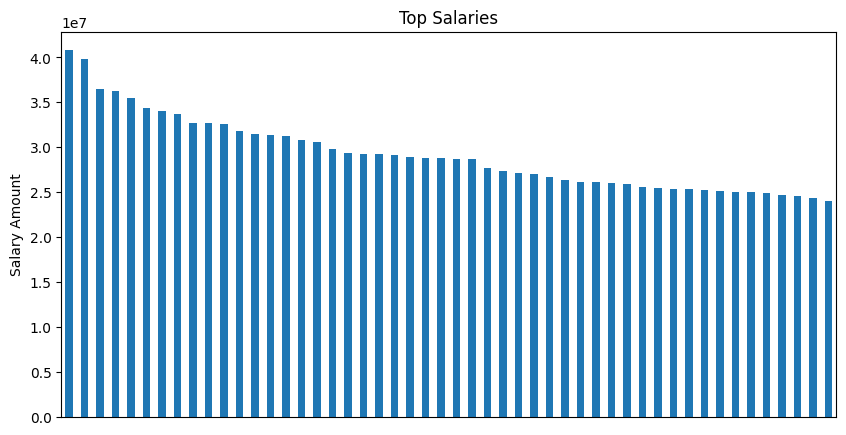

In [ ]:
top_salaries = df['salary'].sort_values(ascending=False).head(50)

# Plot the top 10 salaries
plt.figure(figsize=(10, 5))
top_salaries.plot(kind='bar')
plt.title('Top Salaries')
plt.ylabel('Salary Amount')
plt.xticks([])
plt.show()

In [ ]:
df['salary'] = df['salary'].apply(lambda x: int(round(x)) if isinstance(x, float) else int(x))
df['salary'].head(15)

0       11163
1       13052
2        8136
3       11517
4       23675
5       15415
6       10282
7       14993
8        7063
9       11576
10      13250
11      10093
12      18215
13    5016492
14      23199
Name: salary, dtype: int64

In [ ]:
df['salary'].max()

40821269

We find as a problem that we have absolutely high values for a salary and that they contain too much decimals. That is why first of all, we round the values so they contain no decimals.

In [ ]:
threshold= 2000000

df['salary'] = df['salary'].apply(lambda x: np.nan if x > threshold else x)
df['salary'].isnull().sum()

448

We set a threshold of 2000000 considering that the maximum salary an employee could get. We drop all the values above the threshold and replace them with random values among the distribution.

In [ ]:
non_null_salaries = df['salary'].dropna().values

def replace_random(salary):
    if np.isnan(salary):
        return np.random.choice(non_null_salaries)
    return salary

df['salary'] = df['salary'].apply(replace_random)
df['salary'].isnull().sum()

0

In [ ]:
df['salary'] = df['salary'].astype(int)
df['salary'].max()

1901231

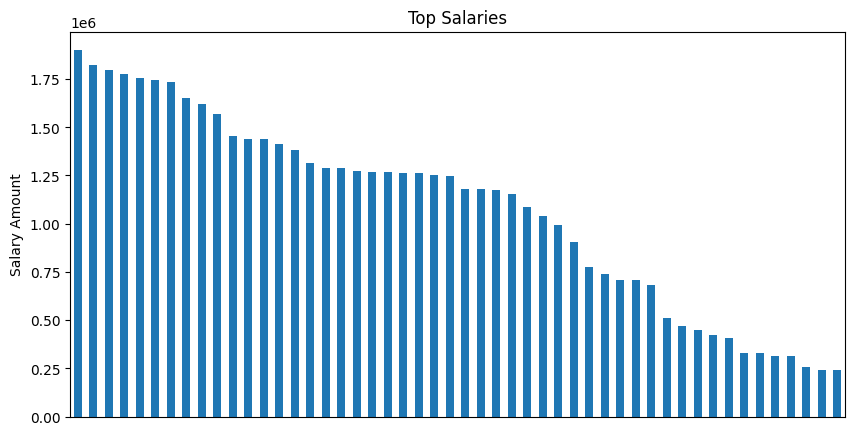

In [ ]:
top_salaries = df['salary'].sort_values(ascending=False).head(50)

plt.figure(figsize=(10, 5))
top_salaries.plot(kind='bar')
plt.title('Top Salaries')
plt.ylabel('Salary Amount')
plt.xticks([])
plt.show()

### First Salary

In [ ]:
df['first_salary']

0       1.820000e+03
1       1.363000e+04
2       9.705000e+03
3       1.553000e+03
4       8.962000e+03
            ...     
9995    5.068000e+03
9996    1.883200e+04
9997    4.104000e+03
9998   -1.108934e+06
9999    8.140000e+03
Name: first_salary, Length: 10000, dtype: float64

In [ ]:
df['first_salary'].value_counts()

first_salary
 5.112000e+03    5
 1.994300e+04    5
 1.761800e+04    4
 1.259400e+04    4
 1.976000e+04    4
                ..
 8.004000e+03    1
 8.087000e+03    1
 1.339400e+04    1
 5.789000e+03    1
-1.108934e+06    1
Name: count, Length: 8106, dtype: int64

In [ ]:
df['first_salary'].describe()

count    1.000000e+04
mean    -7.024942e+05
std      3.841482e+06
min     -5.841357e+07
25%      4.060250e+03
50%      9.280500e+03
75%      1.474250e+04
max      2.000000e+04
Name: first_salary, dtype: float64

For the column of First salary we identify that there are many negative values, which is not logical. So following the same process as before, we drop those values and replace them by random values among the distribution.

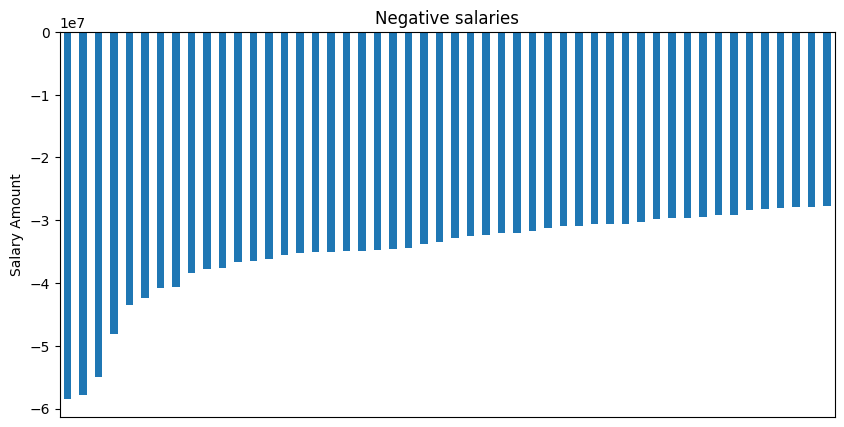

In [ ]:
salaries = df['first_salary'].sort_values(ascending=True).head(50)

plt.figure(figsize=(10, 5))
salaries.plot(kind='bar')
plt.title('Negative salaries')
plt.ylabel('Salary Amount')
plt.xticks([])
plt.show()

In [ ]:
threshold= 0

df['first_salary'] = df['first_salary'].apply(lambda x: np.nan if x < threshold else x)
df['first_salary'].isnull().sum()

519

In [ ]:
non_null_salaries = df['first_salary'].dropna().values

def replace_random(salary):
    if np.isnan(salary):
        return np.random.choice(non_null_salaries)
    return salary

df['first_salary'] = df['first_salary'].apply(replace_random)
df['first_salary'].isnull().sum()

0

In [ ]:
df['first_salary']= df['first_salary'].astype(int)
df['first_salary'].value_counts()

first_salary
10665    7
3203     6
19943    6
12530    6
19760    5
        ..
9575     1
95       1
7372     1
7611     1
18832    1
Name: count, Length: 7587, dtype: int64

In [ ]:
df['first_salary']

0        1820
1       13630
2        9705
3        1553
4        8962
        ...  
9995     5068
9996    18832
9997     4104
9998     7116
9999     8140
Name: first_salary, Length: 10000, dtype: int64

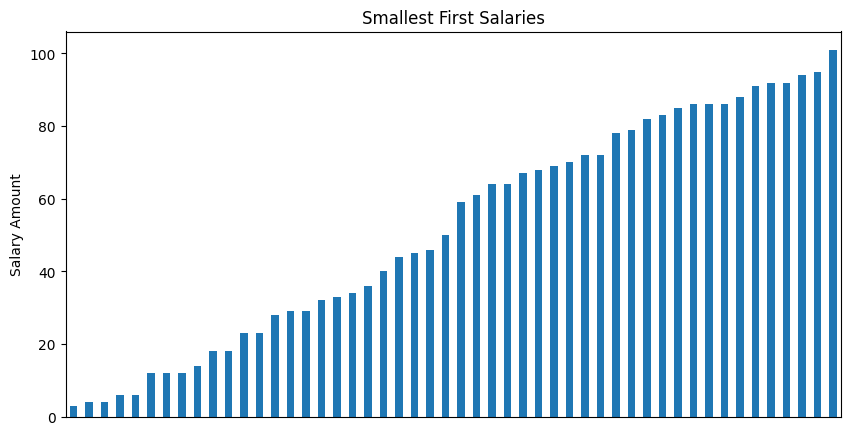

In [ ]:
salaries = df['first_salary'].sort_values(ascending=True).head(50)

plt.figure(figsize=(10, 5))
salaries.plot(kind='bar')
plt.title('Smallest First Salaries')
plt.ylabel('Salary Amount')
plt.xticks([])
plt.show()

### Taxable income

In [ ]:
df['taxable_income']

0       13028
1        8154
2        7693
3       12621
4       20279
        ...  
9995    19133
9996     7308
9997    18039
9998    14313
9999     3122
Name: taxable_income, Length: 10000, dtype: int64

In [ ]:
print(df['taxable_income'].describe())
print(df['taxable_income'].min())

count    10000.000000
mean     11802.781900
std       7987.598194
min     -22967.000000
25%       7313.000000
50%      12602.500000
75%      17775.500000
max      22996.000000
Name: taxable_income, dtype: float64
-22967


As we can see we have negative values but it seems to be a computation error as the values seem logic, just they have the negative sign so we simply remove it.

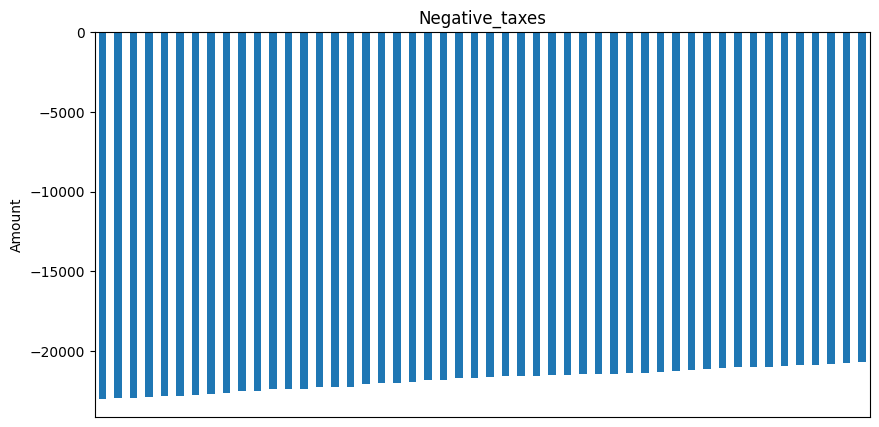

In [ ]:
taxes= df['taxable_income'].sort_values(ascending=True).head(50)

plt.figure(figsize=(10, 5))
taxes.plot(kind='bar')
plt.title('Negative_taxes')
plt.ylabel('Amount')
plt.xticks([])
plt.show()

In [ ]:
df['taxable_income'] = df['taxable_income'].apply(lambda x: abs(x) if x < 0 else x)
print(df['taxable_income'].describe())
print(df['taxable_income'].min())

count    10000.000000
mean     13028.732100
std       5775.506976
min       3000.000000
25%       8034.000000
50%      13053.500000
75%      18031.250000
max      22996.000000
Name: taxable_income, dtype: float64
3000


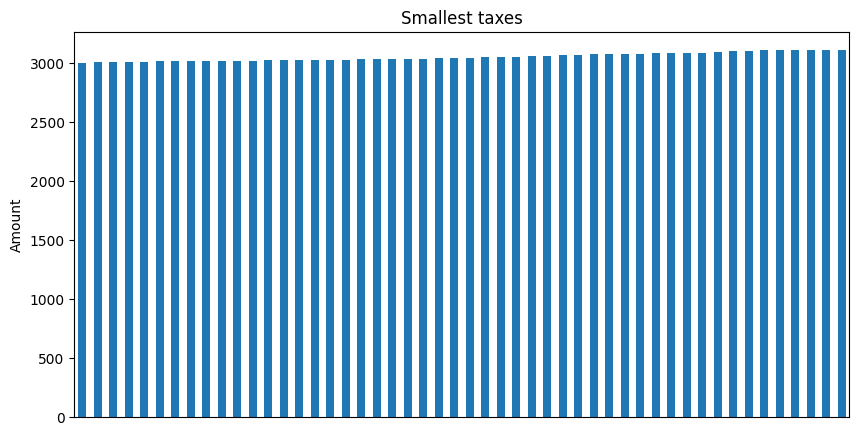

In [ ]:
taxes_corrected= df['taxable_income'].sort_values(ascending=True).head(50)

plt.figure(figsize=(10, 5))
taxes_corrected.plot(kind='bar')
plt.title('Smallest taxes')
plt.ylabel('Amount')
plt.xticks([])
plt.show()

### Extra cleaning

We need to make sure that the values follow a logical order. This means salary >= first salary and taxable income < salary.

First we fix for salary and first salary

In [ ]:
df['salary_check'] = df['salary'] >= df['first_salary']
df['salary_check'].value_counts()

salary_check
True     7125
False    2875
Name: count, dtype: int64

In [ ]:
df['salary'] = df.apply(lambda row: max(row['salary'], row['first_salary']), axis=1)


In [ ]:
mask = df['salary'] < df['first_salary']

df.loc[mask, 'salary'] >= df.loc[mask, 'first_salary']
df['salary_check'] = df['salary'] >= df['first_salary']
df['salary_check'].value_counts()

salary_check
True    10000
Name: count, dtype: int64

In [ ]:
df.drop(columns= ['salary_check'],inplace= True)
print(df[['salary','first_salary']])

      salary  first_salary
0      11163          1820
1      13630         13630
2       9705          9705
3      11517          1553
4      23675          8962
...      ...           ...
9995   18669          5068
9996   18832         18832
9997    7729          4104
9998    7635          7116
9999    8587          8140

[10000 rows x 2 columns]


Now we make sure tax income < salary. We will asume that income tax is 20% of the salary

In [ ]:
df['taxable_income'] = df['salary'] * 0.20
df['taxable_income_check'] = df['taxable_income'] == df['salary'] * 0.20
df['taxable_income_check'].value_counts()
df.drop(columns=['taxable_income_check'],inplace = True)

In [ ]:
print(df[['salary','taxable_income']])

      salary  taxable_income
0      11163          2232.6
1      13630          2726.0
2       9705          1941.0
3      11517          2303.4
4      23675          4735.0
...      ...             ...
9995   18669          3733.8
9996   18832          3766.4
9997    7729          1545.8
9998    7635          1527.0
9999    8587          1717.4

[10000 rows x 2 columns]


### Transaction amount

In [ ]:
print(df['transaction_amount'])
print(df['transaction_amount'].value_counts().head(10))

0       1297.000
1        116.000
2        874.000
3       1316.000
4        275.000
          ...   
9995    1328.992
9996     530.000
9997     861.000
9998    1531.000
9999    1332.000
Name: transaction_amount, Length: 10000, dtype: float64
transaction_amount
1441.0    14
65.0      14
1617.0    13
701.0     13
1690.0    13
958.0     13
317.0     13
1284.0    13
309.0     12
151.0     12
Name: count, dtype: int64


We can see there are some values in decimal format while the others are integers so we want all the values to be integers.

In [ ]:
df['transaction_amount'] = df['transaction_amount'].round().astype(int)
df['transaction_amount']

0       1297
1        116
2        874
3       1316
4        275
        ... 
9995    1329
9996     530
9997     861
9998    1531
9999    1332
Name: transaction_amount, Length: 10000, dtype: int64

In [ ]:
df['transaction_amount'].value_counts()

transaction_amount
180     14
65      14
1617    14
1441    14
1690    14
        ..
327      1
129      1
683      1
669      1
945      1
Name: count, Length: 1792, dtype: int64

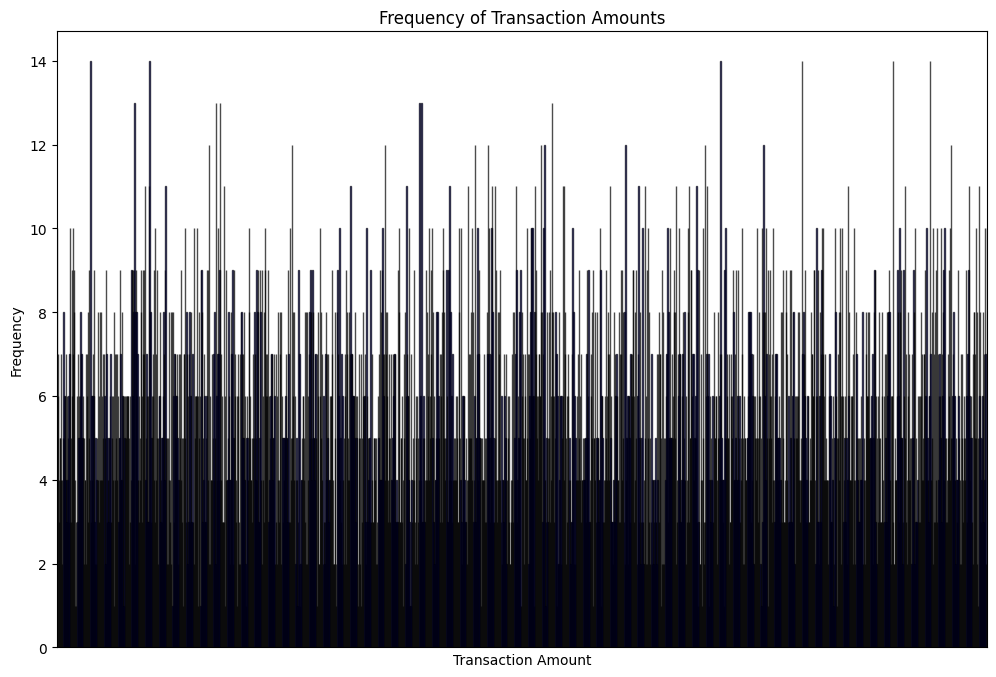

In [ ]:
transaction_amount_counts = df['transaction_amount'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
transaction_amount_counts.plot(kind='bar', color='blue', edgecolor='black', alpha=0.7)
plt.title('Frequency of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xticks([])
plt.show()

### Bank Balance

In [ ]:
df['bank_balance']

0        630
1       1011
2       1887
3       2488
4       2057
        ... 
9995    1011
9996    2303
9997     927
9998    2141
9999     981
Name: bank_balance, Length: 10000, dtype: int64

In [ ]:
df['bank_balance'].describe()

count    10000.000000
mean      1502.881700
std        579.866671
min        500.000000
25%       1006.750000
50%       1501.500000
75%       2004.000000
max       2500.000000
Name: bank_balance, dtype: float64

In [ ]:
# number of null entries in the bank_balance column
print("Number of null entries in bank_balance:", df['bank_balance'].isnull().sum())

Number of null entries in bank_balance: 0


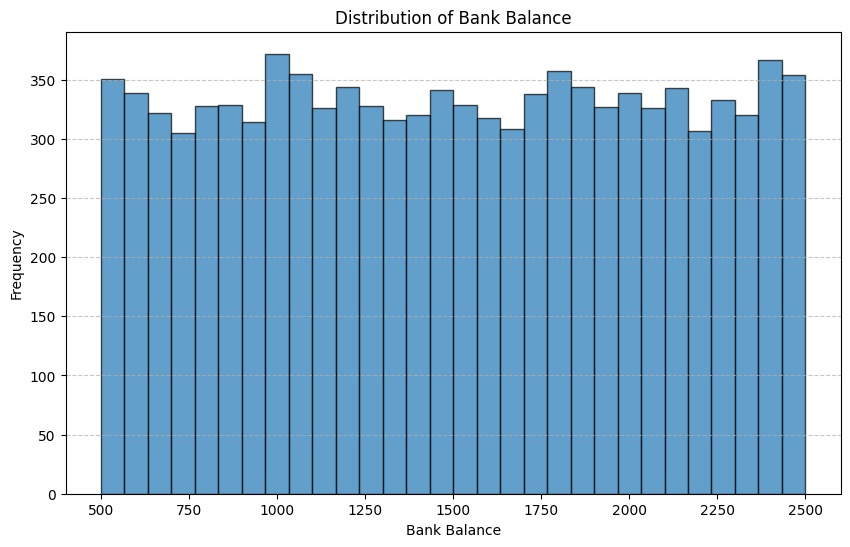

In [ ]:
# Plotting the bank_balance column
plt.figure(figsize=(10, 6))
plt.hist(df['bank_balance'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Bank Balance')
plt.xlabel('Bank Balance')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Credit Card Number

In [ ]:
df['credit_card_number']

0        354535427535588
1       4826461394978762
2       7651412151058127
3       5245802625889845
4       1135868397454618
              ...       
9995    7129779704062240
9996    9920183634907169
9997    2832658541229870
9998    2222614262161015
9999    3946916803829455
Name: credit_card_number, Length: 10000, dtype: int64

We see that not all the credit card numbers have the same lenght as it is shown on the plot.

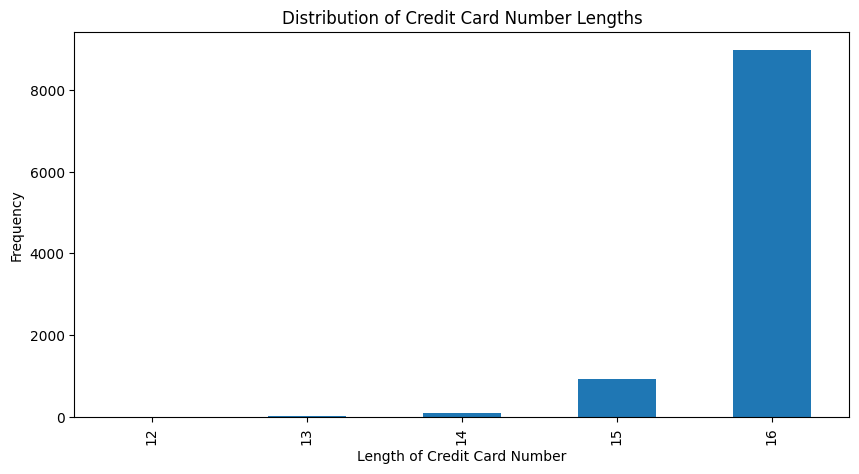

In [ ]:
df['credit_card_length'] = df['credit_card_number'].astype(str).apply(len)

length_counts = df['credit_card_length'].value_counts()

plt.figure(figsize=(10, 5))
length_counts.sort_index().plot(kind='bar')
plt.title('Distribution of Credit Card Number Lengths')
plt.xlabel('Length of Credit Card Number')
plt.ylabel('Frequency')
plt.show()

We want to set all the credit card numbers to have a length of 16 numbers.

In [ ]:
df['credit_card_number'] = df['credit_card_number'].astype(str)

def fix_credit_card_length(cc_number):
    match = re.fullmatch(r'\d{1,16}', cc_number)
    if match:
        return cc_number.zfill(16)
    else:
        return cc_number[:16]


df['credit_card_number'] = df['credit_card_number'].apply(fix_credit_card_length)


In [ ]:
df['credit_card_number']

0       0354535427535588
1       4826461394978762
2       7651412151058127
3       5245802625889845
4       1135868397454618
              ...       
9995    7129779704062240
9996    9920183634907169
9997    2832658541229870
9998    2222614262161015
9999    3946916803829455
Name: credit_card_number, Length: 10000, dtype: object

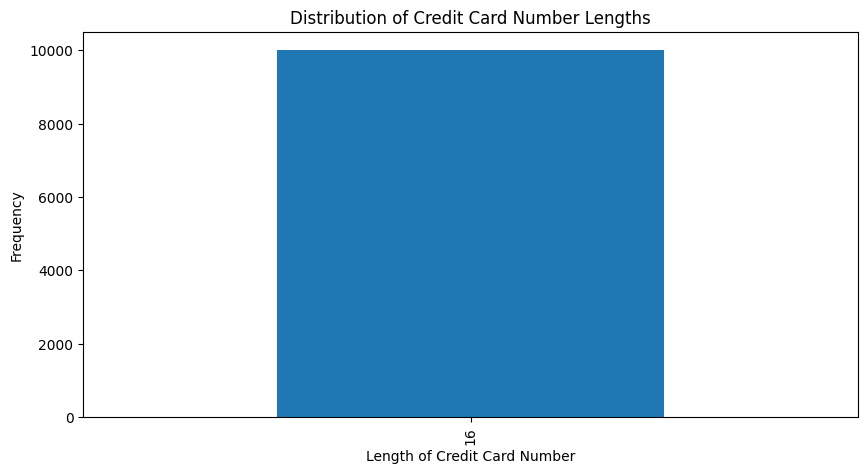

In [ ]:
df['credit_card_length'] = df['credit_card_number'].apply(len)
length_verification = df['credit_card_length'].value_counts()

plt.figure(figsize=(10, 5))
length_verification.sort_index().plot(kind='bar')
plt.title('Distribution of Credit Card Number Lengths')
plt.xlabel('Length of Credit Card Number')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.drop(columns=['credit_card_length'], inplace =True)

### Credit Card Score (hardest)

In [ ]:
df['credit_card_score']

0       31.044150
1       63.742594
2       61.257258
3       54.486978
4       57.887227
          ...    
9995    47.626975
9996    48.278302
9997    68.671820
9998    68.279772
9999    60.772270
Name: credit_card_score, Length: 10000, dtype: float64

In [ ]:
df['credit_card_score'].describe()

count    10000.000000
mean        47.638042
std         18.611491
min          0.000000
25%         36.955105
50%         48.914849
75%         60.206651
max        100.000000
Name: credit_card_score, dtype: float64

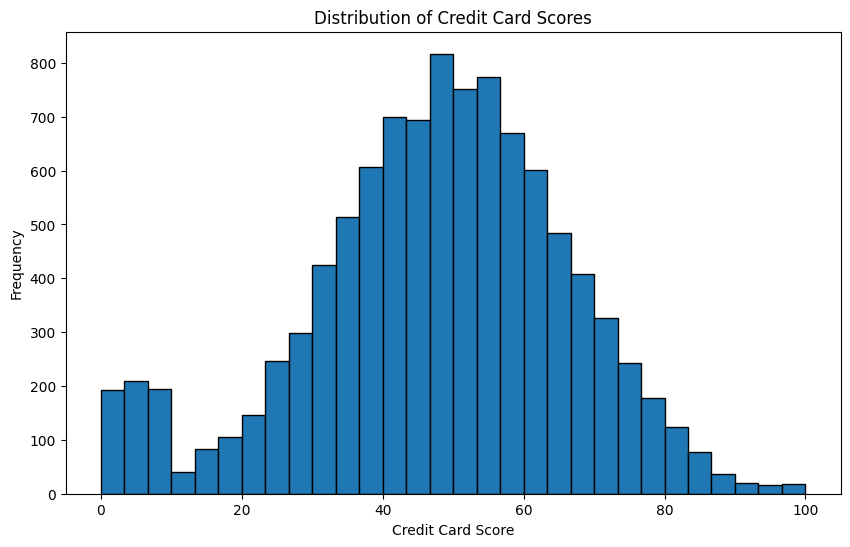

In [ ]:
# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['credit_card_score'], bins=30, edgecolor='black')
plt.title('Distribution of Credit Card Scores')
plt.xlabel('Credit Card Score')
plt.ylabel('Frequency')
plt.show()

## Height, weight and shoe_size

In [ ]:
df[['weight', 'height','shoe_size']].describe()

weight        height     shoe_size
count  10000.000000  10000.000000  10000.000000
mean      66.497706    178.488517     41.988899
std       15.928098     38.569704      1.923071
min        0.011886    132.694728     33.373966
25%       65.907179    163.796345     40.732380
50%       69.665681    170.719064     42.000000
75%       73.176805    178.084633     43.239445
max       88.274626    412.660209     50.502759

In [ ]:
#Shoe_size should be 39.0 or 39.5 not 39.65799...
df['shoe_size'].head()

0    38.045648
1    40.317666
2    39.872489
3    42.968253
4    42.000000
Name: shoe_size, dtype: float64

As we can see, we have strange values for shoe_size. A normal value will be a number having .0 or .5 as a decimal.

In [ ]:
def round_to_nearest_half(size):
    return round(size * 2) / 2

df['shoe_size'] = df['shoe_size'].apply(round_to_nearest_half)
print(df['shoe_size'].value_counts().head())

shoe_size
42.0    1437
42.5     957
41.0     896
41.5     895
43.0     811
Name: count, dtype: int64


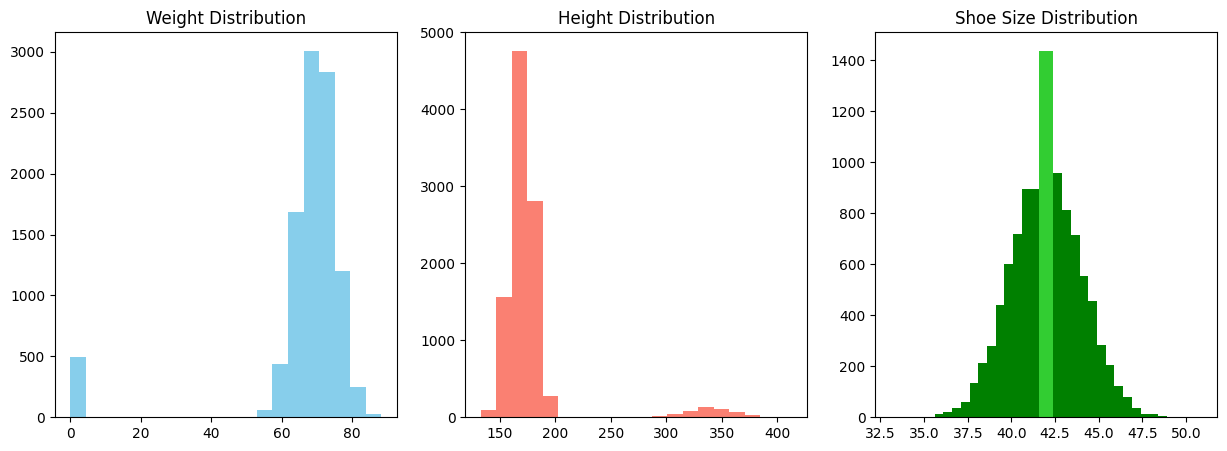

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot distribution of 'weight'
axs[0].hist(df['weight'], bins=20, color='skyblue')
axs[0].set_title('Weight Distribution')

# Plot distribution of 'height'
axs[1].hist(df['height'], bins=20, color='salmon')
axs[1].set_title('Height Distribution')

# Plot distribution of 'shoe_size' and highlight problematic bins

unique_sizes, counts = np.unique(df['shoe_size'], return_counts=True)
#one bar per value, to avoid any misleading plot
axs[2].bar(unique_sizes, counts, color='green')
axs[2].set_title('Shoe Size Distribution')

# Highlight the desired bin(s)
for size, count in zip(unique_sizes, counts):
    if count > 1000:
        axs[2].bar(size, count, color='#32CD32')

plt.show()

**Weight**: in the graph, we have a group of outlier with abnormal wieght (less than 1kg if you look the values into detail)\
**Height**: Some humains appears to be taller than 250 cm. It is of course not valid values.\
**Shoe_size**: We have a value which is overpresent (in lightgreen). It would be better to redistribute a part of it among the rest.

Let's use a function to redistribute our outliers according to the distribution of our data (without the outliers of course).

In [ ]:
def distribution_of_outliers(df, column, outliers):
    non_outliers = df[~df[column].isin(outliers)][column]
    data_mean = non_outliers.mean()
    data_std = non_outliers.std()

    random_values = np.random.normal(loc=data_mean, scale=data_std, size=len(outliers))

    for i, outlier in enumerate(outliers):
        df.loc[df[column] == outlier, column] = random_values[i]

In [ ]:
outlier_weight = df[df['weight'] < 40]
outlier_weight['weight'].head(3)

12    0.015632
15    0.013342
42    0.012485
Name: weight, dtype: float64

In [ ]:
outlier_weight = df[df['weight'] < 40]['weight'].tolist()
distribution_of_outliers(df, 'weight', outlier_weight)

In [ ]:
outlier_height = df[df['height'] > 250]
outlier_height['height'].head(3)

13     321.457449
73     335.521668
118    308.524975
Name: height, dtype: float64

In [ ]:
outlier_height = df[df['height'] > 250]['height'].tolist()
distribution_of_outliers(df, 'height', outlier_height)

For some unknown reasons, distribution_of_outliers wasn't giving result for shoe_size so we've decided to set the outliers to null and then, distribute the null value. *This choice was made because we were using the distribute_null_values later in this project*.

In [ ]:
def set_some_values_to_null(df, column, value, fraction):
    indices_to_null = np.random.choice(df.index[df[column] == value], size=int(len(df[df[column] == value]) * fraction), replace=False)
    df.loc[indices_to_null, column] = np.nan

In [ ]:
def distribute_null_values(df, column):
    non_null_values = df[column].dropna()
    null_count = df[column].isnull().sum()
    data_mean = non_null_values.mean()
    data_std = non_null_values.std()

    replacement_values = np.random.normal(loc=data_mean, scale=data_std, size=null_count)

    df.loc[df[column].isnull(), column] = replacement_values

In [ ]:
most_frequent_shoe_size = df['shoe_size'].mode().iloc[0]
print("Most frequent shoe size:", most_frequent_shoe_size)

set_some_values_to_null(df, 'shoe_size', most_frequent_shoe_size, 0.3)
distribute_null_values(df, 'shoe_size')

    # Reapply rounding to the nearest .0 or .5
df['shoe_size'] = df['shoe_size'].apply(round_to_nearest_half)

Most frequent shoe size: 42.0


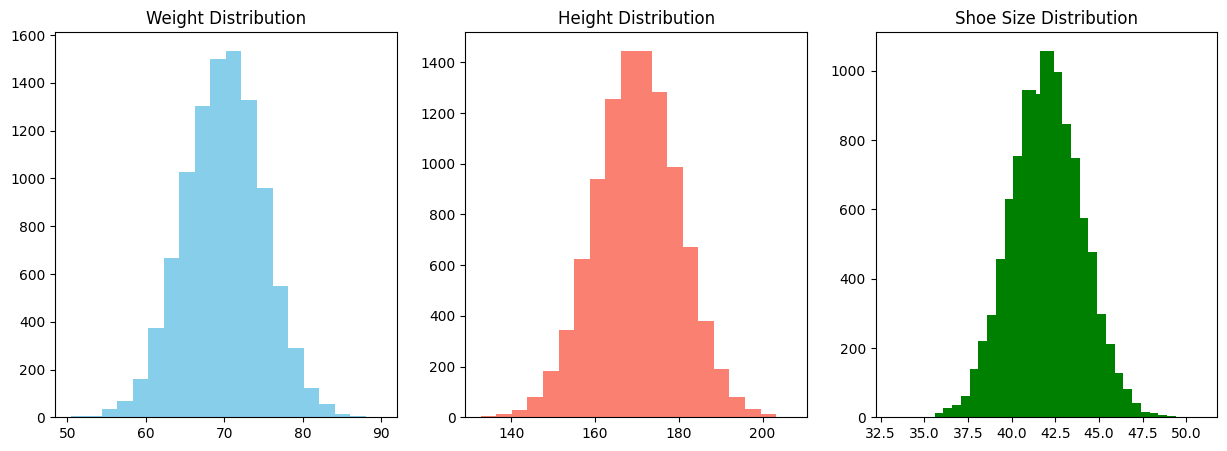

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot distribution of 'weight'
axs[0].hist(df['weight'], bins=20, color='skyblue')
axs[0].set_title('Weight Distribution')

# Plot distribution of 'height'
axs[1].hist(df['height'], bins=20, color='salmon')
axs[1].set_title('Height Distribution')

# Plot distribution of 'shoe_size'
unique_sizes, counts = np.unique(df['shoe_size'], return_counts=True)
axs[2].bar(unique_sizes, counts, color='green')
axs[2].set_title('Shoe Size Distribution')

plt.show()

We have some nice distribution here 👍

## 'Customer' columns

'customer_uid', 'customer_segment_code',
 'customer_market_code' ,'customer_fico_score'

### Customer code

In [ ]:
df['customer_code'].describe()

count    9490.0
mean       27.0
std         0.0
min        27.0
25%        27.0
50%        27.0
75%        27.0
max        27.0
Name: customer_code, dtype: float64

In [ ]:
df['customer_code'].isnull().sum()

510

For the customer column code, the value is alway the same. The only problem for this column is that we have some missing value. Let's fill it by putting the same as every other line.

In [ ]:
df['customer_code'].fillna(27.0, inplace=True)

### Customer uid

In [ ]:
df['customer_uid'].describe()

count                                                 10000
unique                                                10000
top       613651c1554848e2782874f6c5c3cb52a61b6039985e2d...
freq                                                      1
Name: customer_uid, dtype: object

From .describe() we don't get any "obvious" error, every uid being unique.

In [ ]:
#Testing if the error could be that some uid contains incorrect characters

num_incorrect = sum(~df['customer_uid'].str.match('^[a-z0-9]+$'))
print('Number of incorrect customer_uids:', num_incorrect)

Number of incorrect customer_uids: 0


No uid contains incorrect characters. Let's take a look at their lenght:

In [ ]:
uid_lengths = df['customer_uid'].str.len()
print(uid_lengths.describe())

count    10000.000000
mean        63.952200
std          0.213353
min         63.000000
25%         64.000000
50%         64.000000
75%         64.000000
max         64.000000
Name: customer_uid, dtype: float64


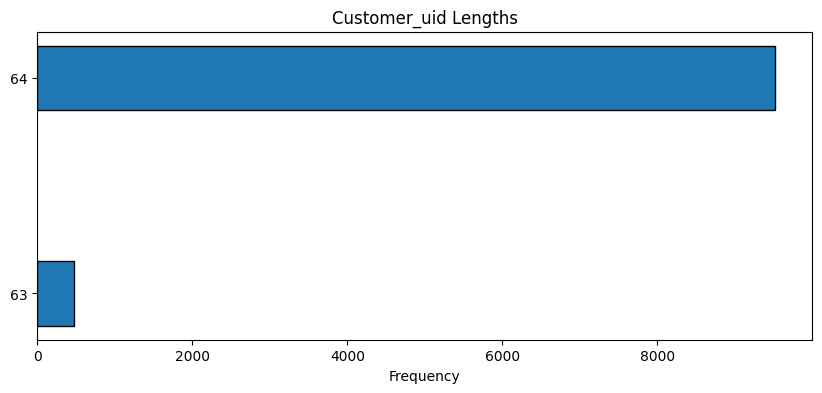

In [ ]:
length_counts = uid_lengths.value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 4))
plt.barh(length_counts.index, length_counts.values, height=0.3, edgecolor='black')
plt.title('Customer_uid Lengths')
plt.xlabel('Frequency')

# Ensure y-axis ticks are integers
plt.yticks(length_counts.index)

# Show the plot
plt.show()

From the previous graph, it appears that some uid have a shorter lenght (63 instead of 64). Here is our error.\
Let's add a random character (among the valid ones) at the end of the shorter ones.

In [ ]:
shorter_uid = df[df['customer_uid'].str.len() < 64]['customer_uid'].value_counts()
print(shorter_uid)

customer_uid
71f2398e3e551b2dd7eba7a4e335c9e6c6eeb07bdc121b792b2c40701599cf2    1
faea159b4b07590f7367dbde9988b7da5ddd3d12bc962e92b71944e9087bac8    1
7a30a2ed069f3f1eabc860c4b760c7f8a005339272679124ee89d01b3b56a56    1
41b46afbc87782d77f9863a02b4271a56f985cecb1ce3df6e007648804e30f9    1
8d51465d0a1df50746e477b99fbe8b47bb1a59eb30baf4270ab4fb1d4728dc5    1
                                                                  ..
82ea5f865b7b55c538bdea1d7fb8de1fec0b450294bf19f440dae5abbb96130    1
573a4f1e63dcf22005440cefd5a9b4777bd6643cca89ef215741157124420e5    1
50276031bf8567da07864a9052c805d42e4278e3549871646457f6c616e0ecf    1
74346a385f7e47a21caf4f611dfa8e9407122108bc9e102d4a0354554029c19    1
f578a281725924fe50c820cf6d1e01352581915a46ad69e2e59e4fc54f952d5    1
Name: count, Length: 478, dtype: int64


In [ ]:
# To generate a random character (lowercase letter or number)
def random_char():
    return random.choice(string.ascii_lowercase + string.digits)

# Add it to the end of each short 'customer_uid'
df['customer_uid'] = df.apply(lambda row: row['customer_uid'] + random_char(
    ) if len(row['customer_uid']) < 64 else row['customer_uid'], axis=1)

### Customer segment code & Customer fico score

In [ ]:
df[['customer_segment_code', 'customer_fico_score']].describe()

customer_segment_code  customer_fico_score
count            8985.000000          8598.000000
mean               14.855648            18.714352
std                 5.769463             1.140397
min                 5.000000            16.000000
25%                10.000000            18.000000
50%                15.000000            19.000000
75%                20.000000            20.000000
max                25.000000            20.000000

In [ ]:
print('Customer segment code has',df['customer_segment_code'].isna().sum(), 'null values')
print('Customer Fico score has',df['customer_fico_score'].isna().sum(), 'null values')

Customer segment code has 1015 null values
Customer Fico score has 1402 null values


In [ ]:
fico_score = df['customer_fico_score'].value_counts()
null_fico_score = df['customer_fico_score'].isnull().sum()
fico_score = pd.concat([fico_score, pd.Series([null_fico_score], index=['Null'])])

segment_code = df['customer_segment_code'].value_counts()
null_segment_code = df['customer_segment_code'].isnull().sum()
segment_code = pd.concat([segment_code, pd.Series([null_segment_code], index=['Null'])])

In [ ]:
fico_score.index = fico_score.index.astype(str)
segment_code.index = segment_code.index.astype(str)

#I'm adding this otherwise i have errors when plotting

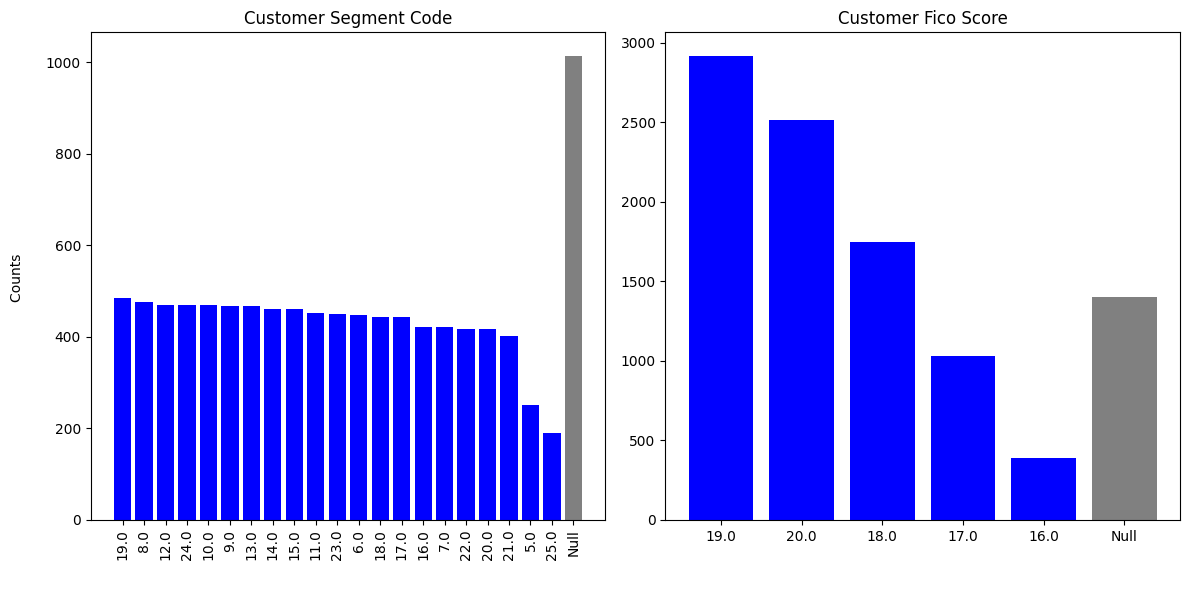

In [ ]:
#make it a double plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for customer_fico_score
axs[1].bar(fico_score.index, fico_score.values, color=['blue' if x != 'Null' else 'grey' for x in fico_score.index])
axs[1].set_title('Customer Fico Score')
axs[1].set_xlabel(' ')

# Plot for customer_segment_code
axs[0].bar(segment_code.index, segment_code.values, color=['blue' if x != 'Null' else 'grey' for x in segment_code.index])
axs[0].set_title('Customer Segment Code')
axs[0].set_xlabel(' ')
axs[0].set_ylabel('Counts \n  ')
axs[0].tick_params(axis='x', rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

From this vizualisation, we believe that the problem of these columns lies in the fact that there is null values. Let's use the function used for shoe_size here:

In [ ]:
distribute_null_values(df, 'customer_segment_code')
distribute_null_values(df, 'customer_fico_score')

In [ ]:
print('There is',df['customer_segment_code'].isna().sum(), 'null values remaining in customer segment code')
print('and',df['customer_fico_score'].isna().sum(), 'remaining in customer fico score')

There is 0 null values remaining in customer segment code
and 0 remaining in customer fico score


### Customer market code

In [ ]:
df['customer_market_code'].value_counts()

customer_market_code
0.0         8
2.0         5
306232.0    4
15.0        4
700577.0    4
           ..
249627.0    1
322580.0    1
168545.0    1
4793.0      1
709288.0    1
Name: count, Length: 7136, dtype: int64

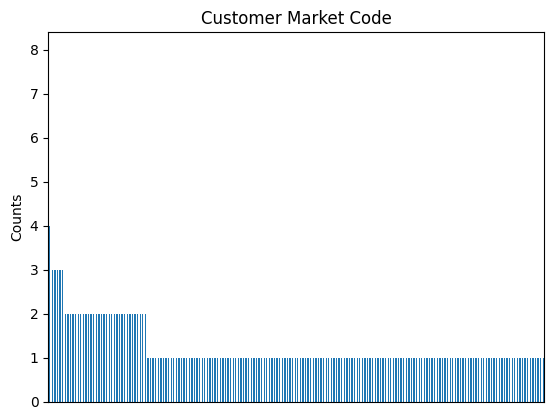

In [ ]:
market_code = df['customer_market_code'].value_counts()

market_code.plot(kind='bar')
plt.title('Customer Market Code')
plt.xlabel('')
plt.ylabel('Counts')
plt.xticks([])  # Remove x-axis labels
plt.show()

From the plot, we can guess that this number is supposed to be individual. Therefore some customer seems to be sharing one; for this column the problem is that some customer code have been replaced by wrong one, already attributed to someone else.

In [ ]:
len(df['customer_market_code'].value_counts()[df['customer_market_code'].value_counts() > 1])

1414

First of all, I want to make sure that a duplicate customer_market_code doesn't mean a duplicated row:

In [ ]:
# 1. Check if customer_market_code, firstname, lastname, and firstname_mother are the same
duplicates = df[df.duplicated(subset=['customer_market_code', 'firstname', 'lastname', 'firstname_mother'], keep=False)]

# Sort them according to lastname
duplicates_sorted = duplicates.sort_values(by='lastname')
print("Potential duplicates:")
print(duplicates_sorted)

Potential duplicates:
Empty DataFrame
Columns: [prefix, lastname, firstname, firstname_mother, firstname_father, description, inquiry, Date_of_Birth, account_creation_date, last_transaction_date, account_resiliation_date, first_contact_date, last_contact_date, latlon_home, latlon_work, x35_bank_branch, email_work, email_personnal, email_sso, email_vpn, xml_authent_token, profile_json, cia_info_json, salary, first_salary, taxable_income, transaction_amount, credit_card_score, credit_card_number, weight, height, shoe_size, bank_balance, address, city, zip, country, customer_code, customer_uid, android_platform, user_agent, customer_segment_code, customer_market_code, customer_fico_score]
Index: []

[0 rows x 44 columns]


It is not the case, so we can solve our problem as follow:

In [ ]:
# Function to remove duplicates and assign new unique numbers
def remove_duplicates_and_assign_new(df, column):
    # Ensure the column is treated as numeric and drop NaNs
    df[column] = pd.to_numeric(df[column], errors='coerce')
    existing_codes = set(df[column].dropna().astype(int))

    # Identify the minimum and maximum existing codes
    min_code = min(existing_codes)
    max_code = max(existing_codes)

    # Generate a set of potential new codes starting from max_code + 1
    potential_new_codes = set(range(max_code + 1, max_code + 1 + len(df)))

    # Get the set of available new codes by removing existing codes from potential new codes
    available_codes = sorted(potential_new_codes - existing_codes)

    # Identify duplicates, keeping the first occurrence
    duplicates = df.duplicated(subset=column, keep='first')

    # Assign new unique numbers to the duplicates
    new_code_index = 0
    for idx in df[duplicates].index:
        df.at[idx, column] = available_codes[new_code_index]
        new_code_index += 1

    # Fill any remaining NaN values with new unique codes
    if df[column].isna().any():
        remaining_na_indices = df[df[column].isna()].index
        for idx in remaining_na_indices:
            df.at[idx, column] = available_codes[new_code_index]
            new_code_index += 1

    return df

In [ ]:
# Apply the function to remove duplicates and assign new unique numbers
df = remove_duplicates_and_assign_new(df, 'customer_market_code')

# Convert 'customer_market_code' to int
df['customer_market_code'] = df['customer_market_code'].astype(int)

In [ ]:
len(df['customer_market_code'].value_counts()[df['customer_market_code'].value_counts() > 1])

0

In [ ]:
df['customer_market_code'].isna().sum()

0

Now, every customer possess its own unique customer market code.

## Latitude - Longitude

According to google :
- Latitude ranges from -90 to 90 degrees.
- Longitude ranges from -180 to 180 degrees.

### x35 Bank Branch (hardest)

In [ ]:
df['x35_bank_branch']

0        (Decimal('-32.6879485'), Decimal('64.934060'))
1        (Decimal('21.097055'), Decimal('-109.650350'))
2        (Decimal('56.8505205'), Decimal('-15.902753'))
3        (Decimal('-81.1532545'), Decimal('55.965171'))
4        (Decimal('11.7645145'), Decimal('-70.892888'))
                             ...                       
9995    (Decimal('-71.921573'), Decimal('-151.441366'))
9996       (Decimal('0.4036975'), Decimal('-4.263743'))
9997    (Decimal('-35.999938'), Decimal('-102.824401'))
9998     (Decimal('-68.5174435'), Decimal('97.710795'))
9999       (Decimal('67.989459'), Decimal('17.945528'))
Name: x35_bank_branch, Length: 10000, dtype: object

In [ ]:
df['x35_bank_branch'].describe()

count                                              10000
unique                                             10000
top       (Decimal('-32.6879485'), Decimal('64.934060'))
freq                                                   1
Name: x35_bank_branch, dtype: object

### Latlon home

In [ ]:
df['latlon_home']

0                                               (90, 0)
1          (Decimal('15.566937'), Decimal('72.565002'))
2        (Decimal('58.3661945'), Decimal('-88.241045'))
3        (Decimal('33.9129505'), Decimal('-25.988090'))
4         (Decimal('53.3907535'), Decimal('37.788254'))
                             ...                       
9995        (Decimal('9.3259885'), Decimal('8.405164'))
9996    (Decimal('-69.3195285'), Decimal('144.856086'))
9997    (Decimal('49.6393335'), Decimal('-107.303725'))
9998       (Decimal('59.711887'), Decimal('44.386039'))
9999                                            (90, 0)
Name: latlon_home, Length: 10000, dtype: object

In [ ]:
df['latlon_home'].value_counts()

latlon_home
(90, 0)                                             503
(Decimal('-6.696477'), Decimal('-142.427770'))        1
(Decimal('-79.3917375'), Decimal('50.207702'))        1
(Decimal('-36.163970'), Decimal('112.799459'))        1
(Decimal('-45.3750475'), Decimal('-168.825660'))      1
                                                   ... 
(Decimal('29.732654'), Decimal('111.910990'))         1
(Decimal('-32.937910'), Decimal('-18.687693'))        1
(Decimal('-25.558964'), Decimal('50.376353'))         1
(Decimal('38.4800515'), Decimal('45.896759'))         1
(Decimal('59.711887'), Decimal('44.386039'))          1
Name: count, Length: 9498, dtype: int64

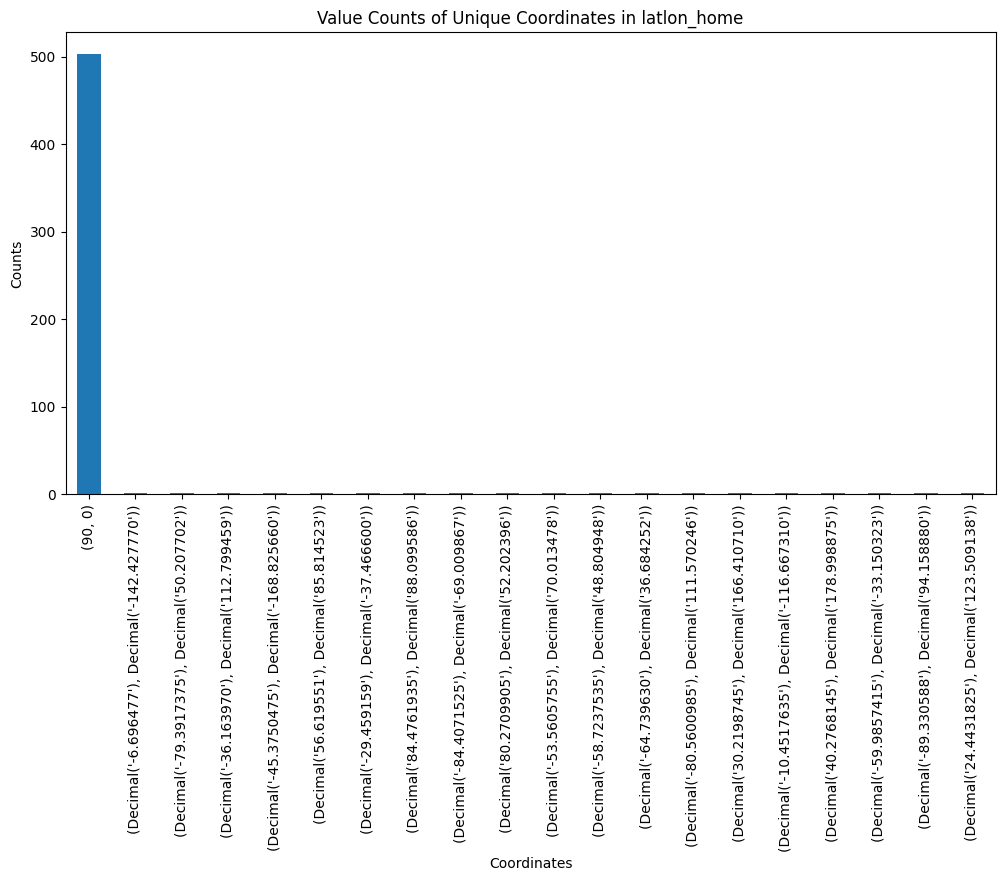

In [ ]:
value_counts = df['latlon_home'].value_counts().head(20)

plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of Unique Coordinates in latlon_home')
plt.xlabel('Coordinates')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

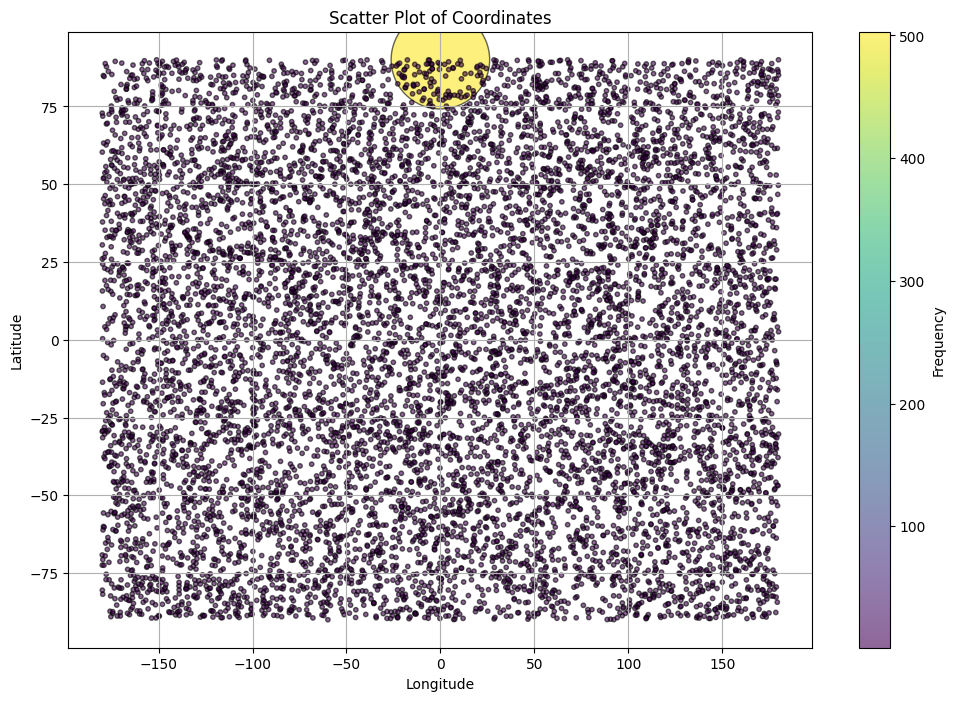

In [ ]:
from decimal import Decimal, getcontext
from collections import Counter

def parse_latlon(coord_str):
    try:
        latlon = eval(coord_str)
        if isinstance(latlon, tuple) and len(latlon) == 2:
            lat = float(latlon[0])
            lon = float(latlon[1])
            return lat, lon
    except (ValueError, SyntaxError):
        pass
    return None, None

df['latlon_home_parsed'] = df['latlon_home'].apply(parse_latlon)

valid_coords = df['latlon_home_parsed']

coord_counts = Counter(valid_coords)


lats, lons, sizes, colors = [], [], [], []
for coord, count in coord_counts.items():
    lats.append(coord[0])
    lons.append(coord[1])
    sizes.append(count * 10)
    colors.append(count)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(lons, lats, s=sizes, c=colors, cmap='viridis', alpha=0.6, edgecolor='k')
plt.colorbar(scatter, label='Frequency')
plt.title('Scatter Plot of Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

We can see that we have an excessive ocurrence of the value (90,0). We can interpret this as missing values. We will generate random unique coordinates for them.

In [ ]:
import ast
getcontext().prec = 6
df['latlon_home'] = df['latlon_home'].apply(lambda x: np.nan if x == "(90, 0)" else x)

In [ ]:
df['latlon_home']

0                                                   NaN
1          (Decimal('15.566937'), Decimal('72.565002'))
2        (Decimal('58.3661945'), Decimal('-88.241045'))
3        (Decimal('33.9129505'), Decimal('-25.988090'))
4         (Decimal('53.3907535'), Decimal('37.788254'))
                             ...                       
9995        (Decimal('9.3259885'), Decimal('8.405164'))
9996    (Decimal('-69.3195285'), Decimal('144.856086'))
9997    (Decimal('49.6393335'), Decimal('-107.303725'))
9998       (Decimal('59.711887'), Decimal('44.386039'))
9999                                                NaN
Name: latlon_home, Length: 10000, dtype: object

In [ ]:
def generate_unique_coords(existing_coords, n):
    unique_coords = set(existing_coords)
    new_coords = []
    while len(new_coords) < n:
        lat = round(np.random.uniform(-90, 90), 6)
        lon = round(np.random.uniform(-180, 180), 6)
        coord = (lat, lon)
        if coord not in unique_coords:
            unique_coords.add(coord)
            new_coords.append(coord)
    return new_coords
existing_coords = [eval(coord.replace("Decimal('", "").replace("')", "")) for coord in df['latlon_home'].dropna()]

In [ ]:
nan_coords_mask = df['latlon_home'].isna()
num_nan_coords = nan_coords_mask.sum()
nan_replacement_coords = generate_unique_coords(existing_coords, num_nan_coords)

In [ ]:
def format_coords(coords):
    lat = Decimal(str(coords[0])).quantize(Decimal('0.000001'))
    lon = Decimal(str(coords[1])).quantize(Decimal('0.000001'))
    return f"(Decimal('{lat}'), Decimal('{lon}'))"

nan_replacement_coords_formatted = [format_coords(coords) for coords in nan_replacement_coords]

df.loc[nan_coords_mask, 'latlon_home'] = nan_replacement_coords_formatted

In [ ]:
df['latlon_home']

0        (Decimal('-46.884732'), Decimal('144.530449'))
1          (Decimal('15.566937'), Decimal('72.565002'))
2        (Decimal('58.3661945'), Decimal('-88.241045'))
3        (Decimal('33.9129505'), Decimal('-25.988090'))
4         (Decimal('53.3907535'), Decimal('37.788254'))
                             ...                       
9995        (Decimal('9.3259885'), Decimal('8.405164'))
9996    (Decimal('-69.3195285'), Decimal('144.856086'))
9997    (Decimal('49.6393335'), Decimal('-107.303725'))
9998       (Decimal('59.711887'), Decimal('44.386039'))
9999        (Decimal('5.537869'), Decimal('42.975071'))
Name: latlon_home, Length: 10000, dtype: object

We check that there are not repeated values.

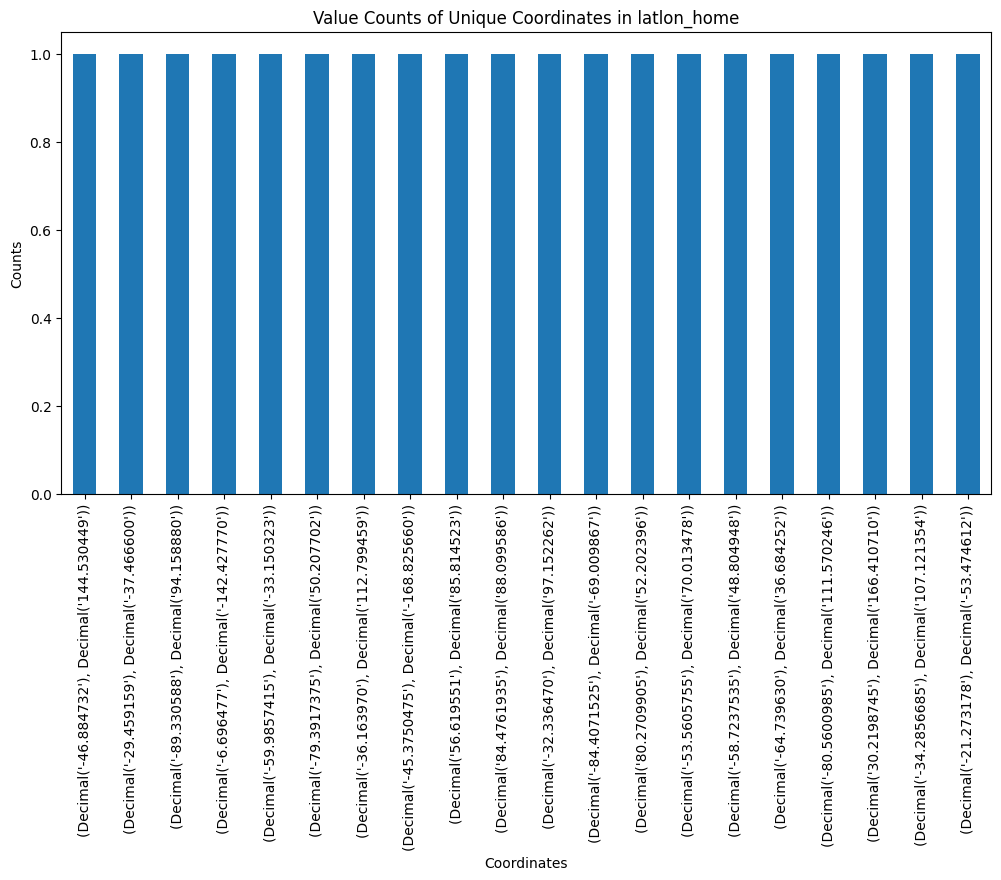

In [ ]:
value_counts = df['latlon_home'].value_counts().head(20)

plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of Unique Coordinates in latlon_home')
plt.xlabel('Coordinates')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

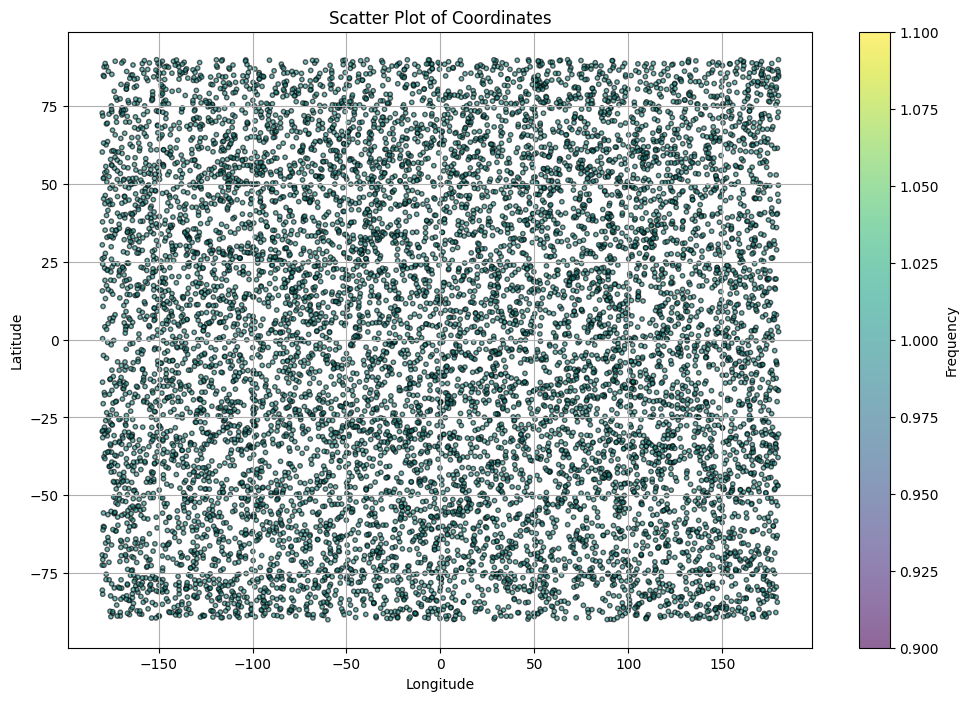

In [ ]:
df['latlon_home_parsed'] = df['latlon_home'].apply(parse_latlon)

valid_coords = df['latlon_home_parsed']

coord_counts = Counter(valid_coords)


lats, lons, sizes, colors = [], [], [], []
for coord, count in coord_counts.items():
    lats.append(coord[0])
    lons.append(coord[1])
    sizes.append(count * 10)
    colors.append(count)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(lons, lats, s=sizes, c=colors, cmap='viridis', alpha=0.6, edgecolor='k')
plt.colorbar(scatter, label='Frequency')
plt.title('Scatter Plot of Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

Lastly we check if all the coordinates have correct values.

In [ ]:
def is_valid_coordinate(coord):
    if isinstance(coord, str):
        try:
            latlon = eval(coord)
            if isinstance(latlon, tuple) and len(latlon) == 2:
                lat, lon = latlon
                if -90 <= lat <= 90 and -180 <= lon <= 180:
                    return True
        except (ValueError, SyntaxError):
            pass
    return False

df['latlon_home_valid'] = df['latlon_home'].apply(is_valid_coordinate)

invalid_coords = df[~df['latlon_home_valid']]
invalid_coords

Empty DataFrame
Columns: [prefix, lastname, firstname, firstname_mother, firstname_father, description, inquiry, Date_of_Birth, account_creation_date, last_transaction_date, account_resiliation_date, first_contact_date, last_contact_date, latlon_home, latlon_work, x35_bank_branch, email_work, email_personnal, email_sso, email_vpn, xml_authent_token, profile_json, cia_info_json, salary, first_salary, taxable_income, transaction_amount, credit_card_score, credit_card_number, weight, height, shoe_size, bank_balance, address, city, zip, country, customer_code, customer_uid, android_platform, user_agent, customer_segment_code, customer_market_code, customer_fico_score, latlon_home_parsed, latlon_home_valid]
Index: []

[0 rows x 46 columns]

In [ ]:
df.drop(columns=['latlon_home_parsed'],inplace=True)
df.drop(columns=['latlon_home_valid'], inplace =True)

### Latlon Work

In [ ]:
df['latlon_work']

0          (Decimal('10.854674'), Decimal('63.537020'))
1         (Decimal('49.801035'), Decimal('158.989977'))
2         (Decimal('-39.574620'), Decimal('96.512874'))
3       (Decimal('51.9167895'), Decimal('-127.621465'))
4        (Decimal('63.767827'), Decimal('-146.416825'))
                             ...                       
9995     (Decimal('61.2362405'), Decimal('102.397096'))
9996    (Decimal('-3.9162415'), Decimal('-146.345765'))
9997     (Decimal('-52.959469'), Decimal('-46.919426'))
9998     (Decimal('-39.6818315'), Decimal('59.422707'))
9999     (Decimal('23.318362'), Decimal('-135.654009'))
Name: latlon_work, Length: 10000, dtype: object

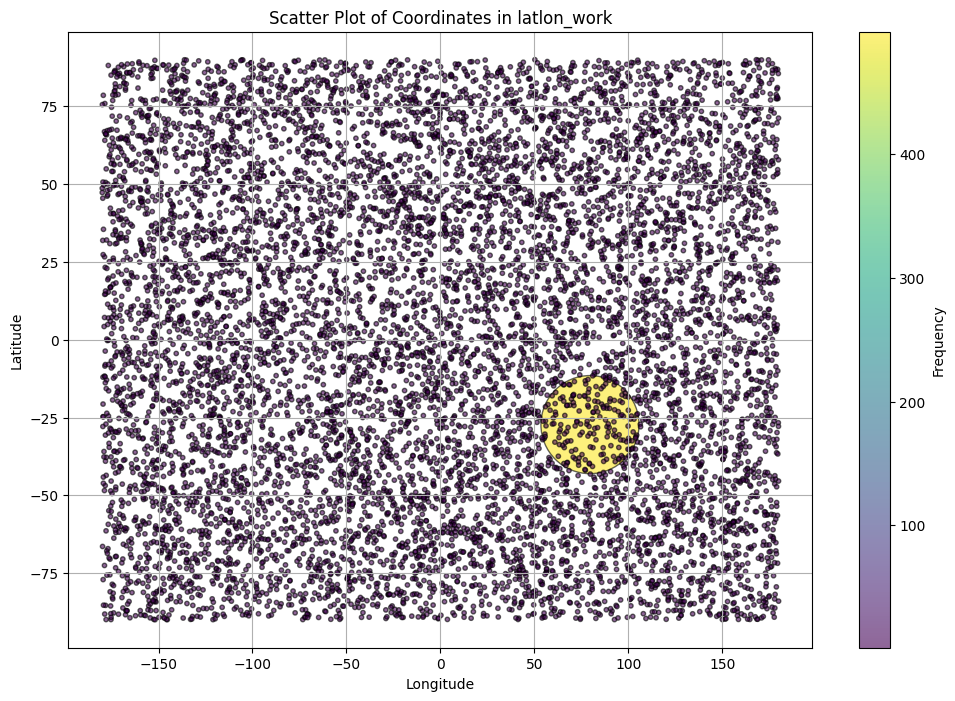

In [ ]:
df['latlon_work_parsed'] = df['latlon_work'].apply(parse_latlon)

valid_coords = df['latlon_work_parsed']

coord_counts = Counter(valid_coords)

lats, lons, sizes, colors = [], [], [], []
for coord, count in coord_counts.items():
    lats.append(coord[0])
    lons.append(coord[1])
    sizes.append(count * 10)
    colors.append(count)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(lons, lats, s=sizes, c=colors, cmap='viridis', alpha=0.6, edgecolor='k')
plt.colorbar(scatter, label='Frequency')
plt.title('Scatter Plot of Coordinates in latlon_work')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

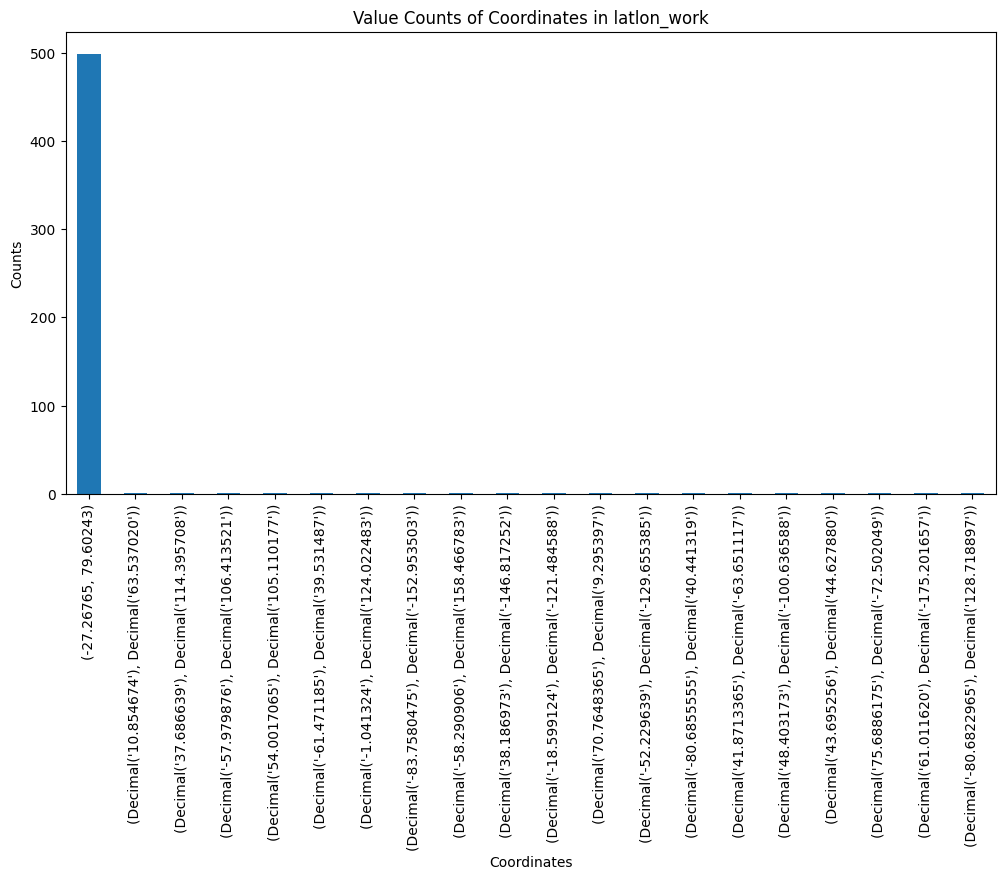

In [ ]:
value_counts = df['latlon_work'].value_counts().head(20)

plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of Coordinates in latlon_work')
plt.xlabel('Coordinates')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

Similar to the previous column, we have a value that outstands from the rest which is repeated frequently and is in a different format that the rest. We will take a similar approach as in the previous column and use the same function to generate new cordinates.

In [ ]:
df['latlon_work'] = df['latlon_work'].apply(lambda x: np.nan if x == "(-27.26765, 79.60243)" else x)
existing_coords_work = [eval(coord.replace("Decimal('", "").replace("')", "")) for coord in df['latlon_work'].dropna()]

In [ ]:
nan_coords_mask_work = df['latlon_work'].isna()
num_nan_coords_work = nan_coords_mask_work.sum()
nan_replacement_coords_work = generate_unique_coords(existing_coords_work, num_nan_coords_work)

In [ ]:
nan_replacement_coords_formatted_work = [format_coords(coords) for coords in nan_replacement_coords_work]

df.loc[nan_coords_mask_work, 'latlon_work'] = nan_replacement_coords_formatted_work

In [ ]:
df['latlon_work']

0          (Decimal('10.854674'), Decimal('63.537020'))
1         (Decimal('49.801035'), Decimal('158.989977'))
2         (Decimal('-39.574620'), Decimal('96.512874'))
3       (Decimal('51.9167895'), Decimal('-127.621465'))
4        (Decimal('63.767827'), Decimal('-146.416825'))
                             ...                       
9995     (Decimal('61.2362405'), Decimal('102.397096'))
9996    (Decimal('-3.9162415'), Decimal('-146.345765'))
9997     (Decimal('-52.959469'), Decimal('-46.919426'))
9998     (Decimal('-39.6818315'), Decimal('59.422707'))
9999     (Decimal('23.318362'), Decimal('-135.654009'))
Name: latlon_work, Length: 10000, dtype: object

Now lets ensure that all the coordinates have a maximum of 6 decimals to have a uniform defined format.

In [ ]:
def ensure_correct_format(coord_str):
    try:
        latlon = eval(coord_str)
        if isinstance(latlon, tuple) and len(latlon) == 2:
            lat = Decimal(str(latlon[0])).quantize(Decimal('0.000001'))
            lon = Decimal(str(latlon[1])).quantize(Decimal('0.000001'))
            return f"(Decimal('{lat}'), Decimal('{lon}'))"
    except (ValueError, SyntaxError):
        pass
    return coord_str

df['latlon_work'] = df['latlon_work'].apply(ensure_correct_format)

In [ ]:
df['latlon_work']

0         (Decimal('10.854674'), Decimal('63.537020'))
1        (Decimal('49.801035'), Decimal('158.989977'))
2        (Decimal('-39.574620'), Decimal('96.512874'))
3       (Decimal('51.916790'), Decimal('-127.621465'))
4       (Decimal('63.767827'), Decimal('-146.416825'))
                             ...                      
9995     (Decimal('61.236240'), Decimal('102.397096'))
9996    (Decimal('-3.916242'), Decimal('-146.345765'))
9997    (Decimal('-52.959469'), Decimal('-46.919426'))
9998     (Decimal('-39.681832'), Decimal('59.422707'))
9999    (Decimal('23.318362'), Decimal('-135.654009'))
Name: latlon_work, Length: 10000, dtype: object

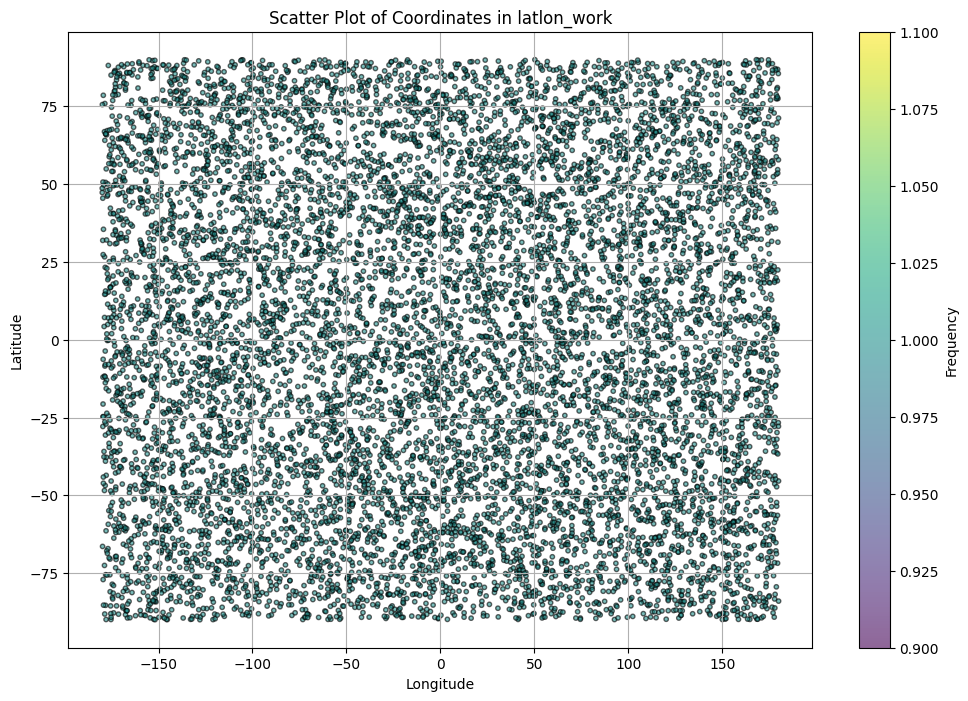

In [ ]:
df['latlon_work_parsed'] = df['latlon_work'].apply(parse_latlon)

valid_coords = df['latlon_work_parsed']

coord_counts = Counter(valid_coords)

lats, lons, sizes, colors = [], [], [], []
for coord, count in coord_counts.items():
    lats.append(coord[0])
    lons.append(coord[1])
    sizes.append(count * 10)
    colors.append(count)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(lons, lats, s=sizes, c=colors, cmap='viridis', alpha=0.6, edgecolor='k')
plt.colorbar(scatter, label='Frequency')
plt.title('Scatter Plot of Coordinates in latlon_work')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

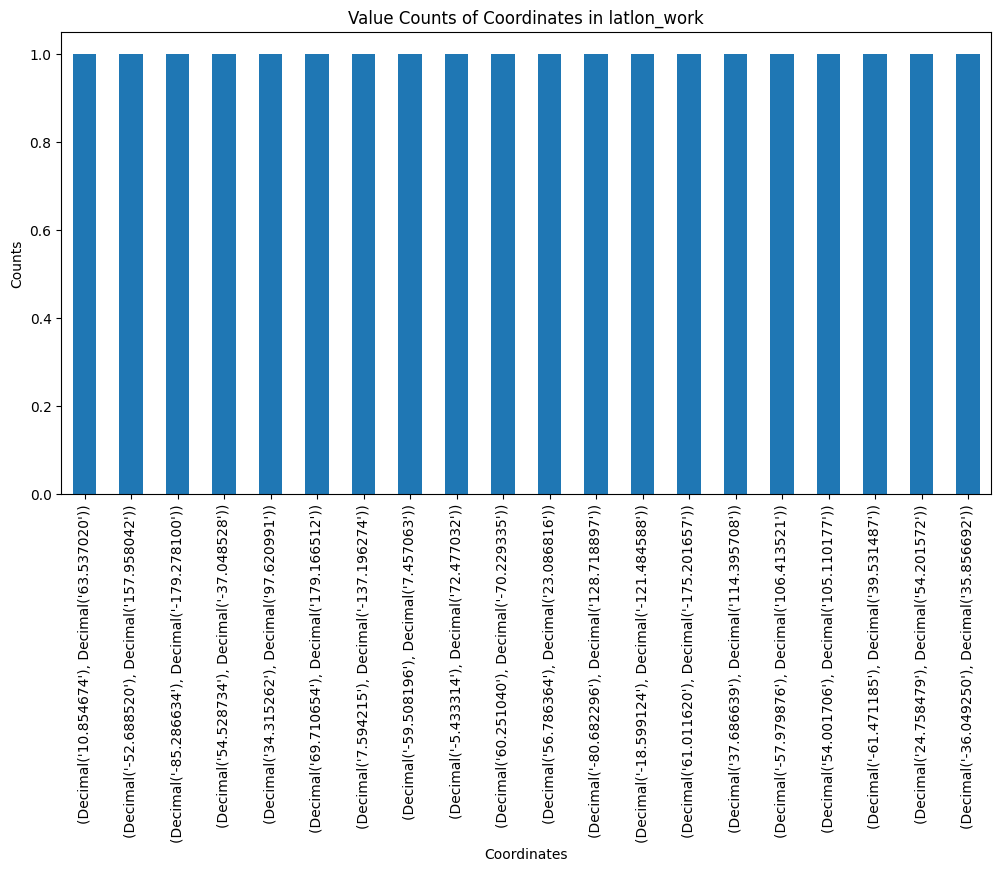

In [ ]:
value_counts = df['latlon_work'].value_counts().head(20)

plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of Coordinates in latlon_work')
plt.xlabel('Coordinates')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

Now the column is clean. We check if we have invalid coordinates.

In [ ]:
df['latlon_work_valid'] = df['latlon_work'].apply(is_valid_coordinate)

invalid_coords = df[~df['latlon_work_valid']]
invalid_coords

Empty DataFrame
Columns: [prefix, lastname, firstname, firstname_mother, firstname_father, description, inquiry, Date_of_Birth, account_creation_date, last_transaction_date, account_resiliation_date, first_contact_date, last_contact_date, latlon_home, latlon_work, x35_bank_branch, email_work, email_personnal, email_sso, email_vpn, xml_authent_token, profile_json, cia_info_json, salary, first_salary, taxable_income, transaction_amount, credit_card_score, credit_card_number, weight, height, shoe_size, bank_balance, address, city, zip, country, customer_code, customer_uid, android_platform, user_agent, customer_segment_code, customer_market_code, customer_fico_score, latlon_work_parsed, latlon_work_valid]
Index: []

[0 rows x 46 columns]

In [ ]:
df.drop(columns=['latlon_work_parsed'], inplace =True)
df.drop(columns=['latlon_work_valid'], inplace =True)

## Location-related columns

### Address

In [ ]:
df['address']

0                        PSC 0211, Box 4159\nAPO AP 54411
1        9743 Michelle Road Apt. 208\nReedhaven, GU 50103
2                        Unit 3513 Box 2473\nDPO AA 56829
3       883 Johnson Ramp Apt. 748\nJoneschester, OR 24233
4                        Unit 6715 Box 2114\nDPO AP 25109
                              ...                        
9995                     Unit 8527 Box 9255\nDPO AP 51232
9996          37598 Farrell Shore\nPort Annbury, VT 53257
9997         67549 Smith Burg\nWest Sandramouth, NV 77088
9998            109 Scott Plains\nLake Jakebury, HI 13380
9999                  156 Oscar Rapid\nDarylton, IL 86317
Name: address, Length: 10000, dtype: object

In [ ]:
def starts_with_number(address):
    return address.strip().split()[0].isdigit()

df['valid_address'] = df['address'].apply(starts_with_number)

invalid_addresses = df[~df['valid_address']]
valid_addresses = df[df['valid_address']]

invalid_count = invalid_addresses.shape[0]
valid_count = valid_addresses.shape[0]

print(f"Number of valid addresses: {valid_count}")
print(f"Number of invalid addresses: {invalid_count}")

invalid_addresses['address']

Number of valid addresses: 8906
Number of invalid addresses: 1094


0       PSC 0211, Box 4159\nAPO AP 54411
2       Unit 3513 Box 2473\nDPO AA 56829
4       Unit 6715 Box 2114\nDPO AP 25109
5             USNS Rodgers\nFPO AA 01522
9       Unit 7671 Box 3538\nDPO AA 40676
                      ...               
9975             USS Brown\nFPO AP 03159
9985    Unit 7579 Box 4480\nDPO AP 09702
9987    PSC 5715, Box 3582\nAPO AE 60685
9994    Unit 2685 Box 6280\nDPO AP 52462
9995    Unit 8527 Box 9255\nDPO AP 51232
Name: address, Length: 1094, dtype: object

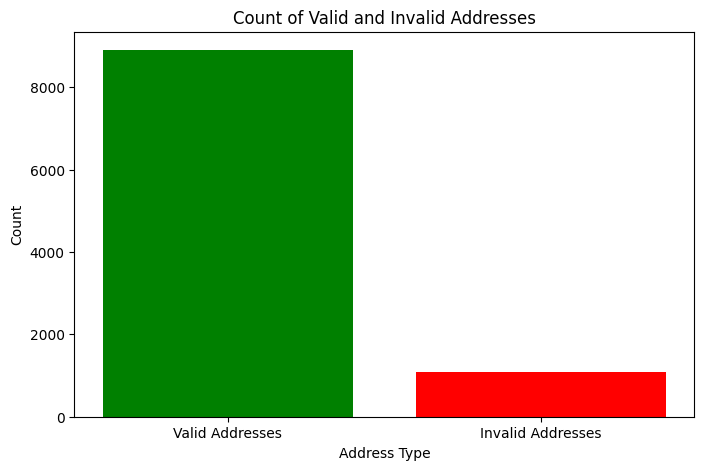

In [ ]:
counts = {'Valid Addresses': valid_count, 'Invalid Addresses': invalid_count}
labels = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'red'])
plt.title('Count of Valid and Invalid Addresses')
plt.xlabel('Address Type')
plt.ylabel('Count')
plt.show()

In [ ]:
def starts_with_number(address):
    return address.strip().split()[0].isdigit()

df['valid_address'] = df['address'].apply(starts_with_number)

valid_addresses = df[df['valid_address']]['address'].values

def replace_invalid_address(address):
    if starts_with_number(address):
        return address
    else:
        return np.random.choice(valid_addresses)

df['address'] = df['address'].apply(replace_invalid_address)

df['address'] = df['address'].apply(replace_invalid_address)

df['address']

0       2611 Johnson Mall Suite 301\nWest Elizabethbur...
1        9743 Michelle Road Apt. 208\nReedhaven, GU 50103
2       5464 Kari Key Apt. 182\nWest Christopher, GA 4...
3       883 Johnson Ramp Apt. 748\nJoneschester, OR 24233
4                     368 Webb Wall\nAshleyfort, NE 67341
                              ...                        
9995    306 Peterson Freeway Apt. 958\nPeterfurt, WY 0...
9996          37598 Farrell Shore\nPort Annbury, VT 53257
9997         67549 Smith Burg\nWest Sandramouth, NV 77088
9998            109 Scott Plains\nLake Jakebury, HI 13380
9999                  156 Oscar Rapid\nDarylton, IL 86317
Name: address, Length: 10000, dtype: object

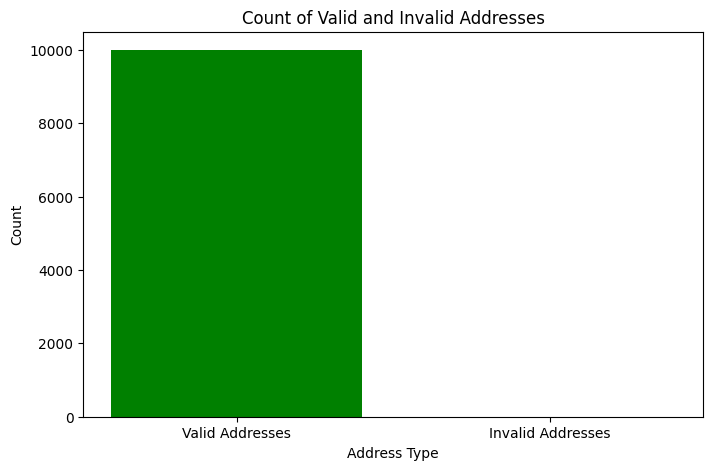

In [ ]:
df['valid_address'] = df['address'].apply(starts_with_number)
invalid_addresses = df[~df['valid_address']]
valid_addresses = df[df['valid_address']]

invalid_count = invalid_addresses.shape[0]
valid_count = valid_addresses.shape[0]
counts = {'Valid Addresses': valid_count, 'Invalid Addresses': invalid_count}
labels = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'red'])
plt.title('Count of Valid and Invalid Addresses')
plt.xlabel('Address Type')
plt.ylabel('Count')
plt.show()

### City

In [ ]:
df['city']

0          Lake Angela
1          Sabrinastad
2          Caseborough
3         Michelleview
4       New Amandafurt
             ...      
9995      North Ashley
9996         Greenport
9997    Port Kevintown
9998         Lake Tony
9999       North Linda
Name: city, Length: 10000, dtype: object

In [ ]:
df['city'].value_counts()

city
Lake James         11
South John         11
Michaelmouth        9
New Robert          9
Lake Michael        9
                   ..
Port Destinyton     1
Johnnyberg          1
West Rebekah        1
Cochranside         1
Lake Tony           1
Name: count, Length: 7681, dtype: int64

There are many incorrect city names as they are lake names. For example Lake James.

Number of cities starting with 'Lake': 715
Total number of cities: 10000
Top 20 most frequent city names:
city
Lake James          11
South John          11
Michaelmouth         9
New Robert           9
Lake Michael         9
New Christopher      9
South Michael        9
North Michael        8
New David            8
East Thomas          8
Davidburgh           8
West Christopher     8
West Joseph          8
West Michael         8
Port John            7
North James          7
East Jennifer        7
North John           7
Matthewton           7
West Jennifer        7
Name: count, dtype: int64


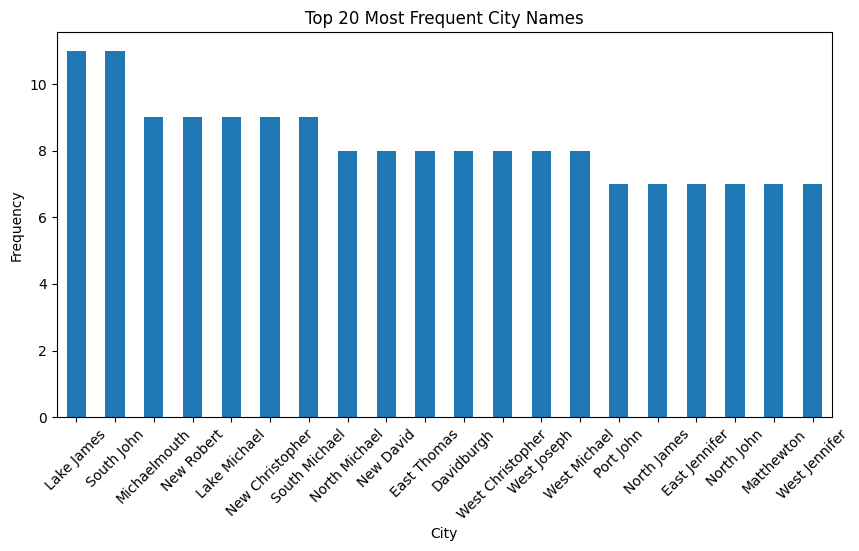

Unique city names (sample): ['Lake Angela' 'Sabrinastad' 'Caseborough' 'Michelleview' 'New Amandafurt'
 'Port Katie' 'Lake Lauratown' 'Lake Dustinview' 'Hillfurt'
 'North Christinashire' 'New Tiffanyview' 'Port Daltonmouth' 'Nathanton'
 'North Franciscoshire' 'Johnsonhaven' 'New Jacqueline' 'West Geraldton'
 'New Jefferyport' 'Meganville' 'Lake Laurenside']


In [ ]:
lake_cities = df['city'].str.startswith('Lake').sum()
total_cities = df['city'].shape[0]

# Display the count of "Lake" cities
print(f"Number of cities starting with 'Lake': {lake_cities}")
print(f"Total number of cities: {total_cities}")

# Count the occurrences of each unique city name
city_counts = df['city'].value_counts()

# Display the top 20 most frequent city names
print("Top 20 most frequent city names:")
print(city_counts.head(20))

# Plot the distribution of the top 20 most frequent city names
plt.figure(figsize=(10, 5))
city_counts.head(20).plot(kind='bar')
plt.title('Top 20 Most Frequent City Names')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Display the unique city names to identify unusual or incorrect names
unique_cities = df['city'].unique()
print(f"Unique city names (sample): {unique_cities[:20]}")  # Display a sample of unique city names

Number of cities starting with 'Lake': 715
Number of other cities: 9285


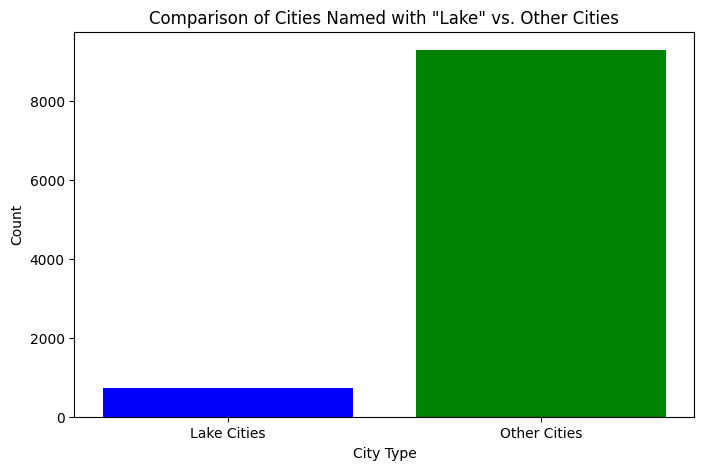

In [ ]:
lake_cities = df['city'].str.startswith('Lake')
lake_city_count = lake_cities.sum()
non_lake_city_count = (~lake_cities).sum()

print(f"Number of cities starting with 'Lake': {lake_city_count}")
print(f"Number of other cities: {non_lake_city_count}")

labels = ['Lake Cities', 'Other Cities']
counts = [lake_city_count, non_lake_city_count]

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['blue', 'green'])
plt.title('Comparison of Cities Named with "Lake" vs. Other Cities')
plt.xlabel('City Type')
plt.ylabel('Count')
plt.show()

In [ ]:
lake_cities = df['city'].str.startswith('Lake').sum()

print(f"Number of cities starting with 'Lake': {lake_cities}")

# Identify other invalid patterns (e.g., city names with special characters or unusual patterns)
invalid_patterns = df['city'].str.contains(r'[^\w\s]', regex=True).sum()

print(f"Number of cities with invalid patterns: {invalid_patterns}")

Number of cities starting with 'Lake': 715
Number of cities with invalid patterns: 0


In [ ]:
invalid_lake = df['city'].str.startswith('Lake')
valid_cities = df[~invalid_lake]['city'].values
def replace_invalid_city(city):
    if city.startswith('Lake'):
        return np.random.choice(valid_cities)
    return city

# Apply the function to replace "Lake" cities
df.loc[invalid_lake, 'city'] = df.loc[invalid_lake, 'city'].apply(replace_invalid_city)

In [ ]:
lake_cities = df['city'].str.startswith('Lake').sum()
print(f"Number of cities starting with 'Lake': {lake_cities}")

Number of cities starting with 'Lake': 0


Number of cities starting with 'Lake': 0
Number of other cities: 10000


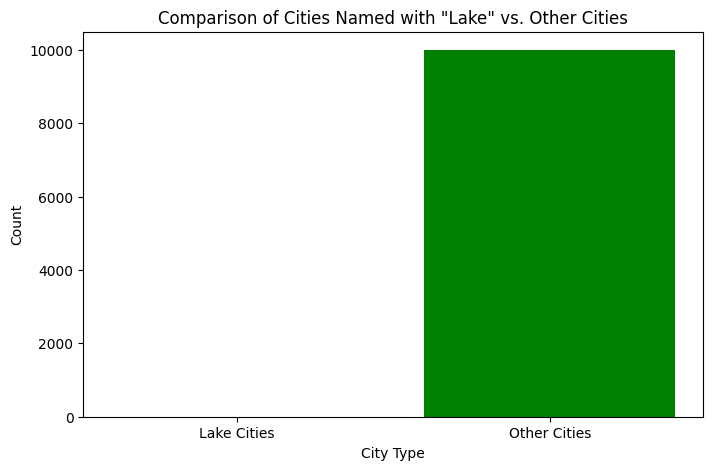

In [ ]:
lake_cities = df['city'].str.startswith('Lake')
lake_city_count = lake_cities.sum()
non_lake_city_count = (~lake_cities).sum()

# Display the count of "Lake" cities and other cities
print(f"Number of cities starting with 'Lake': {lake_city_count}")
print(f"Number of other cities: {non_lake_city_count}")

# Plot the comparison
labels = ['Lake Cities', 'Other Cities']
counts = [lake_city_count, non_lake_city_count]

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['blue', 'green'])
plt.title('Comparison of Cities Named with "Lake" vs. Other Cities')
plt.xlabel('City Type')
plt.ylabel('Count')
plt.show()

### Zip

In [ ]:
df['zip']

0       47771
1        9054
2       13489
3       46094
4       79490
        ...  
9995    74384
9996    14884
9997    38143
9998    82548
9999    52284
Name: zip, Length: 10000, dtype: int64

We see that not all the zip codes have the same length

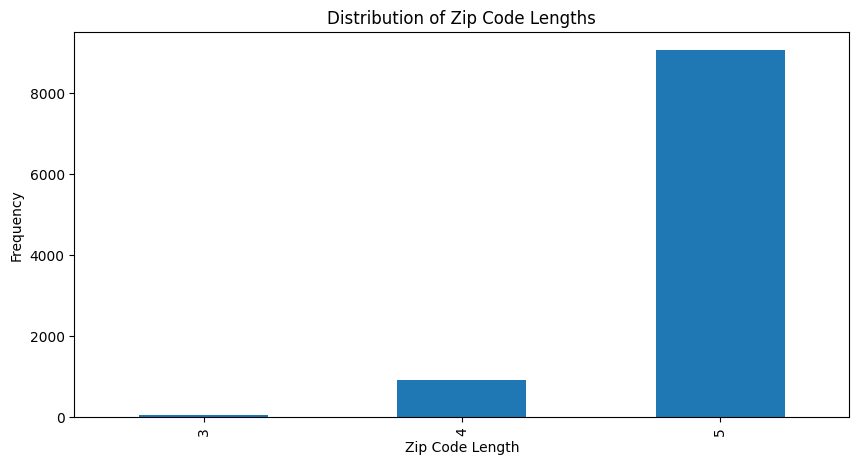

In [ ]:
df['zip_length'] = df['zip'].astype(str).apply(len)

# Count the occurrences of each length
zip_length_counts = df['zip_length'].value_counts()

# Plot the distribution of zip code lengths
plt.figure(figsize=(10, 5))
zip_length_counts.sort_index().plot(kind='bar')
plt.title('Distribution of Zip Code Lengths')
plt.xlabel('Zip Code Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['zip'] = df['zip'].astype(str)

short_zip_codes = df['zip'].apply(lambda x: len(x) < 5)

def pad_zip_code(zip_code):
    if len(zip_code) < 5:
        random_digits = ''.join(np.random.choice(list('0123456789'), size=(5 - len(zip_code))))
        return zip_code + random_digits
    return zip_code

df.loc[short_zip_codes, 'zip'] = df.loc[short_zip_codes, 'zip'].apply(pad_zip_code)

In [ ]:
df['zip']

0       47771
1       90548
2       13489
3       46094
4       79490
        ...  
9995    74384
9996    14884
9997    38143
9998    82548
9999    52284
Name: zip, Length: 10000, dtype: object

We check if all the values have the same lenght of 5 digits

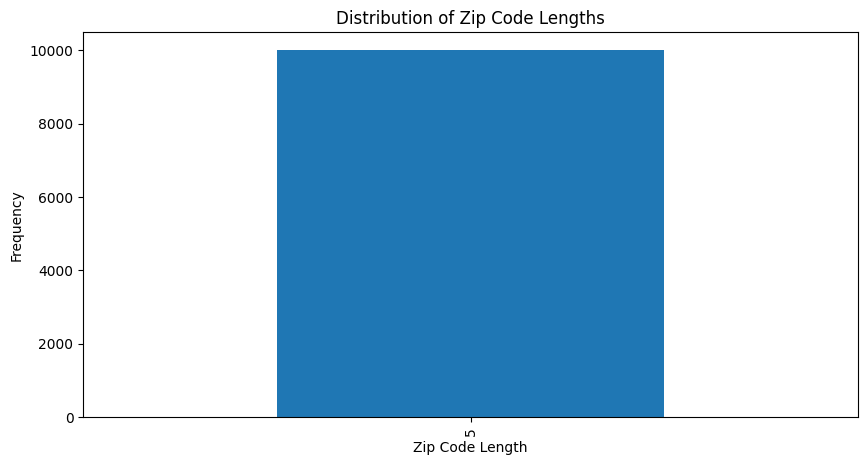

In [ ]:
df['zip_length'] = df['zip'].astype(str).apply(len)

zip_length_counts = df['zip_length'].value_counts()

plt.figure(figsize=(10, 5))
zip_length_counts.sort_index().plot(kind='bar')
plt.title('Distribution of Zip Code Lengths')
plt.xlabel('Zip Code Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['zip'].value_counts()

zip
40439    4
33204    3
44223    3
69065    3
75469    3
        ..
20844    1
63372    1
14060    1
43406    1
52284    1
Name: count, Length: 9437, dtype: int64

In [ ]:
df['city'].value_counts()

city
South John          13
South Michael       11
New Christopher     10
Michaelmouth        10
New David            9
                    ..
Darleneside          1
East Derekmouth      1
Melanietown          1
West Vincentstad     1
Port Kevintown       1
Name: count, Length: 7140, dtype: int64

We see that the ocurrencies of the zip codes does not match the ocurrencies of the cities. We want each city to have a unique zip code.

In [ ]:
zip_city_example = df[df['city'] == 'South John']['zip']

print("Zip code for South John")
print(zip_city_example)

Zip code for South John
309     41830
965     82666
1417    47008
2429    30880
3544    84801
4035    26259
4286    83806
4611    76013
5210    79937
6776    15151
7957    70555
8332    82750
8382    46302
Name: zip, dtype: object


As it is shown in this example, the city of South John has multiple unrelated zip codes.

In [ ]:
unique_cities = df['city'].unique()

# Generate a unique zip code for each unique city
city_to_zip = {}
used_zips = set(df['zip'])
for city in unique_cities:
    while True:
        new_zip = ''.join(np.random.choice(list('0123456789'), size=5))
        if new_zip not in used_zips:
            used_zips.add(new_zip)
            city_to_zip[city] = new_zip
            break

# Assign the unique zip codes to each city in the dataframe
df['zip'] = df['city'].map(city_to_zip)

Now we check with the same example. We see that South John has a unique zip code and now the number of ocurrencies of the zip codes is the same as the ocurrencies of the cities.

In [ ]:
zip_city_example = df[df['city'] == 'South John']['zip']

print("Zip code for South John")
print(zip_city_example)

Zip code for South John
309     31131
965     31131
1417    31131
2429    31131
3544    31131
4035    31131
4286    31131
4611    31131
5210    31131
6776    31131
7957    31131
8332    31131
8382    31131
Name: zip, dtype: object


In [ ]:
df[['zip','city']].value_counts()

zip    city           
31131  South John         13
61900  South Michael      11
50951  New Christopher    10
93070  Michaelmouth       10
11019  New Robert          9
                          ..
37637  Bradyfurt           1
37594  Theresahaven        1
37579  Woodland            1
37554  New Peggybury       1
99997  Carlsonberg         1
Name: count, Length: 7140, dtype: int64

### Country (no error)

In [ ]:
df['country']

0                                           Mongolia
1                                   Marshall Islands
2                                         Mauritania
3                                    Solomon Islands
4                                         Guadeloupe
                            ...                     
9995    South Georgia and the South Sandwich Islands
9996                                    Cook Islands
9997                                          Jordan
9998                                        Ethiopia
9999                                    Burkina Faso
Name: country, Length: 10000, dtype: object

In [ ]:
df['country'].value_counts().head(20)

country
Korea                                           87
Congo                                           75
Fiji                                            63
Burkina Faso                                    60
Norway                                          58
Cape Verde                                      56
Svalbard & Jan Mayen Islands                    55
Uruguay                                         54
Poland                                          53
Cook Islands                                    52
Lao People's Democratic Republic                52
Latvia                                          52
Papua New Guinea                                52
Trinidad and Tobago                             52
Benin                                           52
Costa Rica                                      51
Eritrea                                         51
Antarctica (the territory South of 60 deg S)    51
Jamaica                                         51
Wallis and Futuna      

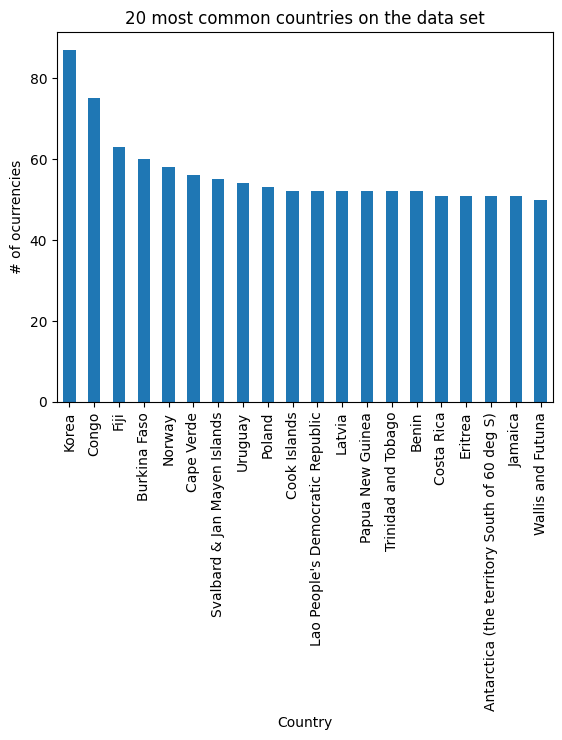

In [ ]:
countries_count= df['country'].value_counts().head(20)

countries_count.plot(kind= 'bar')
plt.xlabel('Country')
plt.ylabel('# of ocurrencies')
plt.title('20 most common countries on the data set')
plt.show()

Let's see it using a map

<ipython-input-319-6300bf37c268>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


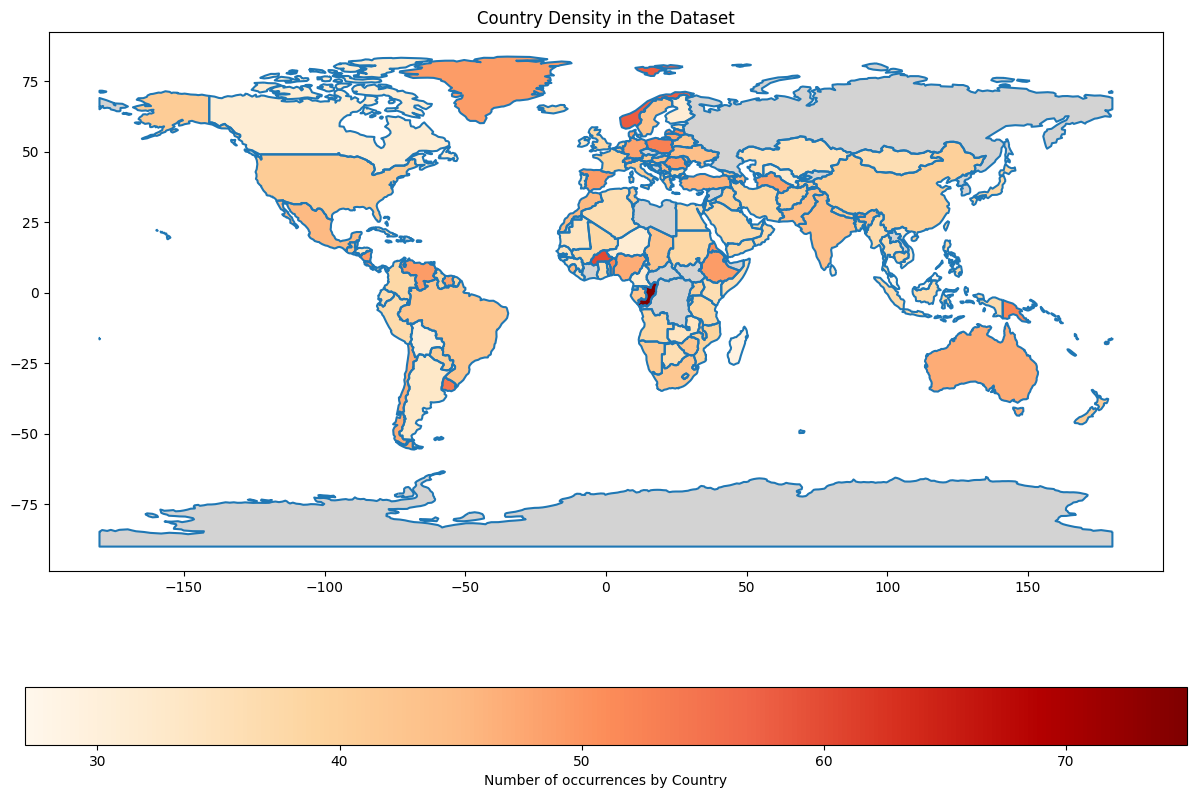

In [ ]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Count occurrences of each country
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['name', 'count']

# Merge the count data with the world map data
world = world.merge(country_counts, how='left', left_on='name', right_on='name')

# Plot the map with a color gradient based on the counts
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='count', ax=ax, legend=True,
           legend_kwds={'label': "Number of occurrences by Country",
                        'orientation': "horizontal"},
           cmap='OrRd', missing_kwds={'color': 'lightgrey'})

# Add title and show the plot
plt.title('Country Density in the Dataset')
plt.show()

We see that for the countries

In [ ]:
iso_countries= pd.read_csv("/content/drive/MyDrive/Data_cleaning/project_0.csv")

## Textual columns

In [ ]:
description_text = ' '.join(df['description'].dropna().astype(str))
inquiry_text = ' '.join(df['inquiry'].dropna().astype(str))

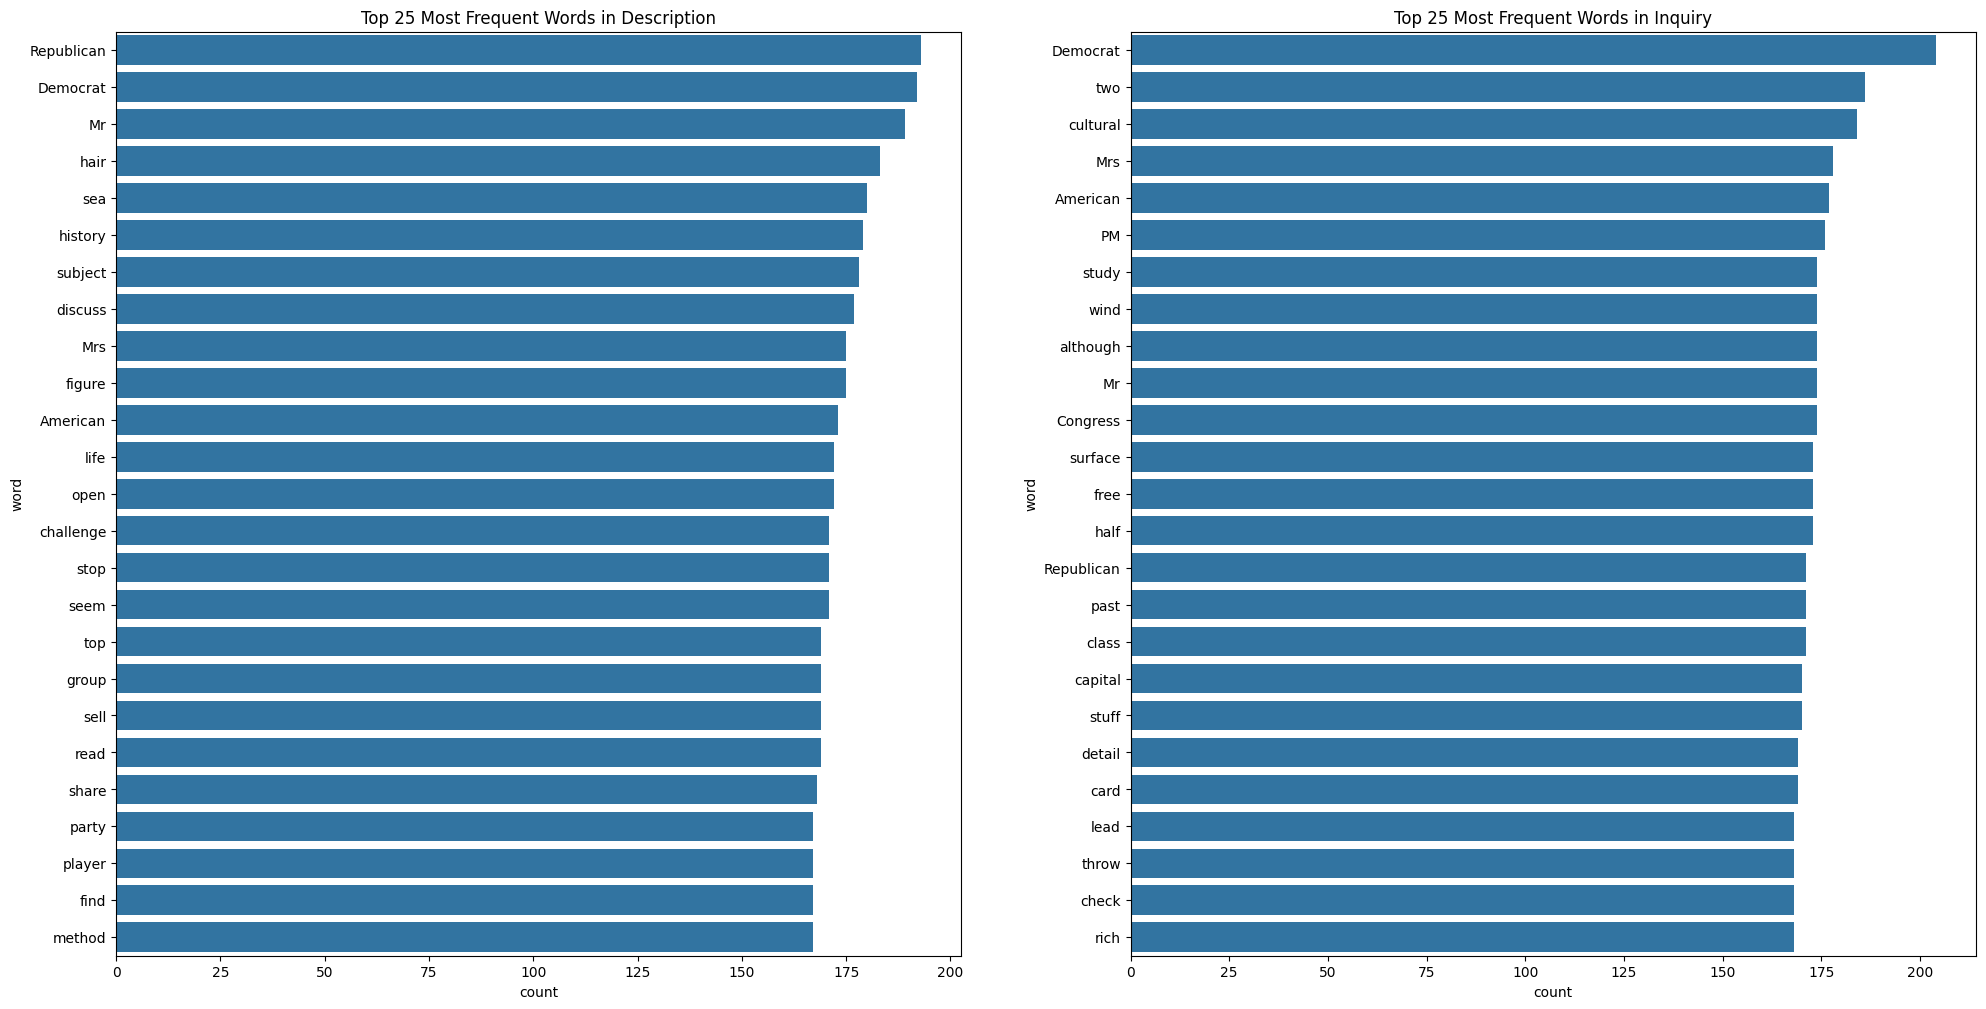

In [ ]:
# Get the stop words
stop_words = set(stopwords.words('english'))

# Tokenize the text and remove stop words
description_words = [word for word in description_text.split() if word.lower() not in stop_words]
description_word_freq = Counter(description_words)

inquiry_words = [word for word in inquiry_text.split() if word.lower() not in stop_words]
inquiry_word_freq = Counter(inquiry_words)

# Convert to DataFrame
description_word_freq_df = pd.DataFrame(description_word_freq.items(), columns=['word', 'count']).sort_values(by='count', ascending=False).head(25)
inquiry_word_freq_df = pd.DataFrame(inquiry_word_freq.items(), columns=['word', 'count']).sort_values(by='count', ascending=False).head(25)

# Plot the top 25 most frequent words side by side
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

sns.barplot(x='count', y='word', data=description_word_freq_df, ax=ax[0])
ax[0].set_title('Top 25 Most Frequent Words in Description')

sns.barplot(x='count', y='word', data=inquiry_word_freq_df, ax=ax[1])
ax[1].set_title('Top 25 Most Frequent Words in Inquiry')

plt.show()

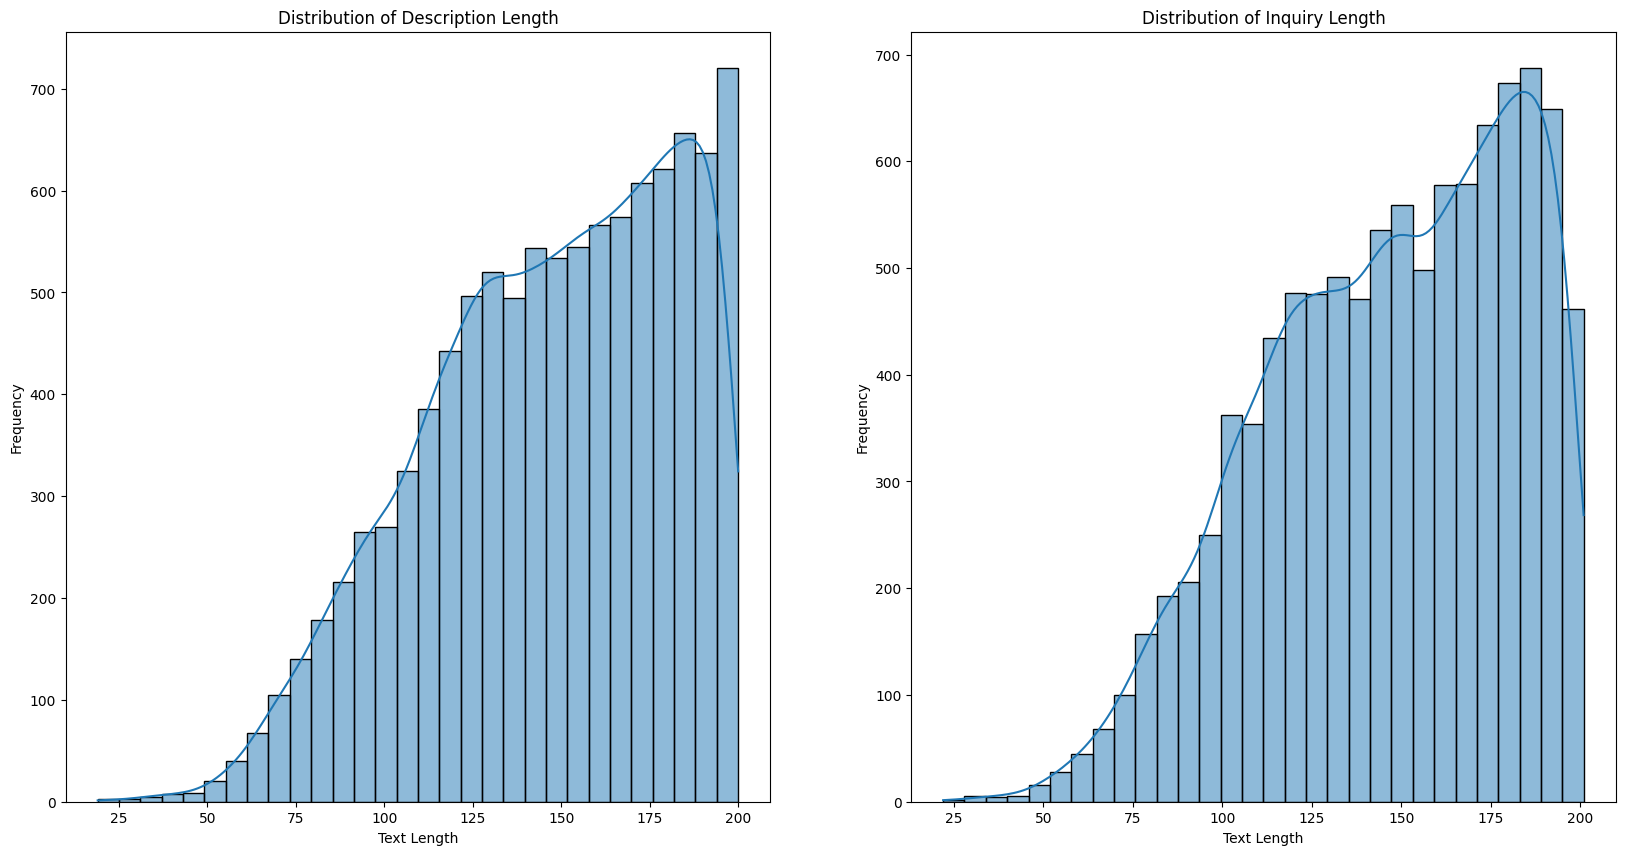

In [ ]:
# Calculate text length
description_lengths = df['description'].dropna().astype(str).apply(len)
inquiry_lengths = df['inquiry'].dropna().astype(str).apply(len)

# Plot histogram side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(description_lengths, bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Description Length')
ax[0].set_xlabel('Text Length')
ax[0].set_ylabel('Frequency')

sns.histplot(inquiry_lengths, bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Inquiry Length')
ax[1].set_xlabel('Text Length')
ax[1].set_ylabel('Frequency')

plt.show()

Now let's see what the issues can be:

In [ ]:
# Checking for missing values in 'description' and 'inquiry' columns
missing_description = df['description'].isnull().sum()
missing_inquiry = df['inquiry'].isnull().sum()

# Function to get unique non-alphabetic characters
def get_non_alphabetic_chars(column):
    all_chars = ''.join(column.dropna())
    unique_chars = set(all_chars)
    non_alpha_chars = {char for char in unique_chars if not char.isalpha()}
    return non_alpha_chars

# Character analysis: identify unique non-alphabetic characters
non_alpha_chars_description = get_non_alphabetic_chars(df['description'])
non_alpha_chars_inquiry = get_non_alphabetic_chars(df['inquiry'])

# Displaying results
result = {
    'Missing Values': {
        'description': missing_description,
        'inquiry': missing_inquiry
    },
    'Non-Alphabetic Characters': {
        'description': non_alpha_chars_description,
        'inquiry': non_alpha_chars_inquiry
    }
}

result

{'Missing Values': {'description': 0, 'inquiry': 0},
 'Non-Alphabetic Characters': {'description': {'\n', ' ', '.'},
  'inquiry': {'\n', '\r', ' ', '.'}}}

From this we can't see what is the problem with description. But for inquiry, we see that we got some unexpected \r that could cause some issue. We're assuming it was meant to be \n.

### Description

Regarding this column, the newlines characters seems to be a potential problem without being that much of a big deal.\
The most problematic ones will be consecutive newlines, which only appends for one row:

In [ ]:
# Find the rows where 'description' contains multiple consecutive newline characters
matching_rows = df[df['description'].str.contains(r'\n{2,}')]

# Display the matching lines
matching_descriptions = matching_rows['description']
matching_descriptions

4676    Interesting end they article. Go on together r...
Name: description, dtype: object

Let's replace them by a single space.

In [ ]:
pattern = re.compile(r'\n{2,}')
df['description'] = df['description'].str.replace(pattern, ' ', regex=True)

Based on our discussion during the exam, we decided to replace every remaining \n of this column by a space.

In [ ]:
df['description'] = df['description'].str.replace('\n', ' ')

### Inquiry

Let's fix this easy issue

In [ ]:
df['inquiry'] = df['inquiry'].str.replace('\r', '\n', regex=False)

## Json Columns

In [ ]:
def is_json_well_formatted(json_str):
    try:
        json.loads(json_str)
        return True
    except ValueError:
        return False

# Apply the function to the JSON columns and store the result
well_formatted_cia = df['cia_info_json'].apply(is_json_well_formatted)
well_formatted_profile = df['profile_json'].apply(is_json_well_formatted)

print(well_formatted_cia.value_counts(),'\n')
print(well_formatted_profile.value_counts())

cia_info_json
True     9908
False      92
Name: count, dtype: int64 

profile_json
False    10000
Name: count, dtype: int64


### cia_info_json

From the previous code, we know that the problem lies in the format of some rows. As we don't know exactly what is the problem, let's visualize the badly formatted rows:

In [ ]:
malformed_json_df = df[~well_formatted_cia]
print(malformed_json_df['cia_info_json'])

200     [{"name": "Nancy Rogers", "residency": "Unit 7...
212     [{"name": "Katie Murray", "residency": "39468 ...
327     [{"name": "Brett Chambers", "residency": "6484...
454     [{"name": "John Rogers", "residency": "18956 M...
694     [{"name": "David Young", "residency": "221 Ama...
                              ...                        
9766    [{"name": "Daniel Guerrero", "residency": "481...
9816    [{"name": "James Green", "residency": "54390 F...
9839    [{"name": "Christy Cole DVM", "residency": "95...
9850    [{"name": "David Smith", "residency": "5696 Gr...
9926    [{"name": "Yvette Perry", "residency": "8161 R...
Name: cia_info_json, Length: 92, dtype: object


It's hard to see as it's some punctuation problem, let me give you a more readable example :

In [ ]:
from IPython.display import display, HTML

json_string = """
[{"name": "Katie Murray", "residency": "39468 Henderson Wall\\nWest James, MD 69076"},
 {"name": "Jason Brown", "residency": "6707 Andrews Walk Suite 896\\nJasonmouth, WI 36974"},
 {"name": "Brett Baker", "residency": "810 Colin Squares Suite 832\\nWest Michaelshire, AS 42000<span style='color:red;'>(}</span>"},
 {"name": "Daniel Rivers", "residency": "Unit 9024 Box 7834\\nDPO AP 77846"},
 {"name": "Sarah Hudson", "residency": "6799 Johnson Stravenue Suite 118\\nMorrisonborough, CA 77598"},
 {"name": "Frank Green", "residency": "61195 Small Landing\\nNew Catherine, AL 53924"},
 {"name": "Mr. William Castro", "residency": "2975 Johnson Loaf\\nMartinezborough, DC 31421"},
 {"name": "Steven Price", "residency": "Unit 4876 Box 5406\\nDPO AA 92486"},
 {"name": "Barbara Durham", "residency": "499 Hansen Islands\\nNorth Carrie, NM 55552"},
 {"name": "Tammy Delgado", "residency": "USNS Garcia\\nFPO AE 64661"}]
"""

display(HTML(f"<pre>{json_string}</pre>"))


Let's try to fix the format:

In [ ]:
def fix_json_string(json_str):
    original_json_str = json_str  # Store the original JSON string

    # Check if the input JSON string is already valid
    try:
        json.loads(json_str)
        return json_str  # Return the original JSON string if it's valid
    except json.JSONDecodeError:
        pass  # Proceed to fix the JSON string if it's not valid

    # Strip leading/trailing whitespace and ensure it's a string
    json_str = json_str.strip()

    # Ensure the JSON string starts with '[' and ends with ']'
    if not json_str.startswith('['):
        json_str = '[' + json_str
    if not json_str.endswith(']'):
        json_str = json_str + ']'

    # Attempt to correct common syntax errors
    json_str = re.sub(r'\(\}', '}', json_str)  # Fix (}
    json_str = re.sub(r'\(\]', ']', json_str)  # Fix (]
    json_str = re.sub(r'\(\{', '{', json_str)  # Fix ({

    # Remove misplaced opening parentheses
    json_str = re.sub(r'\([^\{\}\[\]]*', lambda x: x.group(0).replace('(', ''), json_str)

    # Fix specific issues like unmatched parentheses or missing commas
    json_str = re.sub(r'(?<=\d)\(', '', json_str)  # Remove '(' after numbers
    json_str = re.sub(r'\)\s*(?=[\{\}\[\]])', '', json_str)  # Remove ')' before JSON structures

    # Manually inspect and correct specific malformed sections
    try:
        # Attempt to load the JSON to check if it is well-formed
        json.loads(json_str)
        return json_str
    except json.JSONDecodeError as e:
        # If it fails, find the problematic position
        position = e.pos
        context = json_str[max(0, position-40):min(len(json_str), position+40)]
        print(f"Error at position {position}: {context}")

        # Attempt to manually fix issues around the error position
        # For this specific case, we know there's a missing comma and a misplaced '('
        json_str = json_str[:position-1] + json_str[position:]  # Remove '('
        json_str = json_str.replace('AS 42000(}', 'AS 42000}')  # Fix specific known issue

        try:
            json.loads(json_str)
            return json_str
        except json.JSONDecodeError as e:
            print(f"Still cannot parse JSON: {e}")
            return original_json_str  # Return the original incorrect JSON string if unable to fix

In [ ]:
df['cia_info_json'] = df['cia_info_json'].apply(fix_json_string)

Error at position 446: ly Causeway\\nSouth Sylvia, OR 08693"}, |"name": "Jennifer Huynh", "residency": 
Still cannot parse JSON: Expecting value: line 1 column 446 (char 445)
Error at position 279: e 832\\nWest Michaelshire, AS 42000}, {"name": "Daniel Rivers", "residency": "Un
Still cannot parse JSON: Expecting ',' delimiter: line 1 column 284 (char 283)
Error at position 244: "PSC 5172, Box 4280\\nAPO AA 33113"}, ""name": "Alice Shaw", "residency": "PSC 0
Still cannot parse JSON: Expecting ',' delimiter: line 1 column 249 (char 248)
Error at position 827:  CO 44190"}, {"name": "Rodney Davis\\, "residency": "6217 King Spurs Apt. 489\\n
Still cannot parse JSON: Expecting ',' delimiter: line 1 column 837 (char 836)
Error at position 364: y": "PSC 8523, Box 8798\\nAPO AE 93833"}# {"name": "George Obrien", "residency":
Still cannot parse JSON: Expecting ',' delimiter: line 1 column 364 (char 363)
Error at position 204: gh, VI 44030"}, {"name": "Tammy Harris",/"residency": "Unit 0926 Box 1

In [ ]:
well_formatted_cia = df['cia_info_json'].apply(is_json_well_formatted)
print(well_formatted_cia.value_counts(),'\n')

cia_info_json
True     9925
False      75
Name: count, dtype: int64 



As you can see, we partially suceed. We went from 92 incorrect JSON to 75. We haven't succeed more.

### Profile_json (hardest)

Just to see let's try apply the same function as for cia_info_json

In [ ]:
df['profile_json'] = df['profile_json'].apply(fix_json_string)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Error at position 2: [{'job': 'Fine artist', 'company': 'Ford-R
Still cannot parse JSON: Expecting value: line 1 column 2 (char 1)
Error at position 2: [{'job': 'TEFL teacher', 'company': 'Orteg
Still cannot parse JSON: Expecting value: line 1 column 2 (char 1)
Error at position 2: [{'job': 'Holiday representative', 'compan
Still cannot parse JSON: Expecting value: line 1 column 2 (char 1)
Error at position 2: [{'job': 'Race relations officer', 'compan
Still cannot parse JSON: Expecting value: line 1 column 2 (char 1)
Error at position 2: [{'job': 'Solicitor', 'company': 'Clark-Po
Still cannot parse JSON: Expecting value: line 1 column 2 (char 1)
Error at position 2: [{'job': 'Nature conservation officer', 'c
Still cannot parse JSON: Expecting value: line 1 column 2 (char 1)
Error at position 2: [{'job': 'Consulting civil engineer', 'com
Still cannot parse JSON: Expecting value: line 1 column 2 (char 1)
Error at positio

In [ ]:
well_formatted_profile = df['profile_json'].apply(is_json_well_formatted)
print(well_formatted_profile.value_counts(),'\n')

profile_json
False    10000
Name: count, dtype: int64 



Sadly it didn't change a thing (even if we were somehow expecting it)

## Other columns

### User agent

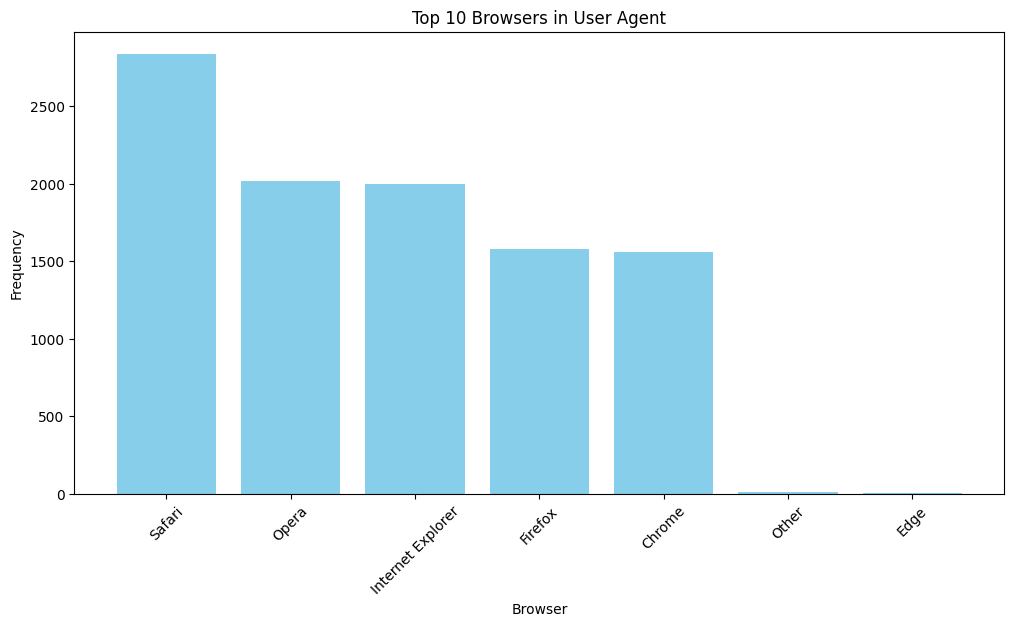

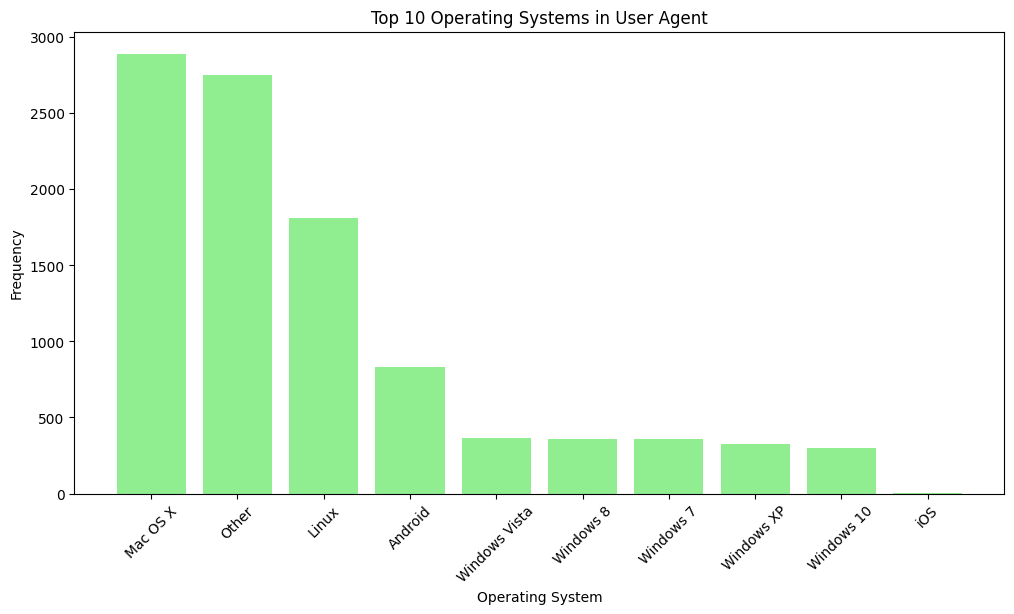

In [ ]:
# Function to extract browser and OS from user agent string
def parse_user_agent(ua_string):
    browser = "Other"
    os = "Other"

    # Simple regex patterns to extract browser and OS
    browser_patterns = [
        (r'Opera|OPR', 'Opera'),
        (r'Edge', 'Edge'),
        (r'Chrome', 'Chrome'),
        (r'Safari', 'Safari'),
        (r'Firefox', 'Firefox'),
        (r'MSIE|Trident', 'Internet Explorer')
    ]

    os_patterns = [
        (r'Windows NT 10.0', 'Windows 10'),
        (r'Windows NT 6.3', 'Windows 8.1'),
        (r'Windows NT 6.2', 'Windows 8'),
        (r'Windows NT 6.1', 'Windows 7'),
        (r'Windows NT 6.0', 'Windows Vista'),
        (r'Windows NT 5.1', 'Windows XP'),
        (r'Mac OS X', 'Mac OS X'),
        (r'Android', 'Android'),
        (r'iPhone OS', 'iOS'),
        (r'Linux', 'Linux')
    ]

    for pattern, name in browser_patterns:
        if re.search(pattern, ua_string, re.IGNORECASE):
            browser = name
            break

    for pattern, name in os_patterns:
        if re.search(pattern, ua_string, re.IGNORECASE):
            os = name
            break

    return browser, os

# Apply the function to the user_agent column and collect results without modifying the dataframe
parsed_user_agents = df['user_agent'].apply(parse_user_agent)
browsers, oses = zip(*parsed_user_agents)

# Plot the most common browsers
browser_counts = Counter(browsers)
most_common_browsers = browser_counts.most_common(10)

browsers, counts = zip(*most_common_browsers)
plt.figure(figsize=(12, 6))
plt.bar(browsers, counts, color='skyblue')
plt.title('Top 10 Browsers in User Agent')
plt.xlabel('Browser')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot the most common operating systems
os_counts = Counter(oses)
most_common_oses = os_counts.most_common(10)

oses, counts = zip(*most_common_oses)
plt.figure(figsize=(12, 6))
plt.bar(oses, counts, color='lightgreen')
plt.title('Top 10 Operating Systems in User Agent')
plt.xlabel('Operating System')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

For this column the problem is linked to unknown or 'weird' browsers names. Let's look at it more in deep :

In [ ]:
# Function to detect unusual user agents
def is_unusual_user_agent(ua_string):
    browser, os = parse_user_agent(ua_string)
    return browser == "Other"

# Apply the function to filter the DataFrame
unusual_user_agents = df[df['user_agent'].apply(is_unusual_user_agent)]

unusual_user_agents['user_agent'].head()

36      OpePWNEDra/9.65.(X11; Linux i686; sid-ET) Pres...
768     Mozilla/5.0 (Windows CE; st-ZA; rv:1.9.2.20) G...
833     OPWNEDpera/8.38.(X11; Linux i686; sq-AL) Prest...
2239    OperPWNEDa/9.83.(Windows NT 5.2; da-DK) Presto...
4935    Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_3...
Name: user_agent, dtype: object

These user agents often contain anomalies such as the term "PWNED," indicating they may be spoofed or manipulated. \
Our first approach was to use the Levenshtein distance to have a more general way of solving it.

In [ ]:
# List of known browsers to match against
known_browsers = ['Opera', 'Firefox', 'Chrome', 'Safari', 'Internet Explorer', 'Edge']

# Function to correct user agent strings using Levenshtein distance
def correct_user_agent_levenshtein(ua_string):
    corrected_string = ua_string
    found_match = False
    for known in known_browsers:
        match = re.search(r'\b' + re.escape(known) + r'\b', ua_string, re.IGNORECASE)
        if match:
            return ua_string  # Return original if known browser is found
        for part in ua_string.split():
            if Levenshtein.distance(part, known) <= 3:  # Adjust distance threshold as needed
                corrected_string = re.sub(re.escape(part), known, ua_string, flags=re.IGNORECASE)
                found_match = True
    return corrected_string if found_match else ua_string

# Apply the function to correct user agents directly in the DataFrame
df['user_agent'] = df['user_agent'].apply(correct_user_agent_levenshtein)

In [ ]:
# Verify the changes by checking for any remaining unusual user agents
unusual_user_agents = df[df['user_agent'].apply(is_unusual_user_agent)]
unusual_user_agents['user_agent'].value_counts().sum()

13

Therefore, we still get 13 remaining anomalies. So here is our second approach, which is more straightforward and adapted to our current case (where PWNED was append randomly).

In [ ]:
# Function to correct user agent strings by removing "PWNED"
def correct_user_agent_remove_pwned(ua_string):
    return ua_string.replace('PWNED', '')

df['user_agent'] = df['user_agent'].apply(correct_user_agent_remove_pwned)

In [ ]:
# Verify the changes by checking for any remaining unusual user agents
unusual_user_agents = df[df['user_agent'].apply(is_unusual_user_agent)]
unusual_user_agents['user_agent'].head()

Series([], Name: user_agent, dtype: object)

### xml_authent_token (hardest)

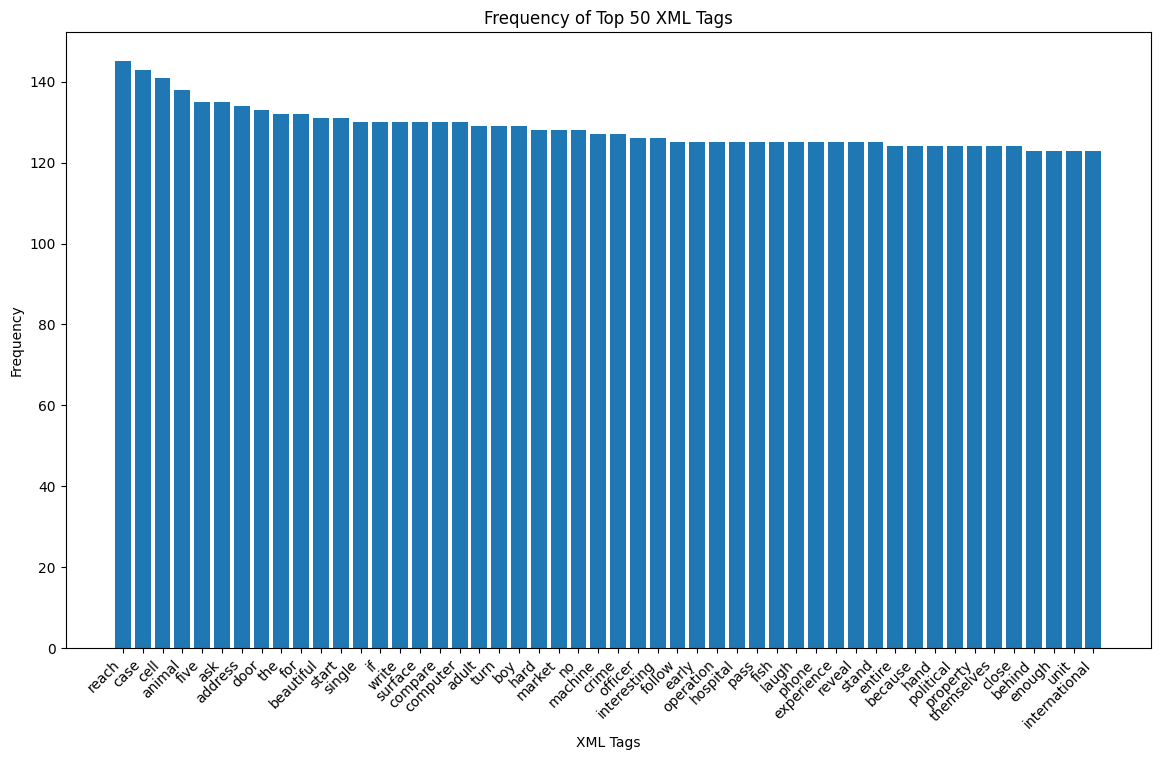

In [ ]:
import xml.etree.ElementTree as ET
# Get the most common tags
def extract_tags(xml_string):
    try:
        root = ET.fromstring(xml_string)
        return [elem.tag for elem in root.iter()]
    except ET.ParseError:
        return []

# Apply the function to the 'xml_authent_token' column and flatten the list of tags
all_tags = df['xml_authent_token'].apply(extract_tags).sum()

# Count the occurrences of each tag
tag_counts = Counter(all_tags)

# Get the 50 most common tags
most_common_tags = tag_counts.most_common(50)

# Separate the tags and their counts for plotting
tags, counts = zip(*most_common_tags)

# Plot the tags and their counts
plt.figure(figsize=(14, 8))
plt.bar(tags, counts)
plt.xlabel('XML Tags')
plt.ylabel('Frequency')
plt.title('Frequency of Top 50 XML Tags')
plt.xticks(rotation=45, ha='right')
plt.show()

### Android_platform (no error)

For this column, as it was announced during class that there is no error we just did a simple visualisation

In [ ]:
android_platform_counts = df['android_platform'].value_counts()
android_platform_counts

android_platform
Android 5.0      188
Android 4.4      185
Android 4.4.1    182
Android 2.3      182
Android 2.3.5    179
                ... 
Android 4.0.4    145
Android 5.0.2    143
Android 4.3      143
Android 4.4.2    143
Android 10       143
Name: count, Length: 62, dtype: int64

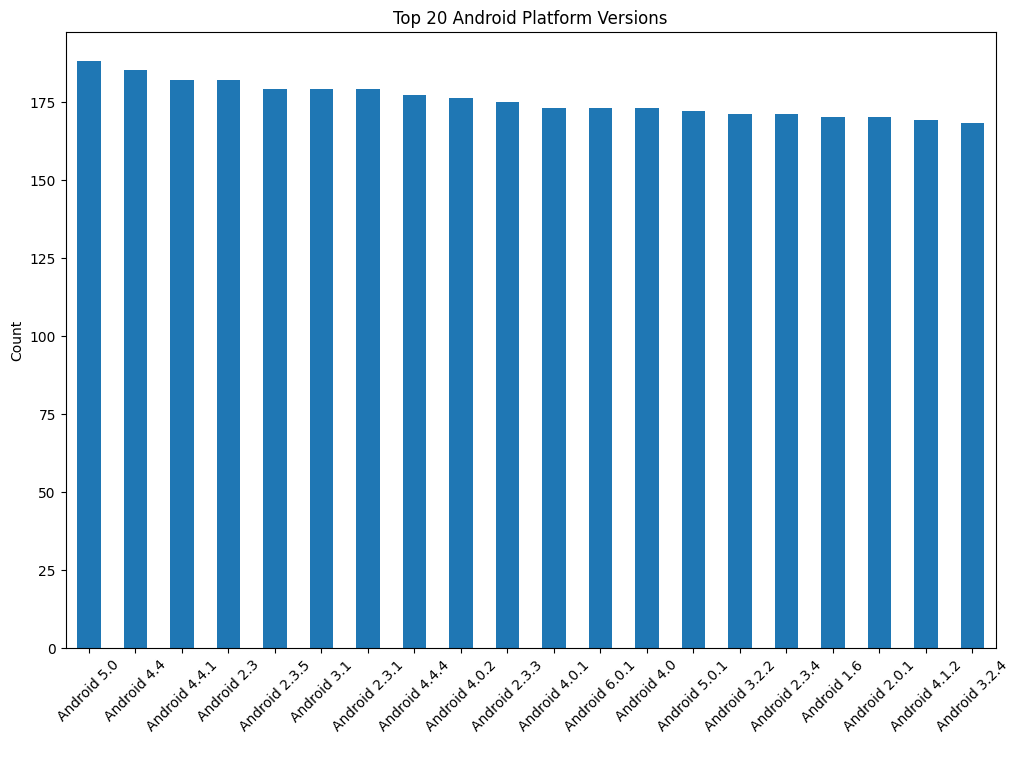

In [ ]:
# Select the top 20 most common Android versions
top_android_platforms = android_platform_counts.head(20)

# Create a bar chart
plt.figure(figsize=(12, 8))
top_android_platforms.plot(kind='bar')
plt.title('Top 20 Android Platform Versions')
plt.xlabel(' ')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Metrics

Finally, lets set up some metrics to have a final overview of the columns after the cleansing.

In [ ]:
# Total number of records
total_records = len(df)

# Total number of columns
total_columns = len(df.columns)

# Missing values per column
missing_values_per_column = df.isna().sum()

# Percentage of missing values per column
percentage_missing_values_per_column = (df.isna().sum() / len(df)) * 100

# Data types of columns
data_types = df.dtypes

# Unique values per column
unique_values_per_column = df.nunique()

# Summary statistics for numeric columns
summary_statistics_numeric = df.describe()

# Compile all metrics into a dictionary for better readability
general_metrics = {
    "Total Records": total_records,
    "Total Columns": total_columns,
    "Missing Values Per Column": missing_values_per_column,
    "Percentage Missing Values Per Column": percentage_missing_values_per_column,
    "Data Types": data_types,
    "Unique Values Per Column": unique_values_per_column,
    "Summary Statistics for Numeric Columns": summary_statistics_numeric
}

general_metrics

{'Total Records': 10000,
 'Total Columns': 46,
 'Missing Values Per Column': prefix                        0
 lastname                      0
 firstname                     0
 firstname_mother              0
 firstname_father              0
 description                   0
 inquiry                       0
 Date_of_Birth                 0
 account_creation_date         0
 last_transaction_date         0
 account_resiliation_date      0
 first_contact_date            0
 last_contact_date             0
 latlon_home                   0
 latlon_work                   0
 x35_bank_branch               0
 email_work                    1
 email_personnal             204
 email_sso                   228
 email_vpn                   180
 xml_authent_token             0
 profile_json                  0
 cia_info_json                 0
 salary                        0
 first_salary                  0
 taxable_income                0
 transaction_amount            0
 credit_card_score             0
